In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv") 
df = pd.read_csv("Sample_submission.csv")
'''
train/test = 42%
'''

'\ntrain/test = 42%\n'

In [3]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train['Class'].value_counts()

0    1620
1     143
Name: Class, dtype: int64

In [5]:
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# split features and label
X = df_train.drop(['Class'], axis=1)
y = df_train['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.33, random_state=42)

In [7]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
560,40,40,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1234,25,133,5.3200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593,43,230,5.3488,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1054,135,200,1.4814,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,120,120,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,27,57,2.1111,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,58,285,4.9137,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,11,96,8.7272,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,1,1,2.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
from sklearn import preprocessing
# normalized_X = preprocessing.normalize(X)
# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  # Sclaed data
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)  

In [9]:
X_train_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.061033,0.063830,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.037559,0.216039,0.088644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.065728,0.374795,0.089124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.209703,0.325696,0.024666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.186228,0.194763,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.040689,0.091653,0.035161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,0.089202,0.464812,0.081872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,0.015649,0.155483,0.145432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1179,0.000000,0.000000,0.033309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h3>Feature extraction with Autoencoder</h3>

In [10]:

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
n_inputs = 1559
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(100)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 100
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(100)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# # define autoencoder model
# model = Model(inputs=visible, outputs=output)
# # compile autoencoder model
# model.compile(optimizer='adam', loss='mse')

# # fit the autoencoder model to reconstruct input
# history = model.fit(X_train_scaled, X_train_scaled, epochs=200, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))
# # plot loss
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()
# # define an encoder model (without the decoder)
# encoder = Model(inputs=visible, outputs=bottleneck)

# # save the encoder to file
# encoder.save('encoder.h5')

2021-09-25 11:23:58.956672: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-25 11:23:59.335296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22695 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


2021-09-25 11:24:07.126583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
74/74 - 2s - loss: 0.0709 - val_loss: 0.0089
Epoch 2/20
74/74 - 1s - loss: 0.0105 - val_loss: 0.0076
Epoch 3/20
74/74 - 1s - loss: 0.0105 - val_loss: 0.0077
Epoch 4/20
74/74 - 1s - loss: 0.0106 - val_loss: 0.0072
Epoch 5/20
74/74 - 1s - loss: 0.0094 - val_loss: 0.0075
Epoch 6/20
74/74 - 1s - loss: 0.0103 - val_loss: 0.0078
Epoch 7/20
74/74 - 1s - loss: 0.0090 - val_loss: 0.0092
Epoch 8/20
74/74 - 1s - loss: 0.0093 - val_loss: 0.0094
Epoch 9/20
74/74 - 1s - loss: 0.0093 - val_loss: 0.0086
Epoch 10/20
74/74 - 1s - loss: 0.0090 - val_loss: 0.0080
Epoch 11/20
74/74 - 1s - loss: 0.0089 - val_loss: 0.0095
Epoch 12/20
74/74 - 1s - loss: 0.0079 - val_loss: 0.0078
Epoch 13/20
74/74 - 1s - loss: 0.0082 - val_loss: 0.0071
Epoch 14/20
74/74 - 1s - loss: 0.0076 - val_loss: 0.0076
Epoch 15/20
74/74 - 1s - loss: 0.0075 - val_loss: 0.0065
Epoch 16/20
74/74 - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 17/20
74/74 - 1s - loss: 0.0068 - val_loss: 0.0062
Epoch 18/20
74/74 - 1s - loss: 0.0066 - 

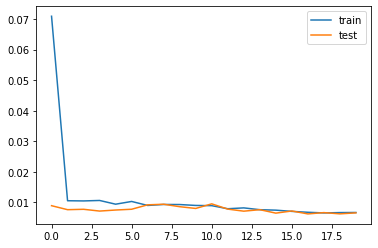

In [11]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

# save the encoder to file
encoder.save('encoder.h5')

In [12]:
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')

In [13]:
extract = Model(visible, e)

extracted_train = extract.predict(x=X_train_scaled)

In [14]:
extracted_train = pd.DataFrame(data = extracted_train)
extracted_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.135822,-0.099474,-0.151052,0.081044,-0.107018,0.088198,-0.184281,-0.097827,0.171724,-0.148952,...,-0.154190,-0.006520,0.485554,-0.134629,-0.125764,0.070703,0.318688,0.472840,-0.163956,-0.114450
1,-0.133095,-0.127916,-0.110952,-0.218555,-0.110847,0.004583,-0.159169,-0.194388,-0.014250,-0.107087,...,-0.113419,-0.045329,1.250561,-0.068709,-0.127412,0.195823,-0.019030,0.147018,-0.083382,0.303026
2,1.990525,1.992008,-0.196038,1.194624,-0.298052,-0.513865,1.140257,-0.426145,-0.293719,-0.138741,...,-0.191522,0.428095,-0.600355,2.318042,0.595453,-0.154906,-1.254244,-0.608015,-0.303140,0.162843
3,-0.408853,3.811091,-0.213935,0.379078,-0.514131,-0.228193,-0.094489,-0.402149,-0.631272,-0.255542,...,-0.239169,2.444288,-0.243538,3.693612,5.254498,-0.230816,-0.086672,0.468762,-0.402984,2.455042
4,-0.278191,-0.141996,-0.086902,-0.217731,0.246597,0.518513,-0.017889,-0.038008,-0.093338,-0.020168,...,-0.045046,-0.011077,0.504577,-0.161626,-0.153654,0.249010,0.116697,-0.029472,-0.081151,-0.076473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,-0.211188,-0.251977,0.240774,0.705187,0.179109,0.740740,-0.170073,-0.088695,0.005036,-0.123206,...,-0.148948,-0.183216,0.766652,-0.184263,-0.164642,-0.026946,-0.002672,0.732938,-0.104317,-0.176474
1177,-0.166636,0.147742,-0.169155,-0.002566,-0.075584,-0.077416,-0.191888,-0.126031,-0.079926,-0.152506,...,-0.200936,0.174063,0.225697,-0.099103,-0.084206,-0.045923,-0.021489,0.123029,-0.149920,0.101900
1178,-0.114456,-1.328177,3.588672,-0.948619,1.787716,-0.178372,4.737108,4.334635,1.501567,4.292863,...,4.316169,-0.586146,-0.623655,-0.289565,0.103482,0.314290,-0.350042,-0.718821,2.917816,-0.553135
1179,0.747828,1.138955,-0.264453,0.909261,-0.004842,0.949474,-0.160952,-0.456815,-0.231554,-0.270843,...,-0.218299,0.753864,0.485312,1.280028,1.148691,-0.032629,-0.185771,0.193704,-0.060606,0.344613


In [15]:
extracted_test = extract.predict(x=X_test_scaled)

In [16]:
extracted_test = pd.DataFrame(data = extracted_test)
extracted_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.779095,-0.197329,0.214197,-0.217062,-0.349531,-0.124366,-0.109003,-0.087660,-0.057168,-0.162871,...,-0.220741,-0.281953,-0.210716,0.997288,-0.186602,1.087108,-0.087854,-0.184916,-0.042276,-0.254553
1,0.129264,-0.181738,-0.146209,0.198598,0.278481,-0.047618,-0.285753,-0.112681,-0.039136,-0.172570,...,-0.152604,-0.099089,1.289449,-0.179230,-0.152472,0.288350,-0.010196,0.383149,0.021880,-0.072960
2,-0.017910,-0.121694,-0.214003,0.243309,0.121625,0.387660,-0.293528,-0.125363,-0.165510,-0.202572,...,-0.225055,-0.022874,0.940845,-0.120045,-0.190429,0.026633,-0.000913,-0.050402,-0.096853,0.032250
3,0.629641,-0.184296,2.015092,-0.439096,1.173864,0.042481,2.131536,1.809447,1.165724,2.086993,...,1.874147,-0.273530,-0.452113,-0.175678,-0.076527,0.188923,0.721109,-0.418577,1.389942,-0.361469
4,1.108820,-0.104098,-0.151503,0.561170,-0.094240,0.430063,-0.118756,-0.017023,-0.104014,-0.155895,...,-0.177241,-0.140065,1.452558,-0.222773,-0.307140,0.399467,0.095683,-0.162118,-0.254210,-0.016670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,1.800237,-0.124518,3.106387,-0.382703,1.675052,-0.248888,3.115894,2.547992,1.345242,3.097489,...,3.013311,-0.453873,-0.386649,-0.110034,-0.098760,0.038580,0.715625,-0.808110,1.916920,-0.486349
578,0.676509,-0.317364,3.383655,-0.346775,1.966852,-0.433362,3.740647,2.864192,1.264590,3.436185,...,3.926597,-0.381969,-0.501626,-0.410946,-0.160160,-0.037164,0.903964,-0.802270,1.813901,-0.713747
579,-0.034092,-0.108397,-0.135817,-0.045798,-0.041150,0.290363,-0.155169,-0.070410,0.062475,-0.120370,...,-0.145529,-0.073950,0.892599,-0.183294,-0.208042,0.228507,0.326077,0.250068,-0.090178,-0.050965
580,-0.168265,-0.245966,-0.010667,0.219388,0.153112,0.740032,-0.173983,-0.077662,0.090222,-0.127144,...,-0.138031,-0.215057,1.036174,-0.181971,-0.209836,0.365742,-0.046932,0.812183,-0.105815,-0.120329


In [17]:
extracted_train_scaled = min_max_scaler.fit_transform(extracted_train)
extracted_test_scaled = min_max_scaler.fit_transform(extracted_test)
extracted_test_scaled = pd.DataFrame(extracted_test_scaled)  # Sclaed data
extracted_train_scaled = pd.DataFrame(extracted_train_scaled) 


In [18]:
extracted_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.206447,0.202005,0.118563,0.225244,0.207908,0.204416,0.059228,0.078667,0.274165,0.050991,...,0.072540,0.150621,0.412903,0.063757,0.048112,0.211355,0.270619,0.280752,0.174999,0.146112
1,0.207074,0.198043,0.125381,0.174500,0.207140,0.185903,0.062960,0.062855,0.222536,0.057965,...,0.079181,0.144207,0.619336,0.073383,0.047899,0.234844,0.212515,0.215778,0.190967,0.236955
2,0.695473,0.493345,0.110914,0.413855,0.169601,0.071111,0.256060,0.024907,0.144952,0.052692,...,0.066458,0.222457,0.119875,0.421875,0.141513,0.169000,0.000000,0.065214,0.147416,0.206451
3,0.143655,0.746740,0.107872,0.275723,0.126272,0.134363,0.072571,0.028836,0.051243,0.033234,...,0.058696,0.555708,0.216160,0.622724,0.744879,0.154750,0.200878,0.279939,0.127629,0.705234
4,0.173705,0.196082,0.129470,0.174639,0.278815,0.299694,0.083954,0.088462,0.200580,0.072445,...,0.090320,0.149868,0.418036,0.059816,0.044500,0.244829,0.235867,0.180584,0.191409,0.154376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.189114,0.180762,0.185182,0.330957,0.265282,0.348898,0.061339,0.080162,0.227890,0.055280,...,0.073393,0.121416,0.488756,0.056510,0.043078,0.193023,0.215330,0.332619,0.186818,0.132615
1177,0.199360,0.236442,0.115485,0.211083,0.214211,0.167747,0.058097,0.074048,0.204304,0.050399,...,0.064924,0.180469,0.342781,0.068945,0.053494,0.189460,0.212092,0.210995,0.177781,0.193190
1178,0.211361,0.030849,0.754397,0.050847,0.587844,0.145394,0.790568,0.804452,0.643347,0.790954,...,0.800788,0.054817,0.113587,0.041135,0.077801,0.257084,0.155566,0.043118,0.785736,0.050654
1179,0.409672,0.374516,0.099282,0.365522,0.228396,0.395114,0.062695,0.019885,0.162210,0.030685,...,0.062096,0.276303,0.412837,0.270313,0.213160,0.191956,0.183828,0.225088,0.195481,0.246004


<h3>Build VAE network for training</h3>

In [19]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf


m = 64
n_z = 2
n_epoch = 10


# Q(z|X) -- encoder
inputs = Input(shape=(100,))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(1024, activation='relu')(inputs)
decoder_hidden = Dense(2048, activation='relu')
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)


def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

    mu, log_sigma = args
    batch_size = tf.shape(mu)[0]
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
decoder_hidden = Dense(2048, activation='relu')
decoder_hidden = Dense(1024, activation='relu')
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(100, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

def vae_loss(recon_x, x):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [20]:
loss = vae_loss(inputs, outputs)

In [21]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(extracted_train_scaled, extracted_train_scaled, batch_size=m, epochs=100, validation_data=(extracted_test_scaled, extracted_test_scaled))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
  64/1181 [>.............................] - ETA: 2s - loss: 69.4675

2021-09-25 11:45:44.490377: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22695 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


1181/1181 [==============================] - 0s 230us/sample - loss: 63.4883 - val_loss: 57.0491
Epoch 2/100
1181/1181 [==============================] - 0s 77us/sample - loss: 53.9827 - val_loss: 52.0560
Epoch 3/100
  64/1181 [>.............................] - ETA: 0s - loss: 51.8214

/home/zh314/jupyter_notebook/jupyterenv/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1181/1181 [==============================] - 0s 86us/sample - loss: 51.0561 - val_loss: 50.8119
Epoch 4/100
1181/1181 [==============================] - 0s 88us/sample - loss: 50.1836 - val_loss: 50.2791
Epoch 5/100
1181/1181 [==============================] - 0s 87us/sample - loss: 49.9750 - val_loss: 50.1500
Epoch 6/100
1181/1181 [==============================] - 0s 90us/sample - loss: 49.8453 - val_loss: 49.9917
Epoch 7/100
1181/1181 [==============================] - 0s 90us/sample - loss: 49.4911 - val_loss: 49.6409
Epoch 8/100
1181/1181 [==============================] - 0s 90us/sample - loss: 49.2127 - val_loss: 49.4212
Epoch 9/100
1181/1181 [==============================] - 0s 87us/sample - loss: 48.9120 - val_loss: 49.0971
Epoch 10/100
1181/1181 [==============================] - 0s 88us/sample - loss: 48.5217 - val_loss: 48.7390
Epoch 11/100
1181/1181 [==============================] - 0s 89us/sample - loss: 48.2161 - val_loss: 48.4745
Epoch 12/100
1181/1181 [==============

1181/1181 [==============================] - 0s 88us/sample - loss: 46.8445 - val_loss: 47.2622
Epoch 79/100
1181/1181 [==============================] - 0s 89us/sample - loss: 46.8403 - val_loss: 47.2753
Epoch 80/100
1181/1181 [==============================] - 0s 90us/sample - loss: 46.8648 - val_loss: 47.3694
Epoch 81/100
1181/1181 [==============================] - 0s 89us/sample - loss: 46.8487 - val_loss: 47.2687
Epoch 82/100
1181/1181 [==============================] - 0s 83us/sample - loss: 46.8188 - val_loss: 47.2944
Epoch 83/100
1181/1181 [==============================] - 0s 73us/sample - loss: 46.8052 - val_loss: 47.2515
Epoch 84/100
1181/1181 [==============================] - 0s 76us/sample - loss: 46.8387 - val_loss: 47.2667
Epoch 85/100
1181/1181 [==============================] - 0s 88us/sample - loss: 46.7964 - val_loss: 47.3107
Epoch 86/100
1181/1181 [==============================] - 0s 88us/sample - loss: 46.8032 - val_loss: 47.3769
Epoch 87/100
1181/1181 [========

In [22]:
def mse_error(x_explain):
        """
        Sort all records in x_explain by their MSE calculated according to their prediction by the trained VAE
        and return the top num_anomalies_to_explain (its value given by the user at class initialization) records.
        Args:
            x_explain (data frame): Set of records we want to explain the most anomalous ones from it.
        Returns:
            list: List of index of the top num_anomalies_to_explain records with highest MSE that will be explained.
        """
        
        predictions = vae.predict(x_explain)
        square_errors = np.power(x_explain - predictions, 2)
        mse_series = pd.Series(np.mean(square_errors, axis=1))

        most_anomal_trx = mse_series.sort_values(ascending=False)
        columns = ["id", "mse_all_columns"]
        columns.extend(["squared_error_" + x for x in list(str(x_explain.columns))])
        items = []
        for x in most_anomal_trx.iteritems():
            item = [x[0], x[1]]
            item.extend(square_errors.loc[x[0]])
            items.append(item)
        
        return items

In [23]:
error = mse_error(extracted_test_scaled)

In [24]:
error_arr= np.array(error)

In [25]:
error_df = pd.DataFrame(error_arr)

In [26]:
test_error = error_df.iloc[:,0]
test_error

0      416.0
1      549.0
2      151.0
3       22.0
4      530.0
       ...  
577    116.0
578    518.0
579    570.0
580    281.0
581    148.0
Name: 0, Length: 582, dtype: float64

In [27]:
test_error = test_error.astype(int)

test_error_head = test_error.head(143)

test_error_head = test_error_head.to_numpy()

In [28]:
test_error_head

array([416, 549, 151,  22, 530, 581, 403, 321, 273, 302,  57, 297, 447,
       131, 122,  64, 548, 510, 293, 372, 157, 154, 165, 528,  16, 365,
       155, 495, 524,  96, 317, 171,  75, 367, 261, 478, 426, 132, 425,
       115,  24, 319,   5, 385, 202, 107, 188, 497, 185, 276, 315, 308,
       211, 112, 232, 444,  45, 341, 540, 383, 152, 402, 235, 428,  53,
       303, 451, 277, 464, 500, 423, 556, 387, 502, 496,  46, 369,  95,
       346, 410,  17, 304, 398, 571, 316, 475, 399, 255, 124, 306, 445,
       205,  86,   8, 181,  33, 270,  25, 175, 470,  74, 507, 512, 388,
        18, 203, 184, 371,  77, 413, 437, 429, 348, 338,  97, 170, 298,
       285, 109, 331, 435, 377, 223, 217, 390, 551, 120,  14, 103, 150,
         6,  71, 484, 397, 494, 541, 196, 278, 469, 526,  69, 110,  15])

In [29]:
anomaly = extracted_test_scaled.iloc[test_error_head]

In [30]:
anomaly

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
416,0.000000,0.506711,0.114915,1.000000,0.875354,0.026051,0.051614,0.065755,0.127134,0.032332,...,0.048790,0.667928,0.320286,0.404474,0.217074,0.311201,0.501319,0.101927,0.158479,1.000000
549,0.974110,0.140284,0.088120,0.128592,0.035188,0.167548,0.019881,0.052401,0.102794,0.019113,...,0.058619,0.059738,0.155392,0.000000,0.020076,0.000000,0.141239,1.000000,0.921154,0.566667
151,0.391354,0.743626,0.121407,0.095831,0.952603,0.699617,0.013382,0.098200,0.202954,0.056901,...,0.094329,0.662531,0.320150,0.770423,0.014749,0.074551,0.013228,0.078519,0.047892,0.785155
22,0.143346,0.362034,0.105922,0.341119,0.168043,0.199412,0.068231,0.073644,0.380972,0.048751,...,0.055656,0.115120,0.447750,0.142143,0.170040,0.408817,0.107166,0.130376,0.284498,0.671380
530,0.877714,0.156427,0.131698,0.103096,0.054288,0.156931,0.013454,0.053195,0.105116,0.014401,...,0.052302,0.091871,0.141679,0.032337,0.038294,0.020575,0.150944,0.882264,0.800645,0.453589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.256279,0.249113,0.129974,0.488691,0.224975,0.104884,0.032040,0.071695,0.473843,0.043691,...,0.041043,0.302212,0.236433,0.098968,0.056937,0.653049,0.135304,0.639417,0.189708,0.082582
526,0.660110,0.165957,0.801030,0.073733,0.588252,0.540587,0.640450,0.792872,0.948795,0.668479,...,0.656414,0.113674,0.213308,0.060379,0.046682,0.160514,0.639541,0.106680,0.797931,0.092162
69,0.238904,0.556479,0.110790,0.363789,0.110871,0.134065,0.076619,0.044017,0.061640,0.043314,...,0.044503,0.545503,0.396692,0.602280,0.503156,0.187336,0.158889,0.552960,0.124241,0.482916
110,0.269383,0.201885,0.123782,0.200994,0.110992,0.542499,0.057486,0.057822,0.210117,0.044414,...,0.050620,0.195361,1.000000,0.188925,0.049029,0.184230,0.197059,0.175056,0.247749,0.075378


In [31]:
de_test = extracted_test_scaled.copy()
de_test['attack'] = 0
de_test.loc[test_error_head,'attack']= 1

In [32]:
de_test['attack'].value_counts()

0    439
1    143
Name: attack, dtype: int64

In [33]:
y_de = de_test['attack']
y_de

0      0
1      0
2      0
3      0
4      0
      ..
577    0
578    0
579    0
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [34]:
from sklearn.metrics import f1_score
f1_score(y_test, y_de, average='weighted')

0.8089043789373037

<h3>use SHAP to interpret</h3>

In [35]:
 def f(extracted_test_scaled):
        return vae.predict(extracted_test_scaled)

In [36]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(f, shap.sample(extracted_test_scaled, 10)) # choose 500 'typical' data from train
shap_values = explainer.shap_values(anomaly, nsamples='auto')


  0%|          | 0/143 [00:00<?, ?it/s]

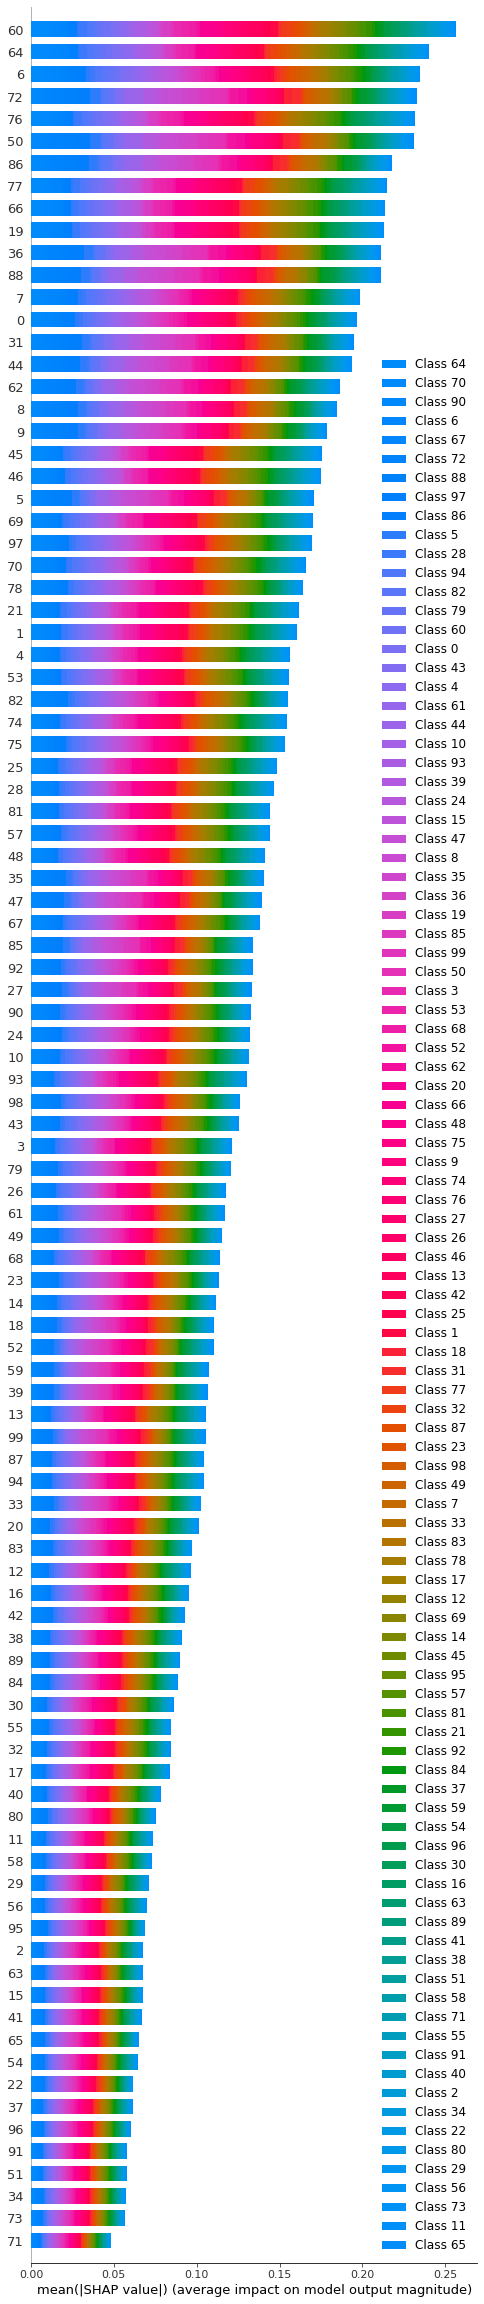

In [37]:
shap.summary_plot(shap_values, features = anomaly, plot_type='bar', max_display=anomaly.shape[1])

In [38]:
anomaly.columns[np.argsort(np.abs(shap_values).mean(0))]
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(anomaly.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,col_name,feature_importance_vals
60,60,0.366898
64,64,0.343317
6,6,0.336168
72,72,0.332766
76,76,0.331007
...,...,...
91,91,0.082614
51,51,0.082547
34,34,0.081732
73,73,0.080941


<h3>Extract high importance features</h3>

In [39]:
extracted_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.156253,0.074418,0.232696,0.083569,0.151069,0.097203,0.540348,0.298761,0.093905,0.044042,...,0.200484,0.369874,0.257760,0.092014,0.184236,0.431514,0.172077,0.406552,0.403505,0.126906
1,0.219176,0.181823,0.322455,0.158958,0.196359,0.084504,0.485110,0.231542,0.097337,0.050493,...,0.280551,0.220307,0.377439,0.106951,0.174346,0.308600,0.196778,0.396309,0.361820,0.132165
2,0.140130,0.026153,0.025495,0.127047,0.607582,1.000000,0.076116,0.017179,0.686381,0.782088,...,0.001741,0.000000,0.858843,0.440724,0.129489,0.039998,0.999685,0.117713,0.055748,0.828709
3,0.244861,0.057933,0.163067,0.104135,0.157543,0.467131,0.210166,0.087897,0.476154,0.333364,...,0.576442,0.177904,0.136515,0.125924,0.491493,0.247993,0.107426,0.211252,0.222121,0.404087
4,0.154724,0.069792,0.209863,0.091927,0.265511,0.234760,0.305999,0.177945,0.214172,0.121163,...,0.279539,0.243966,0.249993,0.098662,0.213813,0.416193,0.115450,0.287021,0.272514,0.270352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.182192,0.062223,0.307210,0.075243,0.161863,0.105936,0.344660,0.308548,0.079652,0.062661,...,0.257798,0.282589,0.229146,0.092654,0.159229,0.339114,0.167728,0.245287,0.338276,0.136739
1177,0.156585,0.077487,0.272730,0.084142,0.149766,0.066934,0.526460,0.341840,0.082607,0.031118,...,0.176689,0.306062,0.221947,0.101243,0.183070,0.402219,0.168484,0.473597,0.435732,0.100128
1178,0.244944,0.491192,0.437466,0.488908,0.285102,0.099967,0.139312,0.073292,0.071521,0.043888,...,0.437518,0.250897,0.426118,0.503077,0.297678,0.127875,0.480309,0.118798,0.234127,0.087433
1179,0.191460,0.051542,0.207569,0.091071,0.164646,0.212437,0.379199,0.166691,0.163400,0.111226,...,0.108486,0.225445,0.400875,0.101064,0.189383,0.240894,0.182587,0.381572,0.277626,0.318656


In [40]:
value_list = []

In [41]:
for i in range(2,100):
    it = feature_importance.iloc[:i,0]
    it = it.to_list()
    explained_train = extracted_train_scaled[it]
    explained_test = extracted_test_scaled[it]
    
    # Q(z|X) -- encoder
    inputs = Input(shape=(len(it),))
    h_q = Dense(512, activation='relu')(inputs)
    h_q = Dense(1024, activation='relu')(inputs)
    # decoder_hidden = Dense(2048, activation='relu')
    mu = Dense(n_z, activation='linear')(h_q)
    log_sigma = Dense(n_z, activation='linear')(h_q)


    def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

        mu, log_sigma = args
        batch_size = tf.shape(mu)[0]
        eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
        return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
    z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
    decoder_hidden = Dense(1024, activation='relu')
    decoder_hidden = Dense(512, activation='relu')
    decoder_out = Dense(len(it), activation='sigmoid')

    h_p = decoder_hidden(z)
    outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
    vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
    encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
    d_in = Input(shape=(n_z,))
    d_h = decoder_hidden(d_in)
    d_out = decoder_out(d_h)
    decoder = Model(d_in, d_out)

    def vae_loss(recon_x, x):
   
    # E[log P(X|z)]
        recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
        kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

        return recon + kl

    vae.compile(optimizer='adam', loss=vae_loss)
    vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    
    explained_error = mse_error(explained_test)

    explained_error_arr= np.array(explained_error)
    explained_error_df = pd.DataFrame(explained_error_arr)

    test_explained_error = explained_error_df.iloc[:,0]
    test_explained_error = test_explained_error.astype(int)

    test_explained_error_head = test_explained_error.head(143)

    test_explained_error_head = test_explained_error_head.to_numpy()
    explained_anomaly = explained_test.iloc[test_explained_error_head]
    de_test_explained = extracted_test_scaled.copy()
    de_test_explained['attack'] = 0
    de_test_explained.loc[test_explained_error_head,'attack']= 1
    y_de_explained = de_test_explained['attack']
    f1 = f1_score(y_test, y_de_explained, average='weighted')

    value_list.append(f1)
    print(value_list)
    print(len(it))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1181/1181 [==============================] - 1s 456us/sample - loss: 1.1887 - val_loss: 1.0015
Epoch 2/100
 384/1181 [========>.....................] - ETA: 0s - loss: 1.003 - ETA: 0s - loss: 0.9921

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 220us/sample - loss: 0.9423 - val_loss: 0.8497
Epoch 3/100
1181/1181 [==============================] - 0s 228us/sample - loss: 0.8695 - val_loss: 0.8279
Epoch 4/100
1181/1181 [==============================] - 0s 215us/sample - loss: 0.8562 - val_loss: 0.8173
Epoch 5/100
1181/1181 [==============================] - 0s 219us/sample - loss: 0.8579 - val_loss: 0.8163
Epoch 6/100
1181/1181 [==============================] - 0s 222us/sample - loss: 0.8628 - val_loss: 0.8071
Epoch 7/100
1181/1181 [==============================] - 0s 222us/sample - loss: 0.8547 - val_loss: 0.8144
Epoch 8/100
1181/1181 [==============================] - 0s 223us/sample - loss: 0.8478 - val_loss: 0.8074
Epoch 9/100
1181/1181 [==============================] - 0s 218us/sample - loss: 0.8533 - val_loss: 0.8160
Epoch 10/100
1181/1181 [==============================] - 0s 214us/sample - loss: 0.8459 - val_loss: 0.8084
Epoch 11/100
1181/1181 [========================

1181/1181 [==============================] - 0s 218us/sample - loss: 0.8447 - val_loss: 0.8047
Epoch 79/100
1181/1181 [==============================] - 0s 223us/sample - loss: 0.8443 - val_loss: 0.7982
Epoch 80/100
1181/1181 [==============================] - 0s 214us/sample - loss: 0.8441 - val_loss: 0.8056
Epoch 81/100
1181/1181 [==============================] - 0s 218us/sample - loss: 0.8445 - val_loss: 0.8025
Epoch 82/100
1181/1181 [==============================] - 0s 218us/sample - loss: 0.8445 - val_loss: 0.8022
Epoch 83/100
1181/1181 [==============================] - 0s 217us/sample - loss: 0.8439 - val_loss: 0.7998
Epoch 84/100
1181/1181 [==============================] - 0s 216us/sample - loss: 0.8448 - val_loss: 0.8017
Epoch 85/100
1181/1181 [==============================] - 0s 216us/sample - loss: 0.8450 - val_loss: 0.8018
Epoch 86/100
1181/1181 [==============================] - 0s 216us/sample - loss: 0.8452 - val_loss: 0.8035
Epoch 87/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 220us/sample - loss: 1.6406 - val_loss: 1.5309
Epoch 3/100
1181/1181 [==============================] - 0s 221us/sample - loss: 1.5498 - val_loss: 1.4840
Epoch 4/100
1181/1181 [==============================] - 0s 218us/sample - loss: 1.5187 - val_loss: 1.4797
Epoch 5/100
1181/1181 [==============================] - 0s 218us/sample - loss: 1.5255 - val_loss: 1.4753
Epoch 6/100
1181/1181 [==============================] - 0s 218us/sample - loss: 1.5277 - val_loss: 1.4789
Epoch 7/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.5263 - val_loss: 1.4716
Epoch 8/100
1181/1181 [==============================] - 0s 221us/sample - loss: 1.5152 - val_loss: 1.4740
Epoch 9/100
1181/1181 [==============================] - 0s 217us/sample - loss: 1.5150 - val_loss: 1.4821
Epoch 10/100
1181/1181 [==============================] - 0s 216us/sample - loss: 1.5242 - val_loss: 1.4801
Epoch 11/100
1181/1181 [========================

1181/1181 [==============================] - 0s 215us/sample - loss: 1.5136 - val_loss: 1.4718
Epoch 79/100
1181/1181 [==============================] - 0s 218us/sample - loss: 1.5144 - val_loss: 1.4719
Epoch 80/100
1181/1181 [==============================] - 0s 217us/sample - loss: 1.5149 - val_loss: 1.4709
Epoch 81/100
1181/1181 [==============================] - 0s 220us/sample - loss: 1.5148 - val_loss: 1.4705
Epoch 82/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.5128 - val_loss: 1.4727
Epoch 83/100
1181/1181 [==============================] - 0s 216us/sample - loss: 1.5154 - val_loss: 1.4685
Epoch 84/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.5147 - val_loss: 1.4710
Epoch 85/100
1181/1181 [==============================] - 0s 218us/sample - loss: 1.5141 - val_loss: 1.4731
Epoch 86/100
1181/1181 [==============================] - 0s 216us/sample - loss: 1.5144 - val_loss: 1.4685
Epoch 87/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 214us/sample - loss: 2.1117 - val_loss: 1.9553
Epoch 3/100
1181/1181 [==============================] - 0s 214us/sample - loss: 1.9650 - val_loss: 1.8855
Epoch 4/100
1181/1181 [==============================] - 0s 217us/sample - loss: 1.9390 - val_loss: 1.8590
Epoch 5/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9331 - val_loss: 1.8765
Epoch 6/100
1181/1181 [==============================] - ETA: 0s - loss: 1.936 - 0s 219us/sample - loss: 1.9304 - val_loss: 1.8647
Epoch 7/100
1181/1181 [==============================] - 0s 213us/sample - loss: 1.9224 - val_loss: 1.8638
Epoch 8/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9168 - val_loss: 1.8532
Epoch 9/100
1181/1181 [==============================] - 0s 217us/sample - loss: 1.9160 - val_loss: 1.8593
Epoch 10/100
1181/1181 [==============================] - 0s 222us/sample - loss: 1.9082 - val_loss: 1.8443
Epoch 11/100
1181/1181 [

Epoch 78/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9065 - val_loss: 1.8440
Epoch 79/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9070 - val_loss: 1.8421
Epoch 80/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9064 - val_loss: 1.8414
Epoch 81/100
1181/1181 [==============================] - 0s 224us/sample - loss: 1.9072 - val_loss: 1.8421
Epoch 82/100
1181/1181 [==============================] - 0s 218us/sample - loss: 1.9056 - val_loss: 1.8429
Epoch 83/100
1181/1181 [==============================] - 0s 219us/sample - loss: 1.9073 - val_loss: 1.8438
Epoch 84/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9077 - val_loss: 1.8423
Epoch 85/100
1181/1181 [==============================] - 0s 215us/sample - loss: 1.9064 - val_loss: 1.8419
Epoch 86/100
1181/1181 [==============================] - 0s 214us/sample - loss: 1.9072 - val_loss: 1.8418
Epoch 87/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 219us/sample - loss: 2.5730 - val_loss: 2.3569
Epoch 3/100
1181/1181 [==============================] - 0s 223us/sample - loss: 2.3713 - val_loss: 2.2623
Epoch 4/100
1181/1181 [==============================] - 0s 219us/sample - loss: 2.3350 - val_loss: 2.2441
Epoch 5/100
1181/1181 [==============================] - 0s 223us/sample - loss: 2.3301 - val_loss: 2.2469
Epoch 6/100
1181/1181 [==============================] - 0s 221us/sample - loss: 2.3221 - val_loss: 2.2471
Epoch 7/100
1181/1181 [==============================] - 0s 218us/sample - loss: 2.3123 - val_loss: 2.2313
Epoch 8/100
1181/1181 [==============================] - 0s 236us/sample - loss: 2.3113 - val_loss: 2.2371
Epoch 9/100
1181/1181 [==============================] - 0s 216us/sample - loss: 2.3114 - val_loss: 2.2319
Epoch 10/100
1181/1181 [==============================] - 0s 219us/sample - loss: 2.3034 - val_loss: 2.2195
Epoch 11/100
1181/1181 [========================

1181/1181 [==============================] - 0s 218us/sample - loss: 2.2984 - val_loss: 2.2161
Epoch 79/100
1181/1181 [==============================] - 0s 216us/sample - loss: 2.2968 - val_loss: 2.2163
Epoch 80/100
1181/1181 [==============================] - 0s 230us/sample - loss: 2.2969 - val_loss: 2.2143
Epoch 81/100
1181/1181 [==============================] - 0s 220us/sample - loss: 2.2962 - val_loss: 2.2140
Epoch 82/100
1181/1181 [==============================] - 0s 222us/sample - loss: 2.2985 - val_loss: 2.2179
Epoch 83/100
1181/1181 [==============================] - 0s 230us/sample - loss: 2.2952 - val_loss: 2.2127
Epoch 84/100
1181/1181 [==============================] - 0s 225us/sample - loss: 2.2955 - val_loss: 2.2168
Epoch 85/100
1181/1181 [==============================] - 0s 226us/sample - loss: 2.2986 - val_loss: 2.2175
Epoch 86/100
1181/1181 [==============================] - 0s 223us/sample - loss: 2.2953 - val_loss: 2.2175
Epoch 87/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 221us/sample - loss: 3.0375 - val_loss: 2.7442
Epoch 3/100
1181/1181 [==============================] - 0s 217us/sample - loss: 2.7330 - val_loss: 2.5801
Epoch 4/100
1181/1181 [==============================] - 0s 215us/sample - loss: 2.6720 - val_loss: 2.5573
Epoch 5/100
1181/1181 [==============================] - 0s 217us/sample - loss: 2.6592 - val_loss: 2.5412
Epoch 6/100
1181/1181 [==============================] - 0s 219us/sample - loss: 2.6508 - val_loss: 2.5300
Epoch 7/100
1181/1181 [==============================] - 0s 215us/sample - loss: 2.6354 - val_loss: 2.5373
Epoch 8/100
1181/1181 [==============================] - 0s 217us/sample - loss: 2.6408 - val_loss: 2.5243
Epoch 9/100
1181/1181 [==============================] - 0s 217us/sample - loss: 2.6372 - val_loss: 2.5147
Epoch 10/100
1181/1181 [==============================] - 0s 218us/sample - loss: 2.6307 - val_loss: 2.5199
Epoch 11/100
1181/1181 [========================

1181/1181 [==============================] - 0s 220us/sample - loss: 2.6199 - val_loss: 2.5148
Epoch 79/100
1181/1181 [==============================] - 0s 220us/sample - loss: 2.6194 - val_loss: 2.5125
Epoch 80/100
1181/1181 [==============================] - 0s 215us/sample - loss: 2.6194 - val_loss: 2.5086
Epoch 81/100
1181/1181 [==============================] - 0s 216us/sample - loss: 2.6185 - val_loss: 2.5150
Epoch 82/100
1181/1181 [==============================] - 0s 218us/sample - loss: 2.6206 - val_loss: 2.5100
Epoch 83/100
1181/1181 [==============================] - 0s 221us/sample - loss: 2.6212 - val_loss: 2.5170
Epoch 84/100
1181/1181 [==============================] - 0s 222us/sample - loss: 2.6170 - val_loss: 2.5133
Epoch 85/100
1181/1181 [==============================] - 0s 215us/sample - loss: 2.6182 - val_loss: 2.5063
Epoch 86/100
1181/1181 [==============================] - 0s 220us/sample - loss: 2.6226 - val_loss: 2.5119
Epoch 87/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 219us/sample - loss: 3.5558 - val_loss: 3.1823
Epoch 3/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.1984 - val_loss: 2.9993
Epoch 4/100
1181/1181 [==============================] - 0s 217us/sample - loss: 3.1225 - val_loss: 2.9644
Epoch 5/100
1181/1181 [==============================] - 0s 220us/sample - loss: 3.1077 - val_loss: 2.9641
Epoch 6/100
1181/1181 [==============================] - 0s 219us/sample - loss: 3.1027 - val_loss: 2.9409
Epoch 7/100
1181/1181 [==============================] - 0s 224us/sample - loss: 3.0922 - val_loss: 2.9533
Epoch 8/100
1181/1181 [==============================] - 0s 221us/sample - loss: 3.0948 - val_loss: 2.9319
Epoch 9/100
1181/1181 [==============================] - 0s 217us/sample - loss: 3.0801 - val_loss: 2.9503
Epoch 10/100
1181/1181 [==============================] - 0s 227us/sample - loss: 3.0853 - val_loss: 2.9468
Epoch 11/100
1181/1181 [========================

Epoch 78/100
1181/1181 [==============================] - 0s 219us/sample - loss: 3.0695 - val_loss: 2.9268
Epoch 79/100
1181/1181 [==============================] - 0s 225us/sample - loss: 3.0679 - val_loss: 2.9268
Epoch 80/100
1181/1181 [==============================] - 0s 225us/sample - loss: 3.0699 - val_loss: 2.9268
Epoch 81/100
1181/1181 [==============================] - 0s 220us/sample - loss: 3.0693 - val_loss: 2.9280
Epoch 82/100
1181/1181 [==============================] - 0s 225us/sample - loss: 3.0716 - val_loss: 2.9260
Epoch 83/100
1181/1181 [==============================] - 0s 219us/sample - loss: 3.0682 - val_loss: 2.9237
Epoch 84/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.0688 - val_loss: 2.9261
Epoch 85/100
1181/1181 [==============================] - 0s 221us/sample - loss: 3.0682 - val_loss: 2.9296
Epoch 86/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.0659 - val_loss: 2.9241
Epoch 87/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Epoch 2/100
1181/1181 [==============================] - 0s 217us/sample - loss: 4.0274 - val_loss: 3.6437
Epoch 3/100
1181/1181 [==============================] - 0s 220us/sample - loss: 3.5868 - val_loss: 3.3868
Epoch 4/100
1181/1181 [==============================] - 0s 233us/sample - loss: 3.4945 - val_loss: 3.3454
Epoch 5/100
1181/1181 [==============================] - 0s 219us/sample - loss: 3.4751 - val_loss: 3.3618
Epoch 6/100
1181/1181 [==============================] - 0s 227us/sample - loss: 3.4739 - val_loss: 3.3315
Epoch 7/100
1181/1181 [==============================] - 0s 226us/sample - loss: 3.4677 - val_loss: 3.3269
Epoch 8/100
1181/1181 [==============================] - 0s 222us/sample - loss: 3.4693 - val_loss: 3.3233
Epoch 9/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.4539 - val_loss: 3.3308
Epoch 10/100
1181/1181 [==============================] - 0s 218us/sample - loss: 3.4635 - val_loss: 3.3239
Epoch 11/100
1181/1181 [============

Epoch 78/100
1181/1181 [==============================] - 0s 228us/sample - loss: 3.4386 - val_loss: 3.3099
Epoch 79/100
1181/1181 [==============================] - 0s 229us/sample - loss: 3.4407 - val_loss: 3.3120
Epoch 80/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.4404 - val_loss: 3.3146
Epoch 81/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.4421 - val_loss: 3.3098
Epoch 82/100
1181/1181 [==============================] - 0s 221us/sample - loss: 3.4414 - val_loss: 3.3080
Epoch 83/100
1181/1181 [==============================] - 0s 226us/sample - loss: 3.4399 - val_loss: 3.3187
Epoch 84/100
1181/1181 [==============================] - 0s 222us/sample - loss: 3.4363 - val_loss: 3.3192
Epoch 85/100
1181/1181 [==============================] - 0s 231us/sample - loss: 3.4390 - val_loss: 3.3137
Epoch 86/100
1181/1181 [==============================] - 0s 226us/sample - loss: 3.4347 - val_loss: 3.3095
Epoch 87/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 648us/sample - loss: 5.6163 - val_loss: 4.9189
Epoch 2/100
1181/1181 [==============================] - 0s 217us/sample - loss: 4.5278 - val_loss: 4.0683
Epoch 3/100
1181/1181 [==============================] - 0s 222us/sample - loss: 4.0181 - val_loss: 3.7973
Epoch 4/100
1181/1181 [==============================] - 0s 218us/sample - loss: 3.8831 - val_loss: 3.7656
Epoch 5/100
1181/1181 [==============================] - 0s 215us/sample - loss: 3.8852 - val_loss: 3.7430
Epoch 6/100
1181/1181 [==============================] - 0s 223us/sample - loss: 3.8724 - val_loss: 3.7320
Epoch 7/100
1181/1181 [==============================] - 0s 220us/sample - loss: 3.8620 - val_loss: 3.7310
Epoch 8/100
1181/1181 [==============================] - 0s 217us/sample - loss: 3.8636 - val_loss: 3.7308
Epoch 9/100
1181/1181 [==============================] - 0s 225us/sample - loss: 3.8596 - val_loss: 3.7068
Epoch 10/100
1181/1181 [=========================

Epoch 77/100
1181/1181 [==============================] - 0s 217us/sample - loss: 3.8422 - val_loss: 3.6960
Epoch 78/100
1181/1181 [==============================] - 0s 221us/sample - loss: 3.8438 - val_loss: 3.7086
Epoch 79/100
1181/1181 [==============================] - 0s 216us/sample - loss: 3.8411 - val_loss: 3.6952
Epoch 80/100
1181/1181 [==============================] - 0s 221us/sample - loss: 3.8435 - val_loss: 3.6773
Epoch 81/100
1181/1181 [==============================] - 0s 224us/sample - loss: 3.8313 - val_loss: 3.6853
Epoch 82/100
1181/1181 [==============================] - 0s 220us/sample - loss: 3.8401 - val_loss: 3.6973
Epoch 83/100
1181/1181 [==============================] - 0s 217us/sample - loss: 3.8533 - val_loss: 3.7028
Epoch 84/100
1181/1181 [==============================] - 0s 218us/sample - loss: 3.8382 - val_loss: 3.6914
Epoch 85/100
1181/1181 [==============================] - 0s 217us/sample - loss: 3.8304 - val_loss: 3.7153
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 697us/sample - loss: 6.2847 - val_loss: 5.5045
Epoch 2/100
1181/1181 [==============================] - 0s 218us/sample - loss: 5.0037 - val_loss: 4.5215
Epoch 3/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.4057 - val_loss: 4.1356
Epoch 4/100
1181/1181 [==============================] - 0s 226us/sample - loss: 4.2806 - val_loss: 4.1329
Epoch 5/100
1181/1181 [==============================] - 0s 222us/sample - loss: 4.2354 - val_loss: 4.1531
Epoch 6/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.2581 - val_loss: 4.1196
Epoch 7/100
1181/1181 [==============================] - 0s 221us/sample - loss: 4.2442 - val_loss: 4.1185
Epoch 8/100
1181/1181 [==============================] - 0s 221us/sample - loss: 4.2386 - val_loss: 4.1297
Epoch 9/100
1181/1181 [==============================] - 0s 233us/sample - loss: 4.2493 - val_loss: 4.1149
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 226us/sample - loss: 4.2233 - val_loss: 4.0994
Epoch 78/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.2106 - val_loss: 4.0973
Epoch 79/100
1181/1181 [==============================] - 0s 219us/sample - loss: 4.2205 - val_loss: 4.0839
Epoch 80/100
1181/1181 [==============================] - 0s 225us/sample - loss: 4.2220 - val_loss: 4.1135
Epoch 81/100
1181/1181 [==============================] - 0s 229us/sample - loss: 4.2165 - val_loss: 4.0927
Epoch 82/100
1181/1181 [==============================] - 0s 230us/sample - loss: 4.2126 - val_loss: 4.1014
Epoch 83/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.2011 - val_loss: 4.0981
Epoch 84/100
1181/1181 [==============================] - 0s 227us/sample - loss: 4.2167 - val_loss: 4.0713
Epoch 85/100
1181/1181 [==============================] - 0s 229us/sample - loss: 4.2127 - val_loss: 4.0902
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 723us/sample - loss: 6.7583 - val_loss: 5.8364
Epoch 2/100
1181/1181 [==============================] - 0s 219us/sample - loss: 5.3617 - val_loss: 4.7857
Epoch 3/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.7097 - val_loss: 4.4717
Epoch 4/100
1181/1181 [==============================] - 0s 219us/sample - loss: 4.6053 - val_loss: 4.4289
Epoch 5/100
1181/1181 [==============================] - 0s 219us/sample - loss: 4.5838 - val_loss: 4.4541
Epoch 6/100
1181/1181 [==============================] - 0s 224us/sample - loss: 4.5786 - val_loss: 4.4442
Epoch 7/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.5666 - val_loss: 4.4354
Epoch 8/100
1181/1181 [==============================] - 0s 219us/sample - loss: 4.5525 - val_loss: 4.4303
Epoch 9/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.5443 - val_loss: 4.4094
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 216us/sample - loss: 4.5017 - val_loss: 4.3017
Epoch 78/100
1181/1181 [==============================] - 0s 223us/sample - loss: 4.4852 - val_loss: 4.3326
Epoch 79/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.4697 - val_loss: 4.3380
Epoch 80/100
1181/1181 [==============================] - 0s 227us/sample - loss: 4.4650 - val_loss: 4.3435
Epoch 81/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.4772 - val_loss: 4.3410
Epoch 82/100
1181/1181 [==============================] - 0s 219us/sample - loss: 4.4505 - val_loss: 4.3520
Epoch 83/100
1181/1181 [==============================] - 0s 230us/sample - loss: 4.5001 - val_loss: 4.2985
Epoch 84/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.4796 - val_loss: 4.3323
Epoch 85/100
1181/1181 [==============================] - 0s 217us/sample - loss: 4.4274 - val_loss: 4.3178
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 782us/sample - loss: 7.4882 - val_loss: 6.5054
Epoch 2/100
1181/1181 [==============================] - 0s 229us/sample - loss: 5.9774 - val_loss: 5.2616
Epoch 3/100
1181/1181 [==============================] - 0s 226us/sample - loss: 5.1868 - val_loss: 4.8921
Epoch 4/100
1181/1181 [==============================] - 0s 218us/sample - loss: 5.0187 - val_loss: 4.8141
Epoch 5/100
1181/1181 [==============================] - 0s 224us/sample - loss: 5.0105 - val_loss: 4.8436
Epoch 6/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.9938 - val_loss: 4.8700
Epoch 7/100
1181/1181 [==============================] - 0s 224us/sample - loss: 4.9637 - val_loss: 4.8107
Epoch 8/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.9764 - val_loss: 4.7940
Epoch 9/100
1181/1181 [==============================] - 0s 226us/sample - loss: 4.9385 - val_loss: 4.8145
Epoch 10/100
1181/1181 [=========================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 806us/sample - loss: 8.0659 - val_loss: 7.0955
Epoch 2/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.4465 - val_loss: 5.9480
Epoch 3/100
1181/1181 [==============================] - 0s 217us/sample - loss: 5.7611 - val_loss: 5.4857
Epoch 4/100
1181/1181 [==============================] - 0s 220us/sample - loss: 5.5786 - val_loss: 5.4587
Epoch 5/100
1181/1181 [==============================] - 0s 217us/sample - loss: 5.5493 - val_loss: 5.4381
Epoch 6/100
1181/1181 [==============================] - 0s 218us/sample - loss: 5.5352 - val_loss: 5.4295
Epoch 7/100
1181/1181 [==============================] - 0s 222us/sample - loss: 5.5517 - val_loss: 5.4091
Epoch 8/100
1181/1181 [==============================] - 0s 216us/sample - loss: 5.5319 - val_loss: 5.3968
Epoch 9/100
1181/1181 [==============================] - 0s 217us/sample - loss: 5.5258 - val_loss: 5.3936
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 219us/sample - loss: 5.5083 - val_loss: 5.3928
Epoch 78/100
1181/1181 [==============================] - 0s 224us/sample - loss: 5.5023 - val_loss: 5.3815
Epoch 79/100
1181/1181 [==============================] - ETA: 0s - loss: 5.489 - 0s 223us/sample - loss: 5.4931 - val_loss: 5.4027
Epoch 80/100
1181/1181 [==============================] - 0s 224us/sample - loss: 5.5094 - val_loss: 5.3794
Epoch 81/100
1181/1181 [==============================] - 0s 216us/sample - loss: 5.4898 - val_loss: 5.4044
Epoch 82/100
1181/1181 [==============================] - 0s 216us/sample - loss: 5.4717 - val_loss: 5.3963
Epoch 83/100
1181/1181 [==============================] - 0s 232us/sample - loss: 5.4582 - val_loss: 5.3663
Epoch 84/100
1181/1181 [==============================] - 0s 219us/sample - loss: 5.4669 - val_loss: 5.4044
Epoch 85/100
1181/1181 [==============================] - 0s 218us/sample - loss: 5.4851 - val_loss: 5.3838
Epoch 86/100
1181

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 843us/sample - loss: 8.6705 - val_loss: 7.5906
Epoch 2/100
1181/1181 [==============================] - 0s 231us/sample - loss: 7.0262 - val_loss: 6.4369
Epoch 3/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.2767 - val_loss: 6.0884
Epoch 4/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.1348 - val_loss: 5.9893
Epoch 5/100
1181/1181 [==============================] - 0s 227us/sample - loss: 6.0881 - val_loss: 5.9798
Epoch 6/100
1181/1181 [==============================] - 0s 229us/sample - loss: 6.0971 - val_loss: 5.9837
Epoch 7/100
1181/1181 [==============================] - 0s 227us/sample - loss: 6.0673 - val_loss: 5.9878
Epoch 8/100
1181/1181 [==============================] - 0s 228us/sample - loss: 6.0799 - val_loss: 5.9420
Epoch 9/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.0723 - val_loss: 5.9606
Epoch 10/100
1181/1181 [=========================

Epoch 77/100
1181/1181 [==============================] - 0s 229us/sample - loss: 5.9380 - val_loss: 5.8892
Epoch 78/100
1181/1181 [==============================] - 0s 227us/sample - loss: 5.9410 - val_loss: 5.8521
Epoch 79/100
1181/1181 [==============================] - 0s 223us/sample - loss: 5.8936 - val_loss: 5.8211
Epoch 80/100
1181/1181 [==============================] - 0s 225us/sample - loss: 5.9480 - val_loss: 5.7871
Epoch 81/100
1181/1181 [==============================] - ETA: 0s - loss: 5.964 - 0s 221us/sample - loss: 5.9675 - val_loss: 5.8086
Epoch 82/100
1181/1181 [==============================] - 0s 221us/sample - loss: 5.9037 - val_loss: 5.8309
Epoch 83/100
1181/1181 [==============================] - 0s 228us/sample - loss: 5.9257 - val_loss: 5.8402
Epoch 84/100
1181/1181 [==============================] - 0s 224us/sample - loss: 5.9323 - val_loss: 5.7847
Epoch 85/100
1181/1181 [==============================] - 0s 233us/sample - loss: 5.9141 - val_loss: 5.8977
Epoc

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 867us/sample - loss: 9.3376 - val_loss: 8.1530
Epoch 2/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.4997 - val_loss: 6.8540
Epoch 3/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.6544 - val_loss: 6.3838
Epoch 4/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.4376 - val_loss: 6.3276
Epoch 5/100
1181/1181 [==============================] - 0s 219us/sample - loss: 6.4219 - val_loss: 6.3166
Epoch 6/100
1181/1181 [==============================] - 0s 219us/sample - loss: 6.4221 - val_loss: 6.2905
Epoch 7/100
1181/1181 [==============================] - ETA: 0s - loss: 6.447 - 0s 223us/sample - loss: 6.4150 - val_loss: 6.3196
Epoch 8/100
1181/1181 [==============================] - 0s 225us/sample - loss: 6.3972 - val_loss: 6.2878
Epoch 9/100
1181/1181 [==============================] - 0s 219us/sample - loss: 6.3771 - val_loss: 6.2769
Epoch 10/100
1181/1181 [=

Epoch 77/100
1181/1181 [==============================] - 0s 227us/sample - loss: 6.3605 - val_loss: 6.2346
Epoch 78/100
1181/1181 [==============================] - 0s 229us/sample - loss: 6.3524 - val_loss: 6.2523
Epoch 79/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.3495 - val_loss: 6.2595
Epoch 80/100
1181/1181 [==============================] - 0s 224us/sample - loss: 6.3789 - val_loss: 6.2733
Epoch 81/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.3668 - val_loss: 6.2707
Epoch 82/100
1181/1181 [==============================] - 0s 217us/sample - loss: 6.3589 - val_loss: 6.2367
Epoch 83/100
1181/1181 [==============================] - 0s 225us/sample - loss: 6.3574 - val_loss: 6.2402
Epoch 84/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.3478 - val_loss: 6.2686
Epoch 85/100
1181/1181 [==============================] - 0s 225us/sample - loss: 6.3679 - val_loss: 6.2564
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 922us/sample - loss: 9.8070 - val_loss: 8.5192
Epoch 2/100
1181/1181 [==============================] - 0s 219us/sample - loss: 7.8581 - val_loss: 7.1964
Epoch 3/100
1181/1181 [==============================] - 0s 219us/sample - loss: 6.9963 - val_loss: 6.7097
Epoch 4/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.8124 - val_loss: 6.6566
Epoch 5/100
1181/1181 [==============================] - 0s 225us/sample - loss: 6.7642 - val_loss: 6.6076
Epoch 6/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.7788 - val_loss: 6.5836
Epoch 7/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.7422 - val_loss: 6.5962
Epoch 8/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.7484 - val_loss: 6.5769
Epoch 9/100
1181/1181 [==============================] - 0s 225us/sample - loss: 6.7294 - val_loss: 6.5983
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 219us/sample - loss: 6.6327 - val_loss: 6.4314
Epoch 78/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.6339 - val_loss: 6.4524
Epoch 79/100
1181/1181 [==============================] - 0s 224us/sample - loss: 6.6233 - val_loss: 6.4364
Epoch 80/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.6268 - val_loss: 6.3942
Epoch 81/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.5890 - val_loss: 6.4308
Epoch 82/100
1181/1181 [==============================] - 0s 224us/sample - loss: 6.6005 - val_loss: 6.4329
Epoch 83/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.6109 - val_loss: 6.4062
Epoch 84/100
1181/1181 [==============================] - 0s 220us/sample - loss: 6.5827 - val_loss: 6.4368
Epoch 85/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.5856 - val_loss: 6.5064
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 913us/sample - loss: 10.5978 - val_loss: 9.2657
Epoch 2/100
1181/1181 [==============================] - 0s 217us/sample - loss: 8.4249 - val_loss: 7.5633
Epoch 3/100
1181/1181 [==============================] - 0s 225us/sample - loss: 7.3958 - val_loss: 7.0134
Epoch 4/100
1181/1181 [==============================] - 0s 222us/sample - loss: 7.1520 - val_loss: 6.9175
Epoch 5/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.1031 - val_loss: 6.9385
Epoch 6/100
1181/1181 [==============================] - 0s 229us/sample - loss: 7.1095 - val_loss: 6.9086
Epoch 7/100
1181/1181 [==============================] - 0s 219us/sample - loss: 7.0780 - val_loss: 6.9339
Epoch 8/100
1181/1181 [==============================] - 0s 222us/sample - loss: 7.0678 - val_loss: 6.8974
Epoch 9/100
1181/1181 [==============================] - 0s 219us/sample - loss: 7.0730 - val_loss: 6.8985
Epoch 10/100
1181/1181 [========================

1181/1181 [==============================] - 0s 220us/sample - loss: 6.8956 - val_loss: 6.7976
Epoch 78/100
1181/1181 [==============================] - 0s 228us/sample - loss: 6.9301 - val_loss: 6.7302
Epoch 79/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.9226 - val_loss: 6.7220
Epoch 80/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.9201 - val_loss: 6.7534
Epoch 81/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.9122 - val_loss: 6.7594
Epoch 82/100
1181/1181 [==============================] - 0s 225us/sample - loss: 6.9134 - val_loss: 6.7177
Epoch 83/100
1181/1181 [==============================] - 0s 219us/sample - loss: 6.9278 - val_loss: 6.7001
Epoch 84/100
1181/1181 [==============================] - 0s 221us/sample - loss: 6.9228 - val_loss: 6.7238
Epoch 85/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.9208 - val_loss: 6.7683
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 988us/sample - loss: 11.1554 - val_loss: 9.7211
Epoch 2/100
1181/1181 [==============================] - 0s 228us/sample - loss: 8.8195 - val_loss: 8.0093
Epoch 3/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.7822 - val_loss: 7.4399
Epoch 4/100
1181/1181 [==============================] - 0s 228us/sample - loss: 7.5764 - val_loss: 7.3815
Epoch 5/100
1181/1181 [==============================] - 0s 228us/sample - loss: 7.5227 - val_loss: 7.3243
Epoch 6/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.5145 - val_loss: 7.3473
Epoch 7/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.5050 - val_loss: 7.3502
Epoch 8/100
1181/1181 [==============================] - 0s 224us/sample - loss: 7.4952 - val_loss: 7.3277
Epoch 9/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.4900 - val_loss: 7.3705
Epoch 10/100
1181/1181 [========================

1181/1181 [==============================] - 0s 226us/sample - loss: 7.3017 - val_loss: 7.1686
Epoch 78/100
1181/1181 [==============================] - 0s 228us/sample - loss: 7.3453 - val_loss: 7.1901
Epoch 79/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.3326 - val_loss: 7.1363
Epoch 80/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.3088 - val_loss: 7.1826
Epoch 81/100
1181/1181 [==============================] - 0s 222us/sample - loss: 7.3420 - val_loss: 7.1680
Epoch 82/100
1181/1181 [==============================] - 0s 225us/sample - loss: 7.3037 - val_loss: 7.1280
Epoch 83/100
1181/1181 [==============================] - 0s 231us/sample - loss: 7.3262 - val_loss: 7.1564
Epoch 84/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.3229 - val_loss: 7.2024
Epoch 85/100
1181/1181 [==============================] - 0s 221us/sample - loss: 7.3321 - val_loss: 7.1529
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 996us/sample - loss: 11.8758 - val_loss: 10.2946
Epoch 2/100
1181/1181 [==============================] - 0s 226us/sample - loss: 9.3267 - val_loss: 8.4464
Epoch 3/100
1181/1181 [==============================] - ETA: 0s - loss: 8.161 - 0s 223us/sample - loss: 8.1575 - val_loss: 7.7857
Epoch 4/100
1181/1181 [==============================] - 0s 228us/sample - loss: 7.8994 - val_loss: 7.6803
Epoch 5/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.8565 - val_loss: 7.6775
Epoch 6/100
1181/1181 [==============================] - 0s 224us/sample - loss: 7.8413 - val_loss: 7.6890
Epoch 7/100
1181/1181 [==============================] - 0s 222us/sample - loss: 7.8587 - val_loss: 7.6925
Epoch 8/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.8284 - val_loss: 7.6377
Epoch 9/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.8071 - val_loss: 7.6792
Epoch 10/100
1181/1181 

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 1ms/sample - loss: 12.4278 - val_loss: 10.7584
Epoch 2/100
1181/1181 [==============================] - 0s 223us/sample - loss: 9.7242 - val_loss: 8.7983
Epoch 3/100
1181/1181 [==============================] - 0s 224us/sample - loss: 8.5641 - val_loss: 8.1501
Epoch 4/100
1181/1181 [==============================] - 0s 230us/sample - loss: 8.2338 - val_loss: 7.9880
Epoch 5/100
1181/1181 [==============================] - 0s 227us/sample - loss: 8.1932 - val_loss: 7.9998
Epoch 6/100
1181/1181 [==============================] - 0s 224us/sample - loss: 8.1839 - val_loss: 7.9980
Epoch 7/100
1181/1181 [==============================] - 0s 228us/sample - loss: 8.1814 - val_loss: 7.9472
Epoch 8/100
1181/1181 [==============================] - 0s 230us/sample - loss: 8.1853 - val_loss: 7.9461
Epoch 9/100
1181/1181 [==============================] - 0s 225us/sample - loss: 8.2304 - val_loss: 7.9978
Epoch 10/100
1181/1181 [=========================

Epoch 77/100
1181/1181 [==============================] - 0s 229us/sample - loss: 7.9644 - val_loss: 7.7127
Epoch 78/100
1181/1181 [==============================] - 0s 224us/sample - loss: 7.8974 - val_loss: 7.6840
Epoch 79/100
1181/1181 [==============================] - 0s 224us/sample - loss: 7.9134 - val_loss: 7.6844
Epoch 80/100
1181/1181 [==============================] - 0s 231us/sample - loss: 7.9340 - val_loss: 7.7310
Epoch 81/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.9347 - val_loss: 7.7124
Epoch 82/100
1181/1181 [==============================] - 0s 231us/sample - loss: 7.9082 - val_loss: 7.7412
Epoch 83/100
1181/1181 [==============================] - 0s 225us/sample - loss: 7.9670 - val_loss: 7.7135
Epoch 84/100
1181/1181 [==============================] - 0s 229us/sample - loss: 7.9410 - val_loss: 7.6464
Epoch 85/100
1181/1181 [==============================] - 0s 220us/sample - loss: 7.9452 - val_loss: 7.6698
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 1ms/sample - loss: 13.0184 - val_loss: 11.1600
Epoch 2/100
1181/1181 [==============================] - 0s 228us/sample - loss: 10.2038 - val_loss: 9.1129
Epoch 3/100
1181/1181 [==============================] - 0s 227us/sample - loss: 8.9708 - val_loss: 8.4958
Epoch 4/100
1181/1181 [==============================] - 0s 221us/sample - loss: 8.5890 - val_loss: 8.3939
Epoch 5/100
1181/1181 [==============================] - 0s 223us/sample - loss: 8.6057 - val_loss: 8.3511
Epoch 6/100
1181/1181 [==============================] - 0s 220us/sample - loss: 8.6152 - val_loss: 8.3356
Epoch 7/100
1181/1181 [==============================] - 0s 225us/sample - loss: 8.5463 - val_loss: 8.3539
Epoch 8/100
1181/1181 [==============================] - 0s 224us/sample - loss: 8.5806 - val_loss: 8.3086
Epoch 9/100
1181/1181 [==============================] - 0s 227us/sample - loss: 8.5834 - val_loss: 8.3374
Epoch 10/100
1181/1181 [========================

1181/1181 [==============================] - 0s 227us/sample - loss: 8.3333 - val_loss: 8.0378
Epoch 78/100
1181/1181 [==============================] - 0s 227us/sample - loss: 8.2978 - val_loss: 8.0771
Epoch 79/100
1181/1181 [==============================] - 0s 228us/sample - loss: 8.3004 - val_loss: 8.1041
Epoch 80/100
1181/1181 [==============================] - 0s 223us/sample - loss: 8.2790 - val_loss: 8.0098
Epoch 81/100
1181/1181 [==============================] - 0s 223us/sample - loss: 8.2795 - val_loss: 8.0474
Epoch 82/100
1181/1181 [==============================] - 0s 227us/sample - loss: 8.3101 - val_loss: 8.0643
Epoch 83/100
1181/1181 [==============================] - 0s 220us/sample - loss: 8.2947 - val_loss: 8.0192
Epoch 84/100
1181/1181 [==============================] - 0s 226us/sample - loss: 8.2920 - val_loss: 8.0114
Epoch 85/100
1181/1181 [==============================] - 0s 229us/sample - loss: 8.3223 - val_loss: 8.0173
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 1ms/sample - loss: 13.7991 - val_loss: 12.0041
Epoch 2/100
1181/1181 [==============================] - 0s 223us/sample - loss: 10.7922 - val_loss: 9.7505
Epoch 3/100
1181/1181 [==============================] - 0s 224us/sample - loss: 9.4784 - val_loss: 8.9647
Epoch 4/100
1181/1181 [==============================] - 0s 233us/sample - loss: 9.0936 - val_loss: 8.8414
Epoch 5/100
1181/1181 [==============================] - 0s 227us/sample - loss: 9.0554 - val_loss: 8.8002
Epoch 6/100
1181/1181 [==============================] - 0s 227us/sample - loss: 9.0498 - val_loss: 8.7835
Epoch 7/100
1181/1181 [==============================] - 0s 229us/sample - loss: 9.0583 - val_loss: 8.7685
Epoch 8/100
1181/1181 [==============================] - 0s 224us/sample - loss: 9.0216 - val_loss: 8.7715
Epoch 9/100
1181/1181 [==============================] - 0s 225us/sample - loss: 9.0011 - val_loss: 8.7633
Epoch 10/100
1181/1181 [========================

Epoch 77/100
1181/1181 [==============================] - 0s 222us/sample - loss: 8.7097 - val_loss: 8.4873
Epoch 78/100
1181/1181 [==============================] - 0s 225us/sample - loss: 8.7576 - val_loss: 8.4981
Epoch 79/100
1181/1181 [==============================] - 0s 230us/sample - loss: 8.7599 - val_loss: 8.4591
Epoch 80/100
1181/1181 [==============================] - 0s 226us/sample - loss: 8.7256 - val_loss: 8.4675
Epoch 81/100
1181/1181 [==============================] - 0s 227us/sample - loss: 8.7462 - val_loss: 8.5098
Epoch 82/100
1181/1181 [==============================] - 0s 225us/sample - loss: 8.7035 - val_loss: 8.4712
Epoch 83/100
1181/1181 [==============================] - 0s 228us/sample - loss: 8.7501 - val_loss: 8.4658
Epoch 84/100
1181/1181 [==============================] - 0s 226us/sample - loss: 8.7349 - val_loss: 8.4369
Epoch 85/100
1181/1181 [==============================] - 0s 223us/sample - loss: 8.7149 - val_loss: 8.4544
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 1ms/sample - loss: 14.2805 - val_loss: 12.3677
Epoch 2/100
1181/1181 [==============================] - 0s 226us/sample - loss: 11.1190 - val_loss: 10.0965
Epoch 3/100
1181/1181 [==============================] - 0s 223us/sample - loss: 9.7946 - val_loss: 9.2631
Epoch 4/100
1181/1181 [==============================] - 0s 225us/sample - loss: 9.4589 - val_loss: 9.1785
Epoch 5/100
1181/1181 [==============================] - 0s 227us/sample - loss: 9.3971 - val_loss: 9.1962
Epoch 6/100
1181/1181 [==============================] - 0s 230us/sample - loss: 9.4107 - val_loss: 9.1351
Epoch 7/100
1181/1181 [==============================] - 0s 228us/sample - loss: 9.3538 - val_loss: 9.0875
Epoch 8/100
1181/1181 [==============================] - 0s 225us/sample - loss: 9.3885 - val_loss: 9.1639
Epoch 9/100
1181/1181 [==============================] - 0s 228us/sample - loss: 9.3800 - val_loss: 9.1363
Epoch 10/100
1181/1181 [=======================

Epoch 77/100
1181/1181 [==============================] - 0s 228us/sample - loss: 8.8106 - val_loss: 8.5670
Epoch 78/100
1181/1181 [==============================] - 0s 225us/sample - loss: 8.8721 - val_loss: 8.5780
Epoch 79/100
1181/1181 [==============================] - 0s 225us/sample - loss: 8.8470 - val_loss: 8.5111
Epoch 80/100
1181/1181 [==============================] - 0s 231us/sample - loss: 8.8586 - val_loss: 8.5602
Epoch 81/100
1181/1181 [==============================] - 0s 229us/sample - loss: 8.8523 - val_loss: 8.5883
Epoch 82/100
1181/1181 [==============================] - 0s 231us/sample - loss: 8.8552 - val_loss: 8.5634
Epoch 83/100
1181/1181 [==============================] - 0s 231us/sample - loss: 8.8253 - val_loss: 8.5658
Epoch 84/100
1181/1181 [==============================] - 0s 235us/sample - loss: 8.8260 - val_loss: 8.5426
Epoch 85/100
1181/1181 [==============================] - 0s 229us/sample - loss: 8.8474 - val_loss: 8.5039
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 1ms/sample - loss: 14.9032 - val_loss: 12.9045
Epoch 2/100
1181/1181 [==============================] - 0s 226us/sample - loss: 11.8651 - val_loss: 10.6348
Epoch 3/100
1181/1181 [==============================] - 0s 228us/sample - loss: 10.4446 - val_loss: 9.9812
Epoch 4/100
1181/1181 [==============================] - 0s 231us/sample - loss: 10.1022 - val_loss: 9.8632
Epoch 5/100
1181/1181 [==============================] - 0s 222us/sample - loss: 10.0620 - val_loss: 9.8198
Epoch 6/100
1181/1181 [==============================] - 0s 230us/sample - loss: 10.0227 - val_loss: 9.8193
Epoch 7/100
1181/1181 [==============================] - 0s 226us/sample - loss: 10.0472 - val_loss: 9.8010
Epoch 8/100
1181/1181 [==============================] - 0s 232us/sample - loss: 9.9990 - val_loss: 9.7881
Epoch 9/100
1181/1181 [==============================] - 0s 227us/sample - loss: 9.9801 - val_loss: 9.8305
Epoch 10/100
1181/1181 [==================

Epoch 77/100
1181/1181 [==============================] - 0s 221us/sample - loss: 9.5639 - val_loss: 9.2835
Epoch 78/100
1181/1181 [==============================] - 0s 224us/sample - loss: 9.5388 - val_loss: 9.2236
Epoch 79/100
1181/1181 [==============================] - 0s 226us/sample - loss: 9.4711 - val_loss: 9.2648
Epoch 80/100
1181/1181 [==============================] - 0s 229us/sample - loss: 9.4749 - val_loss: 9.2434
Epoch 81/100
1181/1181 [==============================] - 0s 229us/sample - loss: 9.4948 - val_loss: 9.2076
Epoch 82/100
1181/1181 [==============================] - 0s 226us/sample - loss: 9.4626 - val_loss: 9.2481
Epoch 83/100
1181/1181 [==============================] - 0s 227us/sample - loss: 9.5110 - val_loss: 9.1989
Epoch 84/100
1181/1181 [==============================] - 0s 225us/sample - loss: 9.4924 - val_loss: 9.2560
Epoch 85/100
1181/1181 [==============================] - 0s 228us/sample - loss: 9.5109 - val_loss: 9.1818
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 1s 1ms/sample - loss: 15.6446 - val_loss: 13.5521
Epoch 2/100
1181/1181 [==============================] - 0s 229us/sample - loss: 12.4258 - val_loss: 11.0914
Epoch 3/100
1181/1181 [==============================] - 0s 229us/sample - loss: 10.8531 - val_loss: 10.4071
Epoch 4/100
1181/1181 [==============================] - 0s 234us/sample - loss: 10.5568 - val_loss: 10.1992
Epoch 5/100
1181/1181 [==============================] - 0s 234us/sample - loss: 10.4817 - val_loss: 10.2155
Epoch 6/100
1181/1181 [==============================] - 0s 232us/sample - loss: 10.4592 - val_loss: 10.1983
Epoch 7/100
1181/1181 [==============================] - 0s 234us/sample - loss: 10.4631 - val_loss: 10.1894
Epoch 8/100
1181/1181 [==============================] - 0s 236us/sample - loss: 10.4429 - val_loss: 10.2087
Epoch 9/100
1181/1181 [==============================] - 0s 232us/sample - loss: 10.4157 - val_loss: 10.2143
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 1ms/sample - loss: 16.2266 - val_loss: 13.9860
Epoch 2/100
1181/1181 [==============================] - 0s 226us/sample - loss: 12.7378 - val_loss: 11.5608
Epoch 3/100
1181/1181 [==============================] - 0s 233us/sample - loss: 11.2614 - val_loss: 10.8341
Epoch 4/100
1181/1181 [==============================] - 0s 228us/sample - loss: 10.9356 - val_loss: 10.6682
Epoch 5/100
1181/1181 [==============================] - 0s 234us/sample - loss: 10.8760 - val_loss: 10.6233
Epoch 6/100
1181/1181 [==============================] - 0s 238us/sample - loss: 10.8372 - val_loss: 10.5985
Epoch 7/100
1181/1181 [==============================] - 0s 228us/sample - loss: 10.8410 - val_loss: 10.6298
Epoch 8/100
1181/1181 [==============================] - 0s 233us/sample - loss: 10.8344 - val_loss: 10.6450
Epoch 9/100
1181/1181 [==============================] - 0s 231us/sample - loss: 10.7903 - val_loss: 10.5978
Epoch 10/100
1181/1181 [=========

Epoch 76/100
1181/1181 [==============================] - 0s 231us/sample - loss: 10.2252 - val_loss: 9.9558
Epoch 77/100
1181/1181 [==============================] - 0s 229us/sample - loss: 10.2101 - val_loss: 9.9419
Epoch 78/100
1181/1181 [==============================] - 0s 237us/sample - loss: 10.1771 - val_loss: 9.9597
Epoch 79/100
1181/1181 [==============================] - 0s 233us/sample - loss: 10.2215 - val_loss: 10.0065
Epoch 80/100
1181/1181 [==============================] - 0s 232us/sample - loss: 10.2029 - val_loss: 9.9909
Epoch 81/100
1181/1181 [==============================] - 0s 232us/sample - loss: 10.2081 - val_loss: 9.9186
Epoch 82/100
1181/1181 [==============================] - 0s 226us/sample - loss: 10.2585 - val_loss: 9.9428
Epoch 83/100
1181/1181 [==============================] - 0s 228us/sample - loss: 10.1708 - val_loss: 10.0183
Epoch 84/100
1181/1181 [==============================] - 0s 233us/sample - loss: 10.2475 - val_loss: 9.8987
Epoch 85/100
1181

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 1ms/sample - loss: 17.0679 - val_loss: 14.8568
Epoch 2/100
1181/1181 [==============================] - ETA: 0s - loss: 13.59 - 0s 230us/sample - loss: 13.5265 - val_loss: 12.2049
Epoch 3/100
1181/1181 [==============================] - 0s 237us/sample - loss: 11.8464 - val_loss: 11.3579
Epoch 4/100
1181/1181 [==============================] - 0s 232us/sample - loss: 11.3982 - val_loss: 11.1432
Epoch 5/100
1181/1181 [==============================] - 0s 236us/sample - loss: 11.3035 - val_loss: 11.0983
Epoch 6/100
1181/1181 [==============================] - 0s 230us/sample - loss: 11.3133 - val_loss: 11.1252
Epoch 7/100
1181/1181 [==============================] - 0s 233us/sample - loss: 11.2461 - val_loss: 11.0998
Epoch 8/100
1181/1181 [==============================] - 0s 233us/sample - loss: 11.2974 - val_loss: 11.0798
Epoch 9/100
1181/1181 [==============================] - 0s 236us/sample - loss: 11.2917 - val_loss: 11.0241
Epoch 10/

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 1ms/sample - loss: 17.3718 - val_loss: 15.0312
Epoch 2/100
1181/1181 [==============================] - 0s 224us/sample - loss: 13.6802 - val_loss: 12.4307
Epoch 3/100
1181/1181 [==============================] - 0s 227us/sample - loss: 12.1771 - val_loss: 11.6993
Epoch 4/100
1181/1181 [==============================] - 0s 229us/sample - loss: 11.7419 - val_loss: 11.5188
Epoch 5/100
1181/1181 [==============================] - 0s 234us/sample - loss: 11.7133 - val_loss: 11.5779
Epoch 6/100
1181/1181 [==============================] - 0s 229us/sample - loss: 11.6725 - val_loss: 11.5369
Epoch 7/100
1181/1181 [==============================] - 0s 232us/sample - loss: 11.6851 - val_loss: 11.5139
Epoch 8/100
1181/1181 [==============================] - 0s 232us/sample - loss: 11.6673 - val_loss: 11.5409
Epoch 9/100
1181/1181 [==============================] - 0s 234us/sample - loss: 11.6662 - val_loss: 11.4965
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 1ms/sample - loss: 18.3216 - val_loss: 15.8750
Epoch 2/100
1181/1181 [==============================] - 0s 229us/sample - loss: 14.4959 - val_loss: 13.1806
Epoch 3/100
1181/1181 [==============================] - 0s 239us/sample - loss: 12.8349 - val_loss: 12.3833
Epoch 4/100
1181/1181 [==============================] - 0s 240us/sample - loss: 12.3595 - val_loss: 12.1349
Epoch 5/100
1181/1181 [==============================] - 0s 239us/sample - loss: 12.2402 - val_loss: 12.1213
Epoch 6/100
1181/1181 [==============================] - 0s 236us/sample - loss: 12.1985 - val_loss: 12.1386
Epoch 7/100
1181/1181 [==============================] - 0s 233us/sample - loss: 12.2274 - val_loss: 12.0464
Epoch 8/100
1181/1181 [==============================] - 0s 232us/sample - loss: 12.1927 - val_loss: 12.0770
Epoch 9/100
1181/1181 [==============================] - 0s 231us/sample - loss: 12.1951 - val_loss: 12.0393
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 1ms/sample - loss: 18.7347 - val_loss: 16.2637
Epoch 2/100
1181/1181 [==============================] - 0s 239us/sample - loss: 14.8251 - val_loss: 13.6152
Epoch 3/100
1181/1181 [==============================] - 0s 239us/sample - loss: 13.1619 - val_loss: 12.7203
Epoch 4/100
1181/1181 [==============================] - 0s 234us/sample - loss: 12.7167 - val_loss: 12.5522
Epoch 5/100
1181/1181 [==============================] - 0s 237us/sample - loss: 12.6419 - val_loss: 12.4756
Epoch 6/100
1181/1181 [==============================] - 0s 236us/sample - loss: 12.6184 - val_loss: 12.4695
Epoch 7/100
1181/1181 [==============================] - 0s 237us/sample - loss: 12.5378 - val_loss: 12.4111
Epoch 8/100
1181/1181 [==============================] - 0s 233us/sample - loss: 12.5410 - val_loss: 12.3756
Epoch 9/100
1181/1181 [==============================] - 0s 240us/sample - loss: 12.4450 - val_loss: 12.3652
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 19.4481 - val_loss: 17.0676
Epoch 2/100
1181/1181 [==============================] - 0s 231us/sample - loss: 15.5601 - val_loss: 14.1889
Epoch 3/100
1181/1181 [==============================] - 0s 237us/sample - loss: 13.7329 - val_loss: 13.4888
Epoch 4/100
1181/1181 [==============================] - 0s 232us/sample - loss: 13.3927 - val_loss: 13.2441
Epoch 5/100
1181/1181 [==============================] - 0s 236us/sample - loss: 13.3119 - val_loss: 13.3098
Epoch 6/100
1181/1181 [==============================] - 0s 235us/sample - loss: 13.2915 - val_loss: 13.2133
Epoch 7/100
1181/1181 [==============================] - 0s 238us/sample - loss: 13.2437 - val_loss: 13.1311
Epoch 8/100
1181/1181 [==============================] - 0s 235us/sample - loss: 13.2129 - val_loss: 13.0970
Epoch 9/100
1181/1181 [==============================] - 0s 237us/sample - loss: 13.1369 - val_loss: 13.0987
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 20.0190 - val_loss: 17.5910
Epoch 2/100
1181/1181 [==============================] - 0s 238us/sample - loss: 15.9404 - val_loss: 14.5976
Epoch 3/100
1181/1181 [==============================] - 0s 233us/sample - loss: 14.1427 - val_loss: 13.7881
Epoch 4/100
1181/1181 [==============================] - 0s 244us/sample - loss: 13.7440 - val_loss: 13.6959
Epoch 5/100
1181/1181 [==============================] - 0s 244us/sample - loss: 13.6854 - val_loss: 13.6418
Epoch 6/100
1181/1181 [==============================] - 0s 239us/sample - loss: 13.7171 - val_loss: 13.5948
Epoch 7/100
1181/1181 [==============================] - 0s 242us/sample - loss: 13.6585 - val_loss: 13.5828
Epoch 8/100
1181/1181 [==============================] - 0s 237us/sample - loss: 13.6572 - val_loss: 13.5006
Epoch 9/100
1181/1181 [==============================] - 0s 234us/sample - loss: 13.6344 - val_loss: 13.5711
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 20.7022 - val_loss: 18.1730
Epoch 2/100
1181/1181 [==============================] - 0s 240us/sample - loss: 16.6027 - val_loss: 15.2231
Epoch 3/100
1181/1181 [==============================] - 0s 240us/sample - loss: 14.8172 - val_loss: 14.4981
Epoch 4/100
1181/1181 [==============================] - 0s 238us/sample - loss: 14.3717 - val_loss: 14.2586
Epoch 5/100
1181/1181 [==============================] - 0s 240us/sample - loss: 14.3759 - val_loss: 14.2950
Epoch 6/100
1181/1181 [==============================] - 0s 239us/sample - loss: 14.3305 - val_loss: 14.2493
Epoch 7/100
1181/1181 [==============================] - 0s 238us/sample - loss: 14.3102 - val_loss: 14.2287
Epoch 8/100
1181/1181 [==============================] - 0s 237us/sample - loss: 14.2465 - val_loss: 14.2319
Epoch 9/100
1181/1181 [==============================] - 0s 229us/sample - loss: 14.2566 - val_loss: 14.2151
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 21.4347 - val_loss: 18.7106
Epoch 2/100
1181/1181 [==============================] - 0s 236us/sample - loss: 17.0829 - val_loss: 15.7521
Epoch 3/100
1181/1181 [==============================] - 0s 243us/sample - loss: 15.2313 - val_loss: 14.8687
Epoch 4/100
1181/1181 [==============================] - 0s 243us/sample - loss: 14.8619 - val_loss: 14.7305
Epoch 5/100
1181/1181 [==============================] - 0s 244us/sample - loss: 14.7495 - val_loss: 14.6720
Epoch 6/100
1181/1181 [==============================] - 0s 238us/sample - loss: 14.7139 - val_loss: 14.6782
Epoch 7/100
1181/1181 [==============================] - 0s 232us/sample - loss: 14.7075 - val_loss: 14.6191
Epoch 8/100
1181/1181 [==============================] - 0s 238us/sample - loss: 14.6985 - val_loss: 14.5562
Epoch 9/100
1181/1181 [==============================] - 0s 243us/sample - loss: 14.6886 - val_loss: 14.5791
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 22.2229 - val_loss: 19.3627
Epoch 2/100
1181/1181 [==============================] - 0s 239us/sample - loss: 17.7798 - val_loss: 16.3343
Epoch 3/100
1181/1181 [==============================] - 0s 245us/sample - loss: 15.7475 - val_loss: 15.3389
Epoch 4/100
1181/1181 [==============================] - 0s 245us/sample - loss: 15.2382 - val_loss: 15.1636
Epoch 5/100
1181/1181 [==============================] - 0s 242us/sample - loss: 15.1629 - val_loss: 15.0492
Epoch 6/100
1181/1181 [==============================] - 0s 246us/sample - loss: 15.1429 - val_loss: 15.0370
Epoch 7/100
1181/1181 [==============================] - 0s 247us/sample - loss: 15.1385 - val_loss: 14.9877
Epoch 8/100
1181/1181 [==============================] - 0s 243us/sample - loss: 14.9881 - val_loss: 14.9099
Epoch 9/100
1181/1181 [==============================] - 0s 242us/sample - loss: 14.9439 - val_loss: 14.8525
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 22.6431 - val_loss: 19.8549
Epoch 2/100
1181/1181 [==============================] - 0s 245us/sample - loss: 18.0217 - val_loss: 16.4156
Epoch 3/100
1181/1181 [==============================] - 0s 241us/sample - loss: 16.0169 - val_loss: 15.5400
Epoch 4/100
1181/1181 [==============================] - 0s 247us/sample - loss: 15.5690 - val_loss: 15.4456
Epoch 5/100
1181/1181 [==============================] - 0s 250us/sample - loss: 15.4993 - val_loss: 15.3914
Epoch 6/100
1181/1181 [==============================] - 0s 242us/sample - loss: 15.4727 - val_loss: 15.3745
Epoch 7/100
1181/1181 [==============================] - 0s 249us/sample - loss: 15.4934 - val_loss: 15.3907
Epoch 8/100
1181/1181 [==============================] - 0s 244us/sample - loss: 15.4574 - val_loss: 15.3912
Epoch 9/100
1181/1181 [==============================] - 0s 246us/sample - loss: 15.4325 - val_loss: 15.3130
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 23.1893 - val_loss: 20.1375
Epoch 2/100
1181/1181 [==============================] - 0s 248us/sample - loss: 18.4850 - val_loss: 16.8719
Epoch 3/100
1181/1181 [==============================] - 0s 244us/sample - loss: 16.5881 - val_loss: 16.1449
Epoch 4/100
1181/1181 [==============================] - 0s 239us/sample - loss: 16.1471 - val_loss: 16.0076
Epoch 5/100
1181/1181 [==============================] - 0s 247us/sample - loss: 16.1431 - val_loss: 15.9196
Epoch 6/100
1181/1181 [==============================] - 0s 246us/sample - loss: 16.0331 - val_loss: 15.9200
Epoch 7/100
1181/1181 [==============================] - 0s 249us/sample - loss: 16.0446 - val_loss: 15.8788
Epoch 8/100
1181/1181 [==============================] - 0s 245us/sample - loss: 15.9935 - val_loss: 15.8653
Epoch 9/100
1181/1181 [==============================] - 0s 251us/sample - loss: 15.9800 - val_loss: 15.8705
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 23.8774 - val_loss: 20.5866
Epoch 2/100
1181/1181 [==============================] - 0s 245us/sample - loss: 18.9619 - val_loss: 17.4502
Epoch 3/100
1181/1181 [==============================] - 0s 241us/sample - loss: 17.0620 - val_loss: 16.5225
Epoch 4/100
1181/1181 [==============================] - 0s 243us/sample - loss: 16.6266 - val_loss: 16.4143
Epoch 5/100
1181/1181 [==============================] - 0s 243us/sample - loss: 16.5674 - val_loss: 16.4010
Epoch 6/100
1181/1181 [==============================] - 0s 250us/sample - loss: 16.5217 - val_loss: 16.3556
Epoch 7/100
1181/1181 [==============================] - 0s 242us/sample - loss: 16.5070 - val_loss: 16.3895
Epoch 8/100
1181/1181 [==============================] - 0s 242us/sample - loss: 16.4665 - val_loss: 16.3712
Epoch 9/100
1181/1181 [==============================] - 0s 245us/sample - loss: 16.4688 - val_loss: 16.3185
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 24.4452 - val_loss: 21.3162
Epoch 2/100
1181/1181 [==============================] - 0s 244us/sample - loss: 19.5849 - val_loss: 17.8962
Epoch 3/100
1181/1181 [==============================] - 0s 251us/sample - loss: 17.4916 - val_loss: 16.9671
Epoch 4/100
1181/1181 [==============================] - 0s 249us/sample - loss: 17.0202 - val_loss: 16.7802
Epoch 5/100
1181/1181 [==============================] - 0s 255us/sample - loss: 16.9066 - val_loss: 16.7256
Epoch 6/100
1181/1181 [==============================] - 0s 247us/sample - loss: 16.8682 - val_loss: 16.7730
Epoch 7/100
1181/1181 [==============================] - 0s 246us/sample - loss: 16.8217 - val_loss: 16.7103
Epoch 8/100
1181/1181 [==============================] - 0s 246us/sample - loss: 16.8512 - val_loss: 16.6538
Epoch 9/100
1181/1181 [==============================] - 0s 253us/sample - loss: 16.7959 - val_loss: 16.7379
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 24.9817 - val_loss: 21.6324
Epoch 2/100
1181/1181 [==============================] - 0s 236us/sample - loss: 19.8616 - val_loss: 18.3446
Epoch 3/100
1181/1181 [==============================] - 0s 253us/sample - loss: 17.7853 - val_loss: 17.3823
Epoch 4/100
1181/1181 [==============================] - 0s 248us/sample - loss: 17.3894 - val_loss: 17.1625
Epoch 5/100
1181/1181 [==============================] - 0s 247us/sample - loss: 17.2727 - val_loss: 17.0497
Epoch 6/100
1181/1181 [==============================] - 0s 246us/sample - loss: 17.2162 - val_loss: 17.0892
Epoch 7/100
1181/1181 [==============================] - 0s 247us/sample - loss: 17.2765 - val_loss: 17.0523
Epoch 8/100
1181/1181 [==============================] - 0s 247us/sample - loss: 17.2291 - val_loss: 17.0230
Epoch 9/100
1181/1181 [==============================] - 0s 243us/sample - loss: 17.1985 - val_loss: 16.9901
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 25.5760 - val_loss: 22.1226
Epoch 2/100
1181/1181 [==============================] - 0s 252us/sample - loss: 20.3285 - val_loss: 18.7069
Epoch 3/100
1181/1181 [==============================] - 0s 250us/sample - loss: 18.3115 - val_loss: 17.8223
Epoch 4/100
1181/1181 [==============================] - 0s 258us/sample - loss: 17.8610 - val_loss: 17.5807
Epoch 5/100
1181/1181 [==============================] - 0s 261us/sample - loss: 17.7463 - val_loss: 17.5787
Epoch 6/100
1181/1181 [==============================] - 0s 257us/sample - loss: 17.7047 - val_loss: 17.4875
Epoch 7/100
1181/1181 [==============================] - 0s 249us/sample - loss: 17.6975 - val_loss: 17.5583
Epoch 8/100
1181/1181 [==============================] - 0s 248us/sample - loss: 17.6696 - val_loss: 17.4522
Epoch 9/100
1181/1181 [==============================] - 0s 253us/sample - loss: 17.6402 - val_loss: 17.4750
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 26.3588 - val_loss: 22.7961
Epoch 2/100
1181/1181 [==============================] - 0s 246us/sample - loss: 20.7899 - val_loss: 19.2089
Epoch 3/100
1181/1181 [==============================] - 0s 242us/sample - loss: 18.7725 - val_loss: 18.1680
Epoch 4/100
1181/1181 [==============================] - 0s 250us/sample - loss: 18.1662 - val_loss: 17.9464
Epoch 5/100
1181/1181 [==============================] - 0s 253us/sample - loss: 18.0564 - val_loss: 17.9215
Epoch 6/100
1181/1181 [==============================] - 0s 249us/sample - loss: 18.0810 - val_loss: 17.8918
Epoch 7/100
1181/1181 [==============================] - 0s 251us/sample - loss: 17.9724 - val_loss: 17.7589
Epoch 8/100
1181/1181 [==============================] - 0s 252us/sample - loss: 17.9561 - val_loss: 17.6876
Epoch 9/100
1181/1181 [==============================] - 0s 247us/sample - loss: 17.7734 - val_loss: 17.5616
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 2s 2ms/sample - loss: 26.8421 - val_loss: 23.2046
Epoch 2/100
1181/1181 [==============================] - 0s 258us/sample - loss: 21.2687 - val_loss: 19.6652
Epoch 3/100
1181/1181 [==============================] - 0s 250us/sample - loss: 19.3574 - val_loss: 18.6457
Epoch 4/100
1181/1181 [==============================] - 0s 255us/sample - loss: 18.7565 - val_loss: 18.4991
Epoch 5/100
1181/1181 [==============================] - 0s 254us/sample - loss: 18.5492 - val_loss: 18.3671
Epoch 6/100
1181/1181 [==============================] - 0s 256us/sample - loss: 18.4564 - val_loss: 18.2273
Epoch 7/100
1181/1181 [==============================] - 0s 258us/sample - loss: 18.3340 - val_loss: 18.1363
Epoch 8/100
1181/1181 [==============================] - 0s 235us/sample - loss: 18.2320 - val_loss: 18.0865
Epoch 9/100
1181/1181 [==============================] - 0s 234us/sample - loss: 18.2130 - val_loss: 17.9849
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 27.8398 - val_loss: 24.4070
Epoch 2/100
1181/1181 [==============================] - 0s 253us/sample - loss: 22.1173 - val_loss: 20.1391
Epoch 3/100
1181/1181 [==============================] - 0s 258us/sample - loss: 19.8916 - val_loss: 19.0964
Epoch 4/100
1181/1181 [==============================] - 0s 245us/sample - loss: 19.2573 - val_loss: 18.8477
Epoch 5/100
1181/1181 [==============================] - 0s 261us/sample - loss: 19.0956 - val_loss: 18.9440
Epoch 6/100
1181/1181 [==============================] - 0s 255us/sample - loss: 19.1579 - val_loss: 18.8200
Epoch 7/100
1181/1181 [==============================] - 0s 247us/sample - loss: 19.0833 - val_loss: 18.7989
Epoch 8/100
1181/1181 [==============================] - 0s 257us/sample - loss: 19.1350 - val_loss: 18.7725
Epoch 9/100
1181/1181 [==============================] - 0s 252us/sample - loss: 19.0616 - val_loss: 18.8153
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 28.1776 - val_loss: 24.5736
Epoch 2/100
1181/1181 [==============================] - 0s 252us/sample - loss: 22.6148 - val_loss: 20.6226
Epoch 3/100
1181/1181 [==============================] - 0s 259us/sample - loss: 20.3294 - val_loss: 19.5137
Epoch 4/100
1181/1181 [==============================] - 0s 257us/sample - loss: 19.7855 - val_loss: 19.3517
Epoch 5/100
1181/1181 [==============================] - 0s 254us/sample - loss: 19.7144 - val_loss: 19.4177
Epoch 6/100
1181/1181 [==============================] - 0s 254us/sample - loss: 19.7113 - val_loss: 19.4163
Epoch 7/100
1181/1181 [==============================] - 0s 249us/sample - loss: 19.6750 - val_loss: 19.3375
Epoch 8/100
1181/1181 [==============================] - 0s 260us/sample - loss: 19.6448 - val_loss: 19.3167
Epoch 9/100
1181/1181 [==============================] - 0s 258us/sample - loss: 19.6684 - val_loss: 19.3536
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 28.8886 - val_loss: 25.1486
Epoch 2/100
1181/1181 [==============================] - 0s 255us/sample - loss: 23.1493 - val_loss: 21.3202
Epoch 3/100
1181/1181 [==============================] - 0s 259us/sample - loss: 20.9833 - val_loss: 20.2447
Epoch 4/100
1181/1181 [==============================] - 0s 252us/sample - loss: 20.4830 - val_loss: 20.1589
Epoch 5/100
1181/1181 [==============================] - 0s 256us/sample - loss: 20.3798 - val_loss: 20.0689
Epoch 6/100
1181/1181 [==============================] - 0s 257us/sample - loss: 20.3950 - val_loss: 19.9920
Epoch 7/100
1181/1181 [==============================] - 0s 256us/sample - loss: 20.3159 - val_loss: 20.0114
Epoch 8/100
1181/1181 [==============================] - 0s 256us/sample - loss: 20.3099 - val_loss: 20.0302
Epoch 9/100
1181/1181 [==============================] - 0s 248us/sample - loss: 20.2978 - val_loss: 20.0008
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 29.6921 - val_loss: 25.7215
Epoch 2/100
1181/1181 [==============================] - 0s 250us/sample - loss: 23.6100 - val_loss: 21.6538
Epoch 3/100
1181/1181 [==============================] - 0s 254us/sample - loss: 21.2480 - val_loss: 20.8318
Epoch 4/100
1181/1181 [==============================] - 0s 255us/sample - loss: 20.7627 - val_loss: 20.3385
Epoch 5/100
1181/1181 [==============================] - 0s 253us/sample - loss: 20.5258 - val_loss: 20.1758
Epoch 6/100
1181/1181 [==============================] - 0s 255us/sample - loss: 20.3421 - val_loss: 20.0606
Epoch 7/100
1181/1181 [==============================] - 0s 255us/sample - loss: 20.2074 - val_loss: 20.0356
Epoch 8/100
1181/1181 [==============================] - 0s 253us/sample - loss: 20.1804 - val_loss: 19.9268
Epoch 9/100
1181/1181 [==============================] - 0s 255us/sample - loss: 20.0446 - val_loss: 19.7805
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 30.2313 - val_loss: 26.2797
Epoch 2/100
1181/1181 [==============================] - 0s 256us/sample - loss: 24.2364 - val_loss: 22.3059
Epoch 3/100
1181/1181 [==============================] - 0s 258us/sample - loss: 21.8408 - val_loss: 21.1530
Epoch 4/100
1181/1181 [==============================] - 0s 259us/sample - loss: 21.2151 - val_loss: 20.9028
Epoch 5/100
1181/1181 [==============================] - 0s 265us/sample - loss: 21.0471 - val_loss: 20.6574
Epoch 6/100
1181/1181 [==============================] - 0s 257us/sample - loss: 20.9256 - val_loss: 20.5953
Epoch 7/100
1181/1181 [==============================] - 0s 260us/sample - loss: 20.8054 - val_loss: 20.4621
Epoch 8/100
1181/1181 [==============================] - 0s 259us/sample - loss: 20.6953 - val_loss: 20.3957
Epoch 9/100
1181/1181 [==============================] - 0s 255us/sample - loss: 20.5650 - val_loss: 20.3015
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 30.8867 - val_loss: 26.6660
Epoch 2/100
1181/1181 [==============================] - 0s 255us/sample - loss: 24.6454 - val_loss: 23.0089
Epoch 3/100
1181/1181 [==============================] - 0s 261us/sample - loss: 22.4443 - val_loss: 21.7158
Epoch 4/100
1181/1181 [==============================] - 0s 263us/sample - loss: 21.7162 - val_loss: 21.4310
Epoch 5/100
1181/1181 [==============================] - 0s 259us/sample - loss: 21.4436 - val_loss: 21.1535
Epoch 6/100
1181/1181 [==============================] - 0s 263us/sample - loss: 21.3752 - val_loss: 21.1323
Epoch 7/100
1181/1181 [==============================] - 0s 258us/sample - loss: 21.2570 - val_loss: 20.9579
Epoch 8/100
1181/1181 [==============================] - 0s 265us/sample - loss: 21.1959 - val_loss: 20.9216
Epoch 9/100
1181/1181 [==============================] - 0s 261us/sample - loss: 21.0724 - val_loss: 20.8339
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 31.1501 - val_loss: 27.3925
Epoch 2/100
1181/1181 [==============================] - 0s 254us/sample - loss: 25.4240 - val_loss: 23.5299
Epoch 3/100
1181/1181 [==============================] - 0s 255us/sample - loss: 23.1230 - val_loss: 22.4044
Epoch 4/100
1181/1181 [==============================] - 0s 257us/sample - loss: 22.5931 - val_loss: 22.1959
Epoch 5/100
1181/1181 [==============================] - 0s 261us/sample - loss: 22.4597 - val_loss: 22.1644
Epoch 6/100
1181/1181 [==============================] - 0s 266us/sample - loss: 22.4001 - val_loss: 22.1326
Epoch 7/100
1181/1181 [==============================] - 0s 261us/sample - loss: 22.2949 - val_loss: 21.9352
Epoch 8/100
1181/1181 [==============================] - 0s 265us/sample - loss: 22.1590 - val_loss: 21.8382
Epoch 9/100
1181/1181 [==============================] - 0s 266us/sample - loss: 22.0198 - val_loss: 21.7723
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 2ms/sample - loss: 31.9095 - val_loss: 27.9252
Epoch 2/100
1181/1181 [==============================] - 0s 268us/sample - loss: 25.8396 - val_loss: 23.9430
Epoch 3/100
1181/1181 [==============================] - 0s 258us/sample - loss: 23.6917 - val_loss: 22.8431
Epoch 4/100
1181/1181 [==============================] - 0s 261us/sample - loss: 23.0211 - val_loss: 22.7350
Epoch 5/100
1181/1181 [==============================] - 0s 266us/sample - loss: 22.9781 - val_loss: 22.6703
Epoch 6/100
1181/1181 [==============================] - 0s 267us/sample - loss: 22.9807 - val_loss: 22.5339
Epoch 7/100
1181/1181 [==============================] - 0s 265us/sample - loss: 22.9136 - val_loss: 22.6343
Epoch 8/100
1181/1181 [==============================] - 0s 264us/sample - loss: 22.8776 - val_loss: 22.5636
Epoch 9/100
1181/1181 [==============================] - 0s 262us/sample - loss: 22.8229 - val_loss: 22.5924
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 32.6158 - val_loss: 28.6801
Epoch 2/100
1181/1181 [==============================] - 0s 265us/sample - loss: 26.4882 - val_loss: 24.6145
Epoch 3/100
1181/1181 [==============================] - 0s 264us/sample - loss: 24.3617 - val_loss: 23.5206
Epoch 4/100
1181/1181 [==============================] - 0s 267us/sample - loss: 23.6906 - val_loss: 23.3686
Epoch 5/100
1181/1181 [==============================] - 0s 265us/sample - loss: 23.5588 - val_loss: 23.2765
Epoch 6/100
1181/1181 [==============================] - 0s 262us/sample - loss: 23.5460 - val_loss: 23.2784
Epoch 7/100
1181/1181 [==============================] - 0s 265us/sample - loss: 23.4864 - val_loss: 23.2463
Epoch 8/100
1181/1181 [==============================] - 0s 257us/sample - loss: 23.3706 - val_loss: 22.9813
Epoch 9/100
1181/1181 [==============================] - 0s 275us/sample - loss: 23.2396 - val_loss: 22.8608
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 33.3342 - val_loss: 29.1116
Epoch 2/100
1181/1181 [==============================] - 0s 264us/sample - loss: 27.0221 - val_loss: 25.1126
Epoch 3/100
1181/1181 [==============================] - 0s 262us/sample - loss: 24.6609 - val_loss: 23.8947
Epoch 4/100
1181/1181 [==============================] - 0s 267us/sample - loss: 23.9261 - val_loss: 23.5425
Epoch 5/100
1181/1181 [==============================] - 0s 264us/sample - loss: 23.6757 - val_loss: 23.3399
Epoch 6/100
1181/1181 [==============================] - 0s 256us/sample - loss: 23.5246 - val_loss: 23.2318
Epoch 7/100
1181/1181 [==============================] - 0s 264us/sample - loss: 23.3954 - val_loss: 23.1733
Epoch 8/100
1181/1181 [==============================] - 0s 264us/sample - loss: 23.3020 - val_loss: 22.9553
Epoch 9/100
1181/1181 [==============================] - 0s 269us/sample - loss: 23.1468 - val_loss: 22.8893
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 34.2543 - val_loss: 29.9627
Epoch 2/100
1181/1181 [==============================] - 0s 267us/sample - loss: 27.6298 - val_loss: 25.7560
Epoch 3/100
1181/1181 [==============================] - 0s 266us/sample - loss: 25.1857 - val_loss: 24.3347
Epoch 4/100
1181/1181 [==============================] - 0s 257us/sample - loss: 24.5377 - val_loss: 23.9419
Epoch 5/100
1181/1181 [==============================] - 0s 265us/sample - loss: 24.1718 - val_loss: 23.7876
Epoch 6/100
1181/1181 [==============================] - 0s 262us/sample - loss: 24.0482 - val_loss: 23.6921
Epoch 7/100
1181/1181 [==============================] - 0s 265us/sample - loss: 23.8939 - val_loss: 23.5524
Epoch 8/100
1181/1181 [==============================] - 0s 266us/sample - loss: 23.7796 - val_loss: 23.4874
Epoch 9/100
1181/1181 [==============================] - 0s 254us/sample - loss: 23.6868 - val_loss: 23.3599
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 35.0716 - val_loss: 30.6788
Epoch 2/100
1181/1181 [==============================] - 0s 263us/sample - loss: 28.4441 - val_loss: 26.3735
Epoch 3/100
1181/1181 [==============================] - 0s 267us/sample - loss: 26.0635 - val_loss: 25.1339
Epoch 4/100
1181/1181 [==============================] - 0s 272us/sample - loss: 25.2208 - val_loss: 24.8508
Epoch 5/100
1181/1181 [==============================] - 0s 272us/sample - loss: 25.1191 - val_loss: 24.7360
Epoch 6/100
1181/1181 [==============================] - 0s 270us/sample - loss: 24.9618 - val_loss: 24.4974
Epoch 7/100
1181/1181 [==============================] - 0s 266us/sample - loss: 24.6552 - val_loss: 24.3779
Epoch 8/100
1181/1181 [==============================] - 0s 257us/sample - loss: 24.5399 - val_loss: 24.2785
Epoch 9/100
1181/1181 [==============================] - 0s 267us/sample - loss: 24.4980 - val_loss: 24.1926
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 35.4228 - val_loss: 31.0020
Epoch 2/100
1181/1181 [==============================] - 0s 261us/sample - loss: 28.7059 - val_loss: 26.4658
Epoch 3/100
1181/1181 [==============================] - 0s 265us/sample - loss: 26.1508 - val_loss: 25.3121
Epoch 4/100
1181/1181 [==============================] - 0s 273us/sample - loss: 25.4357 - val_loss: 25.0997
Epoch 5/100
1181/1181 [==============================] - 0s 271us/sample - loss: 25.1670 - val_loss: 24.8040
Epoch 6/100
1181/1181 [==============================] - 0s 270us/sample - loss: 24.9236 - val_loss: 24.6685
Epoch 7/100
1181/1181 [==============================] - 0s 267us/sample - loss: 24.9081 - val_loss: 24.5720
Epoch 8/100
1181/1181 [==============================] - 0s 268us/sample - loss: 24.8349 - val_loss: 24.4925
Epoch 9/100
1181/1181 [==============================] - 0s 269us/sample - loss: 24.6666 - val_loss: 24.3738
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 35.8991 - val_loss: 31.4323
Epoch 2/100
1181/1181 [==============================] - 0s 265us/sample - loss: 29.3093 - val_loss: 27.2761
Epoch 3/100
1181/1181 [==============================] - 0s 269us/sample - loss: 26.8955 - val_loss: 25.9817
Epoch 4/100
1181/1181 [==============================] - 0s 278us/sample - loss: 26.3260 - val_loss: 25.9581
Epoch 5/100
1181/1181 [==============================] - 0s 271us/sample - loss: 26.2620 - val_loss: 25.8249
Epoch 6/100
1181/1181 [==============================] - 0s 267us/sample - loss: 26.2202 - val_loss: 25.7564
Epoch 7/100
1181/1181 [==============================] - 0s 267us/sample - loss: 26.0682 - val_loss: 25.7840
Epoch 8/100
1181/1181 [==============================] - 0s 269us/sample - loss: 26.0095 - val_loss: 25.6388
Epoch 9/100
1181/1181 [==============================] - 0s 263us/sample - loss: 26.0152 - val_loss: 25.6380
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 36.6975 - val_loss: 32.4480
Epoch 2/100
1181/1181 [==============================] - 0s 265us/sample - loss: 29.9596 - val_loss: 27.9691
Epoch 3/100
1181/1181 [==============================] - 0s 276us/sample - loss: 27.4636 - val_loss: 26.4906
Epoch 4/100
1181/1181 [==============================] - 0s 273us/sample - loss: 26.6411 - val_loss: 26.2489
Epoch 5/100
1181/1181 [==============================] - 0s 270us/sample - loss: 26.2893 - val_loss: 26.0713
Epoch 6/100
1181/1181 [==============================] - 0s 279us/sample - loss: 26.1262 - val_loss: 25.9039
Epoch 7/100
1181/1181 [==============================] - 0s 273us/sample - loss: 25.9592 - val_loss: 25.7086
Epoch 8/100
1181/1181 [==============================] - 0s 272us/sample - loss: 25.8875 - val_loss: 25.5902
Epoch 9/100
1181/1181 [==============================] - 0s 266us/sample - loss: 25.7519 - val_loss: 25.4623
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 37.2167 - val_loss: 32.6056
Epoch 2/100
1181/1181 [==============================] - 0s 271us/sample - loss: 30.3376 - val_loss: 28.4490
Epoch 3/100
1181/1181 [==============================] - 0s 273us/sample - loss: 27.7762 - val_loss: 27.1180
Epoch 4/100
1181/1181 [==============================] - 0s 273us/sample - loss: 27.0466 - val_loss: 26.6972
Epoch 5/100
1181/1181 [==============================] - 0s 270us/sample - loss: 26.8393 - val_loss: 26.5843
Epoch 6/100
1181/1181 [==============================] - 0s 268us/sample - loss: 26.5863 - val_loss: 26.2965
Epoch 7/100
1181/1181 [==============================] - 0s 280us/sample - loss: 26.4294 - val_loss: 26.0698
Epoch 8/100
1181/1181 [==============================] - 0s 278us/sample - loss: 26.1208 - val_loss: 25.8240
Epoch 9/100
1181/1181 [==============================] - 0s 269us/sample - loss: 25.8584 - val_loss: 25.5737
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 37.7720 - val_loss: 33.1894
Epoch 2/100
1181/1181 [==============================] - 0s 270us/sample - loss: 30.9326 - val_loss: 28.9156
Epoch 3/100
1181/1181 [==============================] - 0s 273us/sample - loss: 28.5623 - val_loss: 27.7753
Epoch 4/100
1181/1181 [==============================] - 0s 277us/sample - loss: 27.7726 - val_loss: 27.3399
Epoch 5/100
1181/1181 [==============================] - 0s 271us/sample - loss: 27.4559 - val_loss: 27.1089
Epoch 6/100
1181/1181 [==============================] - 0s 266us/sample - loss: 27.2933 - val_loss: 26.9147
Epoch 7/100
1181/1181 [==============================] - 0s 271us/sample - loss: 27.0691 - val_loss: 26.8248
Epoch 8/100
1181/1181 [==============================] - 0s 274us/sample - loss: 27.0028 - val_loss: 26.6917
Epoch 9/100
1181/1181 [==============================] - 0s 278us/sample - loss: 26.8871 - val_loss: 26.6078
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 3s 3ms/sample - loss: 38.5545 - val_loss: 33.5642
Epoch 2/100
1181/1181 [==============================] - 0s 270us/sample - loss: 31.1179 - val_loss: 28.8417
Epoch 3/100
1181/1181 [==============================] - 0s 274us/sample - loss: 28.6573 - val_loss: 27.9155
Epoch 4/100
1181/1181 [==============================] - 0s 273us/sample - loss: 27.9948 - val_loss: 27.5635
Epoch 5/100
1181/1181 [==============================] - 0s 268us/sample - loss: 27.6246 - val_loss: 27.1979
Epoch 6/100
1181/1181 [==============================] - 0s 260us/sample - loss: 27.3169 - val_loss: 27.0987
Epoch 7/100
1181/1181 [==============================] - 0s 260us/sample - loss: 27.2122 - val_loss: 26.8725
Epoch 8/100
1181/1181 [==============================] - 0s 275us/sample - loss: 27.0327 - val_loss: 26.7991
Epoch 9/100
1181/1181 [==============================] - 0s 277us/sample - loss: 26.8639 - val_loss: 26.6507
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 39.2036 - val_loss: 34.4292
Epoch 2/100
1181/1181 [==============================] - 0s 268us/sample - loss: 32.1022 - val_loss: 29.8276
Epoch 3/100
1181/1181 [==============================] - 0s 285us/sample - loss: 29.5038 - val_loss: 28.5183
Epoch 4/100
1181/1181 [==============================] - 0s 266us/sample - loss: 28.6458 - val_loss: 28.0696
Epoch 5/100
1181/1181 [==============================] - 0s 261us/sample - loss: 28.3244 - val_loss: 27.7854
Epoch 6/100
1181/1181 [==============================] - 0s 273us/sample - loss: 28.0482 - val_loss: 27.6855
Epoch 7/100
1181/1181 [==============================] - 0s 269us/sample - loss: 27.9708 - val_loss: 27.6332
Epoch 8/100
1181/1181 [==============================] - 0s 272us/sample - loss: 27.8167 - val_loss: 27.5471
Epoch 9/100
1181/1181 [==============================] - 0s 279us/sample - loss: 27.7349 - val_loss: 27.4177
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 39.7999 - val_loss: 34.7892
Epoch 2/100
1181/1181 [==============================] - 0s 271us/sample - loss: 32.4320 - val_loss: 30.1179
Epoch 3/100
1181/1181 [==============================] - 0s 274us/sample - loss: 29.8143 - val_loss: 29.0762
Epoch 4/100
1181/1181 [==============================] - 0s 279us/sample - loss: 29.0764 - val_loss: 28.5031
Epoch 5/100
1181/1181 [==============================] - 0s 269us/sample - loss: 28.7083 - val_loss: 28.2902
Epoch 6/100
1181/1181 [==============================] - 0s 275us/sample - loss: 28.4427 - val_loss: 28.0564
Epoch 7/100
1181/1181 [==============================] - 0s 276us/sample - loss: 28.2670 - val_loss: 27.9226
Epoch 8/100
1181/1181 [==============================] - 0s 280us/sample - loss: 28.0004 - val_loss: 27.5846
Epoch 9/100
1181/1181 [==============================] - 0s 276us/sample - loss: 27.7973 - val_loss: 27.4784
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 40.2444 - val_loss: 35.3279
Epoch 2/100
1181/1181 [==============================] - 0s 266us/sample - loss: 32.9291 - val_loss: 30.5334
Epoch 3/100
1181/1181 [==============================] - 0s 274us/sample - loss: 30.1124 - val_loss: 29.2897
Epoch 4/100
1181/1181 [==============================] - 0s 284us/sample - loss: 29.3707 - val_loss: 28.8706
Epoch 5/100
1181/1181 [==============================] - 0s 280us/sample - loss: 29.1541 - val_loss: 28.6391
Epoch 6/100
1181/1181 [==============================] - 0s 283us/sample - loss: 28.9091 - val_loss: 28.5754
Epoch 7/100
1181/1181 [==============================] - 0s 276us/sample - loss: 28.7196 - val_loss: 28.3865
Epoch 8/100
1181/1181 [==============================] - 0s 275us/sample - loss: 28.6113 - val_loss: 28.2172
Epoch 9/100
1181/1181 [==============================] - 0s 275us/sample - loss: 28.5081 - val_loss: 28.0858
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 40.6644 - val_loss: 35.9406
Epoch 2/100
1181/1181 [==============================] - 0s 280us/sample - loss: 33.2965 - val_loss: 31.4855
Epoch 3/100
1181/1181 [==============================] - 0s 280us/sample - loss: 30.9826 - val_loss: 30.1750
Epoch 4/100
1181/1181 [==============================] - 0s 277us/sample - loss: 30.1684 - val_loss: 29.7859
Epoch 5/100
1181/1181 [==============================] - 0s 276us/sample - loss: 29.9576 - val_loss: 29.4841
Epoch 6/100
1181/1181 [==============================] - 0s 270us/sample - loss: 29.6721 - val_loss: 29.2646
Epoch 7/100
1181/1181 [==============================] - 0s 275us/sample - loss: 29.4469 - val_loss: 29.0634
Epoch 8/100
1181/1181 [==============================] - 0s 278us/sample - loss: 29.3191 - val_loss: 28.9201
Epoch 9/100
1181/1181 [==============================] - 0s 276us/sample - loss: 29.0984 - val_loss: 28.9232
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 41.7297 - val_loss: 36.5430
Epoch 2/100
1181/1181 [==============================] - 0s 284us/sample - loss: 34.0628 - val_loss: 32.0870
Epoch 3/100
1181/1181 [==============================] - 0s 286us/sample - loss: 31.6323 - val_loss: 30.3807
Epoch 4/100
1181/1181 [==============================] - 0s 285us/sample - loss: 30.7201 - val_loss: 30.0884
Epoch 5/100
1181/1181 [==============================] - 0s 292us/sample - loss: 30.3418 - val_loss: 29.8046
Epoch 6/100
1181/1181 [==============================] - 0s 282us/sample - loss: 30.0964 - val_loss: 29.7601
Epoch 7/100
1181/1181 [==============================] - 0s 285us/sample - loss: 29.8975 - val_loss: 29.5710
Epoch 8/100
1181/1181 [==============================] - 0s 283us/sample - loss: 29.8334 - val_loss: 29.4159
Epoch 9/100
1181/1181 [==============================] - 0s 277us/sample - loss: 29.6648 - val_loss: 29.3352
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 42.3179 - val_loss: 37.2357
Epoch 2/100
1181/1181 [==============================] - 0s 270us/sample - loss: 34.7765 - val_loss: 32.3254
Epoch 3/100
1181/1181 [==============================] - 0s 286us/sample - loss: 32.0597 - val_loss: 31.1822
Epoch 4/100
1181/1181 [==============================] - 0s 284us/sample - loss: 31.3748 - val_loss: 30.8018
Epoch 5/100
1181/1181 [==============================] - 0s 280us/sample - loss: 31.2031 - val_loss: 30.7503
Epoch 6/100
1181/1181 [==============================] - 0s 279us/sample - loss: 31.1633 - val_loss: 30.6648
Epoch 7/100
1181/1181 [==============================] - 0s 281us/sample - loss: 31.0822 - val_loss: 30.5359
Epoch 8/100
1181/1181 [==============================] - 0s 278us/sample - loss: 30.7443 - val_loss: 30.2563
Epoch 9/100
1181/1181 [==============================] - 0s 277us/sample - loss: 30.5294 - val_loss: 30.0593
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 42.9616 - val_loss: 37.8405
Epoch 2/100
1181/1181 [==============================] - 0s 281us/sample - loss: 35.4288 - val_loss: 32.9702
Epoch 3/100
1181/1181 [==============================] - 0s 284us/sample - loss: 32.7248 - val_loss: 31.8312
Epoch 4/100
1181/1181 [==============================] - 0s 273us/sample - loss: 31.9342 - val_loss: 31.4187
Epoch 5/100
1181/1181 [==============================] - 0s 288us/sample - loss: 31.6977 - val_loss: 31.2000
Epoch 6/100
1181/1181 [==============================] - 0s 284us/sample - loss: 31.4784 - val_loss: 30.9993
Epoch 7/100
1181/1181 [==============================] - 0s 293us/sample - loss: 31.1687 - val_loss: 30.7558
Epoch 8/100
1181/1181 [==============================] - 0s 293us/sample - loss: 31.0385 - val_loss: 30.5857
Epoch 9/100
1181/1181 [==============================] - 0s 293us/sample - loss: 30.9128 - val_loss: 30.5146
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 43.2821 - val_loss: 38.2143
Epoch 2/100
1181/1181 [==============================] - 0s 283us/sample - loss: 36.0093 - val_loss: 33.5315
Epoch 3/100
1181/1181 [==============================] - 0s 284us/sample - loss: 33.3302 - val_loss: 32.4021
Epoch 4/100
1181/1181 [==============================] - 0s 286us/sample - loss: 32.6620 - val_loss: 32.0917
Epoch 5/100
1181/1181 [==============================] - 0s 286us/sample - loss: 32.4767 - val_loss: 31.9680
Epoch 6/100
1181/1181 [==============================] - 0s 286us/sample - loss: 32.5038 - val_loss: 32.0491
Epoch 7/100
1181/1181 [==============================] - 0s 282us/sample - loss: 32.3994 - val_loss: 31.9944
Epoch 8/100
1181/1181 [==============================] - 0s 287us/sample - loss: 32.3451 - val_loss: 31.9560
Epoch 9/100
1181/1181 [==============================] - 0s 285us/sample - loss: 32.2465 - val_loss: 31.6536
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 44.2993 - val_loss: 38.7012
Epoch 2/100
1181/1181 [==============================] - 0s 280us/sample - loss: 36.6553 - val_loss: 34.3409
Epoch 3/100
1181/1181 [==============================] - 0s 283us/sample - loss: 33.9741 - val_loss: 32.9372
Epoch 4/100
1181/1181 [==============================] - 0s 284us/sample - loss: 33.2493 - val_loss: 32.7107
Epoch 5/100
1181/1181 [==============================] - 0s 289us/sample - loss: 33.1606 - val_loss: 32.7145
Epoch 6/100
1181/1181 [==============================] - 0s 285us/sample - loss: 33.1174 - val_loss: 32.6400
Epoch 7/100
1181/1181 [==============================] - 0s 282us/sample - loss: 33.0409 - val_loss: 32.5033
Epoch 8/100
1181/1181 [==============================] - 0s 282us/sample - loss: 33.0011 - val_loss: 32.5579
Epoch 9/100
1181/1181 [==============================] - 0s 293us/sample - loss: 32.9772 - val_loss: 32.4433
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 3ms/sample - loss: 44.9886 - val_loss: 39.5342
Epoch 2/100
1181/1181 [==============================] - 0s 291us/sample - loss: 36.9926 - val_loss: 34.3483
Epoch 3/100
1181/1181 [==============================] - 0s 291us/sample - loss: 34.0525 - val_loss: 33.0463
Epoch 4/100
1181/1181 [==============================] - 0s 286us/sample - loss: 33.3803 - val_loss: 32.6991
Epoch 5/100
1181/1181 [==============================] - 0s 297us/sample - loss: 32.9457 - val_loss: 32.5001
Epoch 6/100
1181/1181 [==============================] - 0s 289us/sample - loss: 32.8049 - val_loss: 32.3582
Epoch 7/100
1181/1181 [==============================] - 0s 291us/sample - loss: 32.5538 - val_loss: 32.0818
Epoch 8/100
1181/1181 [==============================] - 0s 289us/sample - loss: 32.4741 - val_loss: 32.0557
Epoch 9/100
1181/1181 [==============================] - 0s 287us/sample - loss: 32.3236 - val_loss: 31.8393
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 4ms/sample - loss: 45.1795 - val_loss: 39.3847
Epoch 2/100
1181/1181 [==============================] - 0s 265us/sample - loss: 37.1247 - val_loss: 34.9655
Epoch 3/100
1181/1181 [==============================] - 0s 303us/sample - loss: 34.7811 - val_loss: 33.8734
Epoch 4/100
1181/1181 [==============================] - 0s 293us/sample - loss: 33.8760 - val_loss: 33.3405
Epoch 5/100
1181/1181 [==============================] - 0s 295us/sample - loss: 33.4249 - val_loss: 32.9539
Epoch 6/100
1181/1181 [==============================] - 0s 293us/sample - loss: 33.1659 - val_loss: 32.7508
Epoch 7/100
1181/1181 [==============================] - 0s 280us/sample - loss: 32.9759 - val_loss: 32.6722
Epoch 8/100
1181/1181 [==============================] - 0s 285us/sample - loss: 32.9056 - val_loss: 32.4666
Epoch 9/100
1181/1181 [==============================] - 0s 286us/sample - loss: 32.8373 - val_loss: 32.4719
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 4ms/sample - loss: 45.9870 - val_loss: 40.7251
Epoch 2/100
1181/1181 [==============================] - 0s 284us/sample - loss: 38.0590 - val_loss: 35.4361
Epoch 3/100
1181/1181 [==============================] - 0s 290us/sample - loss: 35.2581 - val_loss: 34.3577
Epoch 4/100
1181/1181 [==============================] - 0s 295us/sample - loss: 34.5108 - val_loss: 33.8555
Epoch 5/100
1181/1181 [==============================] - 0s 292us/sample - loss: 34.0767 - val_loss: 33.5388
Epoch 6/100
1181/1181 [==============================] - 0s 274us/sample - loss: 33.8752 - val_loss: 33.3844
Epoch 7/100
1181/1181 [==============================] - 0s 287us/sample - loss: 33.7227 - val_loss: 33.2532
Epoch 8/100
1181/1181 [==============================] - 0s 286us/sample - loss: 33.5993 - val_loss: 33.2662
Epoch 9/100
1181/1181 [==============================] - 0s 290us/sample - loss: 33.4739 - val_loss: 33.1108
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 4ms/sample - loss: 46.6418 - val_loss: 41.5302
Epoch 2/100
1181/1181 [==============================] - 0s 295us/sample - loss: 38.9377 - val_loss: 36.4390
Epoch 3/100
1181/1181 [==============================] - 0s 288us/sample - loss: 36.2369 - val_loss: 35.2263
Epoch 4/100
1181/1181 [==============================] - 0s 290us/sample - loss: 35.3641 - val_loss: 34.5944
Epoch 5/100
1181/1181 [==============================] - 0s 297us/sample - loss: 34.8745 - val_loss: 34.3623
Epoch 6/100
1181/1181 [==============================] - 0s 293us/sample - loss: 34.7139 - val_loss: 34.1702
Epoch 7/100
1181/1181 [==============================] - 0s 292us/sample - loss: 34.4631 - val_loss: 33.9508
Epoch 8/100
1181/1181 [==============================] - 0s 299us/sample - loss: 34.2361 - val_loss: 33.7226
Epoch 9/100
1181/1181 [==============================] - 0s 288us/sample - loss: 34.0286 - val_loss: 33.5361
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 4ms/sample - loss: 47.3898 - val_loss: 41.9870
Epoch 2/100
1181/1181 [==============================] - 0s 286us/sample - loss: 39.4873 - val_loss: 37.1838
Epoch 3/100
1181/1181 [==============================] - 0s 293us/sample - loss: 36.9348 - val_loss: 35.7270
Epoch 4/100
1181/1181 [==============================] - 0s 296us/sample - loss: 36.0272 - val_loss: 35.2404
Epoch 5/100
1181/1181 [==============================] - 0s 286us/sample - loss: 35.4631 - val_loss: 34.9346
Epoch 6/100
1181/1181 [==============================] - 0s 292us/sample - loss: 35.1263 - val_loss: 34.7418
Epoch 7/100
1181/1181 [==============================] - 0s 287us/sample - loss: 35.0046 - val_loss: 34.4710
Epoch 8/100
1181/1181 [==============================] - 0s 291us/sample - loss: 34.7867 - val_loss: 34.3993
Epoch 9/100
1181/1181 [==============================] - 0s 287us/sample - loss: 34.7375 - val_loss: 34.2935
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 4ms/sample - loss: 47.6194 - val_loss: 41.8051
Epoch 2/100
1181/1181 [==============================] - 0s 288us/sample - loss: 39.4033 - val_loss: 37.1790
Epoch 3/100
1181/1181 [==============================] - 0s 292us/sample - loss: 36.8769 - val_loss: 35.9377
Epoch 4/100
1181/1181 [==============================] - 0s 299us/sample - loss: 36.0695 - val_loss: 35.4980
Epoch 5/100
1181/1181 [==============================] - 0s 294us/sample - loss: 35.6716 - val_loss: 35.3201
Epoch 6/100
1181/1181 [==============================] - 0s 297us/sample - loss: 35.5103 - val_loss: 34.8573
Epoch 7/100
1181/1181 [==============================] - 0s 294us/sample - loss: 35.2478 - val_loss: 34.9272
Epoch 8/100
1181/1181 [==============================] - 0s 298us/sample - loss: 35.1369 - val_loss: 34.6709
Epoch 9/100
1181/1181 [==============================] - 0s 293us/sample - loss: 35.0372 - val_loss: 34.6744
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 4s 4ms/sample - loss: 48.1907 - val_loss: 42.0980
Epoch 2/100
1181/1181 [==============================] - 0s 292us/sample - loss: 39.6440 - val_loss: 37.6154
Epoch 3/100
1181/1181 [==============================] - 0s 295us/sample - loss: 37.5528 - val_loss: 36.6472
Epoch 4/100
1181/1181 [==============================] - 0s 290us/sample - loss: 36.6690 - val_loss: 36.0598
Epoch 5/100
1181/1181 [==============================] - 0s 285us/sample - loss: 36.1465 - val_loss: 35.6116
Epoch 6/100
1181/1181 [==============================] - 0s 293us/sample - loss: 35.8612 - val_loss: 35.5103
Epoch 7/100
1181/1181 [==============================] - 0s 292us/sample - loss: 35.7261 - val_loss: 35.2614
Epoch 8/100
1181/1181 [==============================] - 0s 297us/sample - loss: 35.5842 - val_loss: 35.2040
Epoch 9/100
1181/1181 [==============================] - 0s 292us/sample - loss: 35.4586 - val_loss: 35.0135
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 49.4956 - val_loss: 43.7943
Epoch 2/100
1181/1181 [==============================] - 0s 296us/sample - loss: 41.2822 - val_loss: 38.7763
Epoch 3/100
1181/1181 [==============================] - 0s 296us/sample - loss: 38.5041 - val_loss: 37.5440
Epoch 4/100
1181/1181 [==============================] - 0s 294us/sample - loss: 37.6921 - val_loss: 37.1933
Epoch 5/100
1181/1181 [==============================] - 0s 299us/sample - loss: 37.6715 - val_loss: 37.1057
Epoch 6/100
1181/1181 [==============================] - 0s 297us/sample - loss: 37.5950 - val_loss: 37.0892
Epoch 7/100
1181/1181 [==============================] - 0s 286us/sample - loss: 37.5301 - val_loss: 37.1253
Epoch 8/100
1181/1181 [==============================] - 0s 299us/sample - loss: 37.4794 - val_loss: 36.9099
Epoch 9/100
1181/1181 [==============================] - 0s 298us/sample - loss: 37.3818 - val_loss: 36.9440
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 50.0126 - val_loss: 44.3291
Epoch 2/100
1181/1181 [==============================] - 0s 282us/sample - loss: 41.7758 - val_loss: 39.2433
Epoch 3/100
1181/1181 [==============================] - 0s 295us/sample - loss: 39.2221 - val_loss: 38.0927
Epoch 4/100
1181/1181 [==============================] - 0s 301us/sample - loss: 38.3455 - val_loss: 37.7952
Epoch 5/100
1181/1181 [==============================] - 0s 293us/sample - loss: 38.2115 - val_loss: 37.7523
Epoch 6/100
1181/1181 [==============================] - 0s 300us/sample - loss: 38.1098 - val_loss: 37.6500
Epoch 7/100
1181/1181 [==============================] - 0s 304us/sample - loss: 38.0212 - val_loss: 37.6267
Epoch 8/100
1181/1181 [==============================] - 0s 294us/sample - loss: 37.8699 - val_loss: 37.2389
Epoch 9/100
1181/1181 [==============================] - 0s 299us/sample - loss: 37.4684 - val_loss: 37.0584
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 50.4735 - val_loss: 44.7886
Epoch 2/100
1181/1181 [==============================] - 0s 294us/sample - loss: 41.6870 - val_loss: 39.3437
Epoch 3/100
1181/1181 [==============================] - 0s 308us/sample - loss: 39.0626 - val_loss: 38.1615
Epoch 4/100
1181/1181 [==============================] - 0s 300us/sample - loss: 38.2391 - val_loss: 37.7154
Epoch 5/100
1181/1181 [==============================] - 0s 299us/sample - loss: 37.7990 - val_loss: 37.3295
Epoch 6/100
1181/1181 [==============================] - 0s 298us/sample - loss: 37.5442 - val_loss: 37.1680
Epoch 7/100
1181/1181 [==============================] - 0s 293us/sample - loss: 37.2890 - val_loss: 37.0478
Epoch 8/100
1181/1181 [==============================] - 0s 298us/sample - loss: 37.1285 - val_loss: 36.8672
Epoch 9/100
1181/1181 [==============================] - 0s 305us/sample - loss: 36.9717 - val_loss: 36.7211
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 50.9867 - val_loss: 45.3838
Epoch 2/100
1181/1181 [==============================] - 0s 296us/sample - loss: 42.7230 - val_loss: 40.0428
Epoch 3/100
1181/1181 [==============================] - 0s 292us/sample - loss: 39.8626 - val_loss: 38.8001
Epoch 4/100
1181/1181 [==============================] - 0s 303us/sample - loss: 38.8977 - val_loss: 38.2631
Epoch 5/100
1181/1181 [==============================] - 0s 298us/sample - loss: 38.4487 - val_loss: 37.9938
Epoch 6/100
1181/1181 [==============================] - 0s 300us/sample - loss: 38.1450 - val_loss: 37.6731
Epoch 7/100
1181/1181 [==============================] - 0s 292us/sample - loss: 37.9584 - val_loss: 37.5444
Epoch 8/100
1181/1181 [==============================] - 0s 302us/sample - loss: 37.7717 - val_loss: 37.3829
Epoch 9/100
1181/1181 [==============================] - 0s 296us/sample - loss: 37.5860 - val_loss: 37.1649
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 51.8553 - val_loss: 45.4178
Epoch 2/100
1181/1181 [==============================] - 0s 299us/sample - loss: 42.8952 - val_loss: 40.4052
Epoch 3/100
1181/1181 [==============================] - 0s 299us/sample - loss: 40.2567 - val_loss: 39.3066
Epoch 4/100
1181/1181 [==============================] - 0s 310us/sample - loss: 39.3547 - val_loss: 38.8188
Epoch 5/100
1181/1181 [==============================] - 0s 304us/sample - loss: 38.9109 - val_loss: 38.3849
Epoch 6/100
1181/1181 [==============================] - 0s 299us/sample - loss: 38.5312 - val_loss: 38.0923
Epoch 7/100
1181/1181 [==============================] - 0s 310us/sample - loss: 38.3608 - val_loss: 37.9335
Epoch 8/100
1181/1181 [==============================] - 0s 305us/sample - loss: 38.1555 - val_loss: 37.8143
Epoch 9/100
1181/1181 [==============================] - 0s 303us/sample - loss: 37.9995 - val_loss: 37.6406
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 52.5781 - val_loss: 46.7936
Epoch 2/100
1181/1181 [==============================] - 0s 307us/sample - loss: 44.2132 - val_loss: 41.6830
Epoch 3/100
1181/1181 [==============================] - 0s 297us/sample - loss: 41.4806 - val_loss: 40.3416
Epoch 4/100
1181/1181 [==============================] - 0s 299us/sample - loss: 40.5347 - val_loss: 39.9712
Epoch 5/100
1181/1181 [==============================] - 0s 304us/sample - loss: 40.2914 - val_loss: 39.8584
Epoch 6/100
1181/1181 [==============================] - 0s 299us/sample - loss: 39.9050 - val_loss: 39.3642
Epoch 7/100
1181/1181 [==============================] - 0s 310us/sample - loss: 39.5679 - val_loss: 39.1498
Epoch 8/100
1181/1181 [==============================] - 0s 306us/sample - loss: 39.3711 - val_loss: 38.9758
Epoch 9/100
1181/1181 [==============================] - 0s 299us/sample - loss: 39.2428 - val_loss: 38.8243
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 52.7391 - val_loss: 46.1173
Epoch 2/100
1181/1181 [==============================] - 0s 305us/sample - loss: 43.7710 - val_loss: 41.5775
Epoch 3/100
1181/1181 [==============================] - 0s 304us/sample - loss: 41.4720 - val_loss: 40.4800
Epoch 4/100
1181/1181 [==============================] - 0s 305us/sample - loss: 40.6067 - val_loss: 39.8043
Epoch 5/100
1181/1181 [==============================] - 0s 303us/sample - loss: 39.9731 - val_loss: 39.3874
Epoch 6/100
1181/1181 [==============================] - 0s 303us/sample - loss: 39.6817 - val_loss: 39.2201
Epoch 7/100
1181/1181 [==============================] - 0s 291us/sample - loss: 39.4657 - val_loss: 39.1507
Epoch 8/100
1181/1181 [==============================] - 0s 295us/sample - loss: 39.3682 - val_loss: 39.0068
Epoch 9/100
1181/1181 [==============================] - 0s 306us/sample - loss: 39.1704 - val_loss: 38.7941
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 53.9669 - val_loss: 47.9601
Epoch 2/100
1181/1181 [==============================] - 0s 307us/sample - loss: 45.4772 - val_loss: 43.0876
Epoch 3/100
1181/1181 [==============================] - 0s 307us/sample - loss: 42.6753 - val_loss: 41.6790
Epoch 4/100
1181/1181 [==============================] - 0s 299us/sample - loss: 41.8325 - val_loss: 41.3900
Epoch 5/100
1181/1181 [==============================] - 0s 313us/sample - loss: 41.6376 - val_loss: 41.1256
Epoch 6/100
1181/1181 [==============================] - 0s 311us/sample - loss: 41.4151 - val_loss: 40.8761
Epoch 7/100
1181/1181 [==============================] - 0s 305us/sample - loss: 41.1513 - val_loss: 40.6616
Epoch 8/100
1181/1181 [==============================] - 0s 307us/sample - loss: 40.8811 - val_loss: 40.5193
Epoch 9/100
1181/1181 [==============================] - 0s 307us/sample - loss: 40.7756 - val_loss: 40.3169
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 54.6413 - val_loss: 48.5240
Epoch 2/100
1181/1181 [==============================] - 0s 304us/sample - loss: 46.1285 - val_loss: 43.3885
Epoch 3/100
1181/1181 [==============================] - 0s 303us/sample - loss: 42.8889 - val_loss: 41.9172
Epoch 4/100
1181/1181 [==============================] - 0s 309us/sample - loss: 41.9216 - val_loss: 41.2298
Epoch 5/100
1181/1181 [==============================] - 0s 302us/sample - loss: 41.4315 - val_loss: 41.0386
Epoch 6/100
1181/1181 [==============================] - 0s 308us/sample - loss: 41.2240 - val_loss: 40.8388
Epoch 7/100
1181/1181 [==============================] - 0s 305us/sample - loss: 40.9720 - val_loss: 40.6318
Epoch 8/100
1181/1181 [==============================] - 0s 306us/sample - loss: 40.8731 - val_loss: 40.4441
Epoch 9/100
1181/1181 [==============================] - 0s 309us/sample - loss: 40.6857 - val_loss: 40.4468
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 54.6193 - val_loss: 48.4361
Epoch 2/100
1181/1181 [==============================] - 0s 301us/sample - loss: 45.7874 - val_loss: 43.4446
Epoch 3/100
1181/1181 [==============================] - 0s 309us/sample - loss: 43.2272 - val_loss: 42.2994
Epoch 4/100
1181/1181 [==============================] - 0s 304us/sample - loss: 42.3821 - val_loss: 41.7431
Epoch 5/100
1181/1181 [==============================] - 0s 317us/sample - loss: 41.8945 - val_loss: 41.4306
Epoch 6/100
1181/1181 [==============================] - 0s 308us/sample - loss: 41.6752 - val_loss: 41.2132
Epoch 7/100
1181/1181 [==============================] - 0s 304us/sample - loss: 41.4595 - val_loss: 41.1326
Epoch 8/100
1181/1181 [==============================] - 0s 311us/sample - loss: 41.3773 - val_loss: 40.9849
Epoch 9/100
1181/1181 [==============================] - 0s 305us/sample - loss: 41.1970 - val_loss: 40.8848
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 55.8037 - val_loss: 49.6350
Epoch 2/100
1181/1181 [==============================] - 0s 307us/sample - loss: 47.2199 - val_loss: 44.9302
Epoch 3/100
1181/1181 [==============================] - 0s 307us/sample - loss: 44.4941 - val_loss: 43.3911
Epoch 4/100
1181/1181 [==============================] - 0s 308us/sample - loss: 43.5940 - val_loss: 42.9182
Epoch 5/100
1181/1181 [==============================] - 0s 309us/sample - loss: 43.0887 - val_loss: 42.4667
Epoch 6/100
1181/1181 [==============================] - 0s 303us/sample - loss: 42.7439 - val_loss: 42.2949
Epoch 7/100
1181/1181 [==============================] - 0s 300us/sample - loss: 42.4979 - val_loss: 42.1231
Epoch 8/100
1181/1181 [==============================] - 0s 307us/sample - loss: 42.3762 - val_loss: 41.9676
Epoch 9/100
1181/1181 [==============================] - 0s 313us/sample - loss: 42.2208 - val_loss: 41.8333
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 56.2176 - val_loss: 50.1326
Epoch 2/100
1181/1181 [==============================] - 0s 301us/sample - loss: 47.6816 - val_loss: 45.4936
Epoch 3/100
1181/1181 [==============================] - 0s 313us/sample - loss: 44.8539 - val_loss: 43.6770
Epoch 4/100
1181/1181 [==============================] - 0s 312us/sample - loss: 43.7507 - val_loss: 43.0526
Epoch 5/100
1181/1181 [==============================] - 0s 315us/sample - loss: 43.2433 - val_loss: 42.6859
Epoch 6/100
1181/1181 [==============================] - 0s 315us/sample - loss: 42.9330 - val_loss: 42.5240
Epoch 7/100
1181/1181 [==============================] - 0s 309us/sample - loss: 42.7671 - val_loss: 42.2381
Epoch 8/100
1181/1181 [==============================] - 0s 310us/sample - loss: 42.5262 - val_loss: 42.1411
Epoch 9/100
1181/1181 [==============================] - 0s 311us/sample - loss: 42.3440 - val_loss: 41.9630
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 56.9824 - val_loss: 50.6286
Epoch 2/100
1181/1181 [==============================] - 0s 312us/sample - loss: 47.9697 - val_loss: 45.3949
Epoch 3/100
1181/1181 [==============================] - 0s 314us/sample - loss: 45.1299 - val_loss: 44.1368
Epoch 4/100
1181/1181 [==============================] - 0s 309us/sample - loss: 44.3212 - val_loss: 43.7003
Epoch 5/100
1181/1181 [==============================] - 0s 310us/sample - loss: 43.8722 - val_loss: 43.2767
Epoch 6/100
1181/1181 [==============================] - 0s 310us/sample - loss: 43.5625 - val_loss: 43.1350
Epoch 7/100
1181/1181 [==============================] - 0s 306us/sample - loss: 43.3446 - val_loss: 42.8645
Epoch 8/100
1181/1181 [==============================] - 0s 302us/sample - loss: 43.1998 - val_loss: 42.8252
Epoch 9/100
1181/1181 [==============================] - 0s 306us/sample - loss: 43.1060 - val_loss: 42.6960
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 5s 4ms/sample - loss: 57.5435 - val_loss: 51.3943
Epoch 2/100
1181/1181 [==============================] - 0s 303us/sample - loss: 48.6704 - val_loss: 45.9130
Epoch 3/100
1181/1181 [==============================] - 0s 307us/sample - loss: 45.7205 - val_loss: 44.7523
Epoch 4/100
1181/1181 [==============================] - 0s 313us/sample - loss: 44.8110 - val_loss: 43.9815
Epoch 5/100
1181/1181 [==============================] - 0s 311us/sample - loss: 44.2133 - val_loss: 43.6945
Epoch 6/100
1181/1181 [==============================] - 0s 309us/sample - loss: 44.0132 - val_loss: 43.5541
Epoch 7/100
1181/1181 [==============================] - 0s 312us/sample - loss: 43.8162 - val_loss: 43.4094
Epoch 8/100
1181/1181 [==============================] - 0s 319us/sample - loss: 43.7316 - val_loss: 43.3301
Epoch 9/100
1181/1181 [==============================] - 0s 311us/sample - loss: 43.6571 - val_loss: 43.2936
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 58.4860 - val_loss: 52.2367
Epoch 2/100
1181/1181 [==============================] - 0s 312us/sample - loss: 49.7046 - val_loss: 47.4006
Epoch 3/100
1181/1181 [==============================] - 0s 300us/sample - loss: 46.6563 - val_loss: 45.5299
Epoch 4/100
1181/1181 [==============================] - 0s 307us/sample - loss: 45.6859 - val_loss: 45.0008
Epoch 5/100
1181/1181 [==============================] - 0s 319us/sample - loss: 45.2214 - val_loss: 44.6158
Epoch 6/100
1181/1181 [==============================] - 0s 321us/sample - loss: 44.9184 - val_loss: 44.4978
Epoch 7/100
1181/1181 [==============================] - 0s 315us/sample - loss: 44.7677 - val_loss: 44.3128
Epoch 8/100
1181/1181 [==============================] - 0s 313us/sample - loss: 44.5620 - val_loss: 44.2147
Epoch 9/100
1181/1181 [==============================] - 0s 311us/sample - loss: 44.4211 - val_loss: 44.0673
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 58.5521 - val_loss: 52.3629
Epoch 2/100
1181/1181 [==============================] - 0s 308us/sample - loss: 49.7319 - val_loss: 47.1292
Epoch 3/100
1181/1181 [==============================] - 0s 318us/sample - loss: 46.9926 - val_loss: 46.0130
Epoch 4/100
1181/1181 [==============================] - 0s 318us/sample - loss: 46.1088 - val_loss: 45.4492
Epoch 5/100
1181/1181 [==============================] - 0s 312us/sample - loss: 45.7155 - val_loss: 45.1560
Epoch 6/100
1181/1181 [==============================] - 0s 310us/sample - loss: 45.4077 - val_loss: 44.9389
Epoch 7/100
1181/1181 [==============================] - 0s 314us/sample - loss: 45.2685 - val_loss: 44.8918
Epoch 8/100
1181/1181 [==============================] - 0s 316us/sample - loss: 45.0790 - val_loss: 44.7236
Epoch 9/100
1181/1181 [==============================] - 0s 315us/sample - loss: 44.9887 - val_loss: 44.5327
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 59.9189 - val_loss: 53.1881
Epoch 2/100
1181/1181 [==============================] - 0s 310us/sample - loss: 50.4389 - val_loss: 47.7491
Epoch 3/100
1181/1181 [==============================] - 0s 310us/sample - loss: 47.5348 - val_loss: 46.5879
Epoch 4/100
1181/1181 [==============================] - 0s 322us/sample - loss: 46.5552 - val_loss: 45.8419
Epoch 5/100
1181/1181 [==============================] - 0s 319us/sample - loss: 45.9622 - val_loss: 45.5342
Epoch 6/100
1181/1181 [==============================] - 0s 318us/sample - loss: 45.7592 - val_loss: 45.3038
Epoch 7/100
1181/1181 [==============================] - 0s 324us/sample - loss: 45.4259 - val_loss: 45.0605
Epoch 8/100
1181/1181 [==============================] - 0s 310us/sample - loss: 45.3056 - val_loss: 44.8713
Epoch 9/100
1181/1181 [==============================] - 0s 314us/sample - loss: 45.1314 - val_loss: 44.8560
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 60.1475 - val_loss: 53.9910
Epoch 2/100
1181/1181 [==============================] - 0s 316us/sample - loss: 51.5988 - val_loss: 49.0567
Epoch 3/100
1181/1181 [==============================] - 0s 317us/sample - loss: 48.5396 - val_loss: 47.2444
Epoch 4/100
1181/1181 [==============================] - 0s 319us/sample - loss: 47.3864 - val_loss: 46.5243
Epoch 5/100
1181/1181 [==============================] - 0s 317us/sample - loss: 46.8542 - val_loss: 46.3097
Epoch 6/100
1181/1181 [==============================] - 0s 323us/sample - loss: 46.5631 - val_loss: 46.0534
Epoch 7/100
1181/1181 [==============================] - 0s 321us/sample - loss: 46.3661 - val_loss: 45.9294
Epoch 8/100
1181/1181 [==============================] - 0s 322us/sample - loss: 46.2025 - val_loss: 45.8518
Epoch 9/100
1181/1181 [==============================] - 0s 316us/sample - loss: 46.1690 - val_loss: 45.7550
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 60.8919 - val_loss: 54.6413
Epoch 2/100
1181/1181 [==============================] - 0s 324us/sample - loss: 51.7227 - val_loss: 48.8460
Epoch 3/100
1181/1181 [==============================] - 0s 319us/sample - loss: 48.6661 - val_loss: 47.6982
Epoch 4/100
1181/1181 [==============================] - 0s 322us/sample - loss: 47.7442 - val_loss: 47.0958
Epoch 5/100
1181/1181 [==============================] - 0s 313us/sample - loss: 47.1889 - val_loss: 46.6802
Epoch 6/100
1181/1181 [==============================] - 0s 318us/sample - loss: 46.9107 - val_loss: 46.3936
Epoch 7/100
1181/1181 [==============================] - 0s 320us/sample - loss: 46.7599 - val_loss: 46.3525
Epoch 8/100
1181/1181 [==============================] - 0s 322us/sample - loss: 46.6372 - val_loss: 46.2132
Epoch 9/100
1181/1181 [==============================] - 0s 320us/sample - loss: 46.5304 - val_loss: 46.1178
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 61.1649 - val_loss: 54.3265
Epoch 2/100
1181/1181 [==============================] - 0s 316us/sample - loss: 51.7424 - val_loss: 49.2172
Epoch 3/100
1181/1181 [==============================] - 0s 323us/sample - loss: 49.2682 - val_loss: 48.1492
Epoch 4/100
1181/1181 [==============================] - 0s 326us/sample - loss: 48.2674 - val_loss: 47.5730
Epoch 5/100
1181/1181 [==============================] - 0s 314us/sample - loss: 47.6552 - val_loss: 47.0915
Epoch 6/100
1181/1181 [==============================] - 0s 318us/sample - loss: 47.3344 - val_loss: 47.0271
Epoch 7/100
1181/1181 [==============================] - 0s 324us/sample - loss: 47.2148 - val_loss: 46.7685
Epoch 8/100
1181/1181 [==============================] - 0s 322us/sample - loss: 46.9790 - val_loss: 46.5187
Epoch 9/100
1181/1181 [==============================] - 0s 319us/sample - loss: 46.8975 - val_loss: 46.4972
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 62.2098 - val_loss: 55.2183
Epoch 2/100
1181/1181 [==============================] - 0s 325us/sample - loss: 52.5261 - val_loss: 50.1069
Epoch 3/100
1181/1181 [==============================] - 0s 326us/sample - loss: 49.9221 - val_loss: 48.7678
Epoch 4/100
1181/1181 [==============================] - 0s 330us/sample - loss: 48.8755 - val_loss: 48.2030
Epoch 5/100
1181/1181 [==============================] - 0s 321us/sample - loss: 48.2766 - val_loss: 47.7393
Epoch 6/100
1181/1181 [==============================] - 0s 319us/sample - loss: 47.9695 - val_loss: 47.5136
Epoch 7/100
1181/1181 [==============================] - 0s 317us/sample - loss: 47.7716 - val_loss: 47.3814
Epoch 8/100
1181/1181 [==============================] - 0s 329us/sample - loss: 47.6619 - val_loss: 47.2710
Epoch 9/100
1181/1181 [==============================] - 0s 320us/sample - loss: 47.5353 - val_loss: 47.1461
Epoch 10/100
1181/1181 [=========

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 6s 5ms/sample - loss: 63.1924 - val_loss: 55.9593
Epoch 2/100
1181/1181 [==============================] - 0s 324us/sample - loss: 53.1445 - val_loss: 50.7160
Epoch 3/100
1181/1181 [==============================] - 0s 326us/sample - loss: 50.5598 - val_loss: 49.5862
Epoch 4/100
1181/1181 [==============================] - 0s 322us/sample - loss: 49.3593 - val_loss: 48.5540
Epoch 5/100
1181/1181 [==============================] - 0s 335us/sample - loss: 48.8026 - val_loss: 48.2773
Epoch 6/100
1181/1181 [==============================] - 0s 325us/sample - loss: 48.5647 - val_loss: 48.0687
Epoch 7/100
1181/1181 [==============================] - 0s 324us/sample - loss: 48.3365 - val_loss: 47.9165
Epoch 8/100
1181/1181 [==============================] - 0s 326us/sample - loss: 48.1706 - val_loss: 47.8043
Epoch 9/100
1181/1181 [==============================] - 0s 322us/sample - loss: 48.0082 - val_loss: 47.6001
Epoch 10/100
1181/1181 [=========

In [42]:
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# from tensorflow.keras.layers import Input, Dense, Lambda
# from tensorflow.keras.models import Model
# from keras.metrics import binary_crossentropy
# from tensorflow.keras.callbacks import LearningRateScheduler

# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow.keras.backend as K
# import tensorflow as tf


# m = 64
# n_z = 2
# n_epoch = 10


# # Q(z|X) -- encoder
# inputs = Input(shape=(len(it),))
# h_q = Dense(512, activation='relu')(inputs)
# h_q = Dense(1024, activation='relu')(inputs)
# # decoder_hidden = Dense(2048, activation='relu')
# mu = Dense(n_z, activation='linear')(h_q)
# log_sigma = Dense(n_z, activation='linear')(h_q)


# def sample_z(args):
# #     z_mean, z_log_sigma = args
# #     batch_size = tf.shape(z_mean)[0]
# #     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
# #     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

#     mu, log_sigma = args
#     batch_size = tf.shape(mu)[0]
#     eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
#     return mu + K.exp(log_sigma / 2) * eps


# # Sample z ~ Q(z|X)
# z = Lambda(sample_z)([mu, log_sigma])

# # P(X|z) -- decoder
# # decoder_hidden = Dense(2048, activation='relu')
# decoder_hidden = Dense(1024, activation='relu')
# decoder_hidden = Dense(512, activation='relu')
# decoder_out = Dense(len(it), activation='sigmoid')

# h_p = decoder_hidden(z)
# outputs = decoder_out(h_p)

# # Overall VAE model, for reconstruction and training
# vae = Model(inputs, outputs)

# # Encoder model, to encode input into latent variable
# # We use the mean as the output as it is the center point, the representative of the gaussian
# encoder = Model(inputs, mu)

# # Generator model, generate new data given latent variable z
# d_in = Input(shape=(n_z,))
# d_h = decoder_hidden(d_in)
# d_out = decoder_out(d_h)
# decoder = Model(d_in, d_out)

# def vae_loss(recon_x, x):
#     """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
#     # E[log P(X|z)]
#     recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
#     # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
#     kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

#     return recon + kl

# vae.compile(optimizer='adam', loss=vae_loss)
# vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))

In [43]:
value_list

[0.7649111424336617,
 0.7759094515595722,
 0.7979060698113933,
 0.7979060698113933,
 0.7979060698113933,
 0.7979060698113933,
 0.8006556470928708,
 0.7979060698113933,
 0.7979060698113933,
 0.8006556470928708,
 0.7951564925299155,
 0.7924069152484381,
 0.7979060698113933,
 0.7924069152484381,
 0.784158183404005,
 0.7979060698113933,
 0.8089043789373037,
 0.8006556470928708,
 0.8006556470928708,
 0.7979060698113933,
 0.7979060698113933,
 0.7896573379669604,
 0.784158183404005,
 0.7951564925299155,
 0.8006556470928708,
 0.7924069152484381,
 0.7951564925299155,
 0.8006556470928708,
 0.7924069152484381,
 0.7951564925299155,
 0.8034052243743487,
 0.8006556470928708,
 0.8034052243743487,
 0.7951564925299155,
 0.7951564925299155,
 0.784158183404005,
 0.7869077606854827,
 0.7924069152484381,
 0.784158183404005,
 0.7896573379669604,
 0.8034052243743487,
 0.7951564925299155,
 0.7951564925299155,
 0.7979060698113933,
 0.7951564925299155,
 0.7979060698113933,
 0.7951564925299155,
 0.80340522437434

In [44]:
np.savetxt("value_list.csv", value_list, delimiter=",")

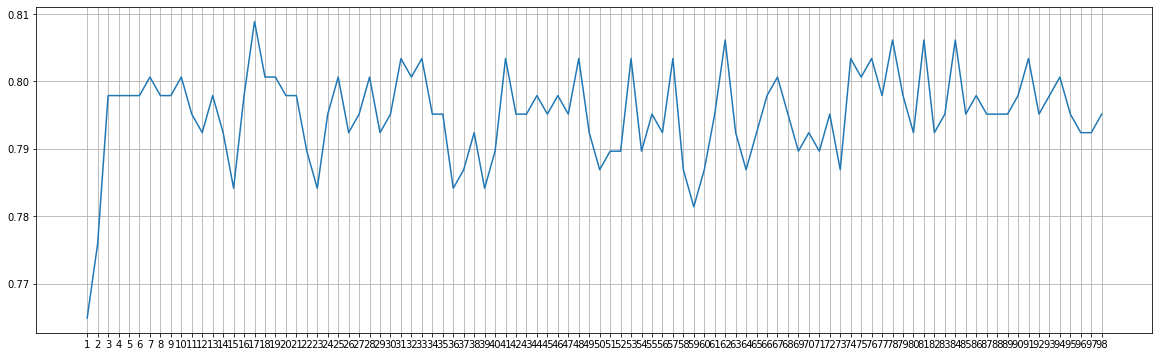

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(value_list)
plt.xticks(np.arange(len(value_list)), np.arange(1, len(value_list)+1))
plt.grid()
plt.show()

In [46]:
explained_error = mse_error(explained_test)

explained_error_arr= np.array(explained_error)
explained_error_df = pd.DataFrame(explained_error_arr)

test_explained_error = explained_error_df.iloc[:,0]
test_explained_error

0      416.0
1      157.0
2       57.0
3       64.0
4       16.0
       ...  
577    292.0
578    380.0
579    439.0
580    309.0
581    187.0
Name: 0, Length: 582, dtype: float64

In [47]:
test_explained_error = test_explained_error.astype(int)

test_explained_error_head = test_explained_error.head(143)

test_explained_error_head = test_explained_error_head.to_numpy()

In [48]:
explained_anomaly = explained_test.iloc[test_explained_error_head]

In [49]:
de_test_explained = extracted_test_scaled.copy()
de_test_explained['attack'] = 0
de_test_explained.loc[test_explained_error_head,'attack']= 1

In [50]:
y_de_explained = de_test_explained['attack']
y_de_explained

0      0
1      0
2      0
3      0
4      0
      ..
577    0
578    0
579    0
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [51]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_de_explained, average='weighted')
f1

0.7979060698113933

In [54]:
feature_importance.iloc[:18,0]

60    60
64    64
6      6
72    72
76    76
50    50
86    86
77    77
66    66
19    19
36    36
88    88
7      7
0      0
31    31
44    44
62    62
8      8
Name: col_name, dtype: int64

In [55]:
it = feature_importance.iloc[:18,0]
it = it.to_list()
explained_train = extracted_train_scaled[it]
explained_test = extracted_test_scaled[it]
    
    # Q(z|X) -- encoder
inputs = Input(shape=(len(it),))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(1024, activation='relu')(inputs)
# decoder_hidden = Dense(2048, activation='relu')
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)


def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

    mu, log_sigma = args
    batch_size = tf.shape(mu)[0]
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
decoder_hidden = Dense(1024, activation='relu')
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(len(it), activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

def vae_loss(recon_x, x):
   
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    
explained_error = mse_error(explained_test)

explained_error_arr= np.array(explained_error)
explained_error_df = pd.DataFrame(explained_error_arr)

test_explained_error = explained_error_df.iloc[:,0]
test_explained_error = test_explained_error.astype(int)

test_explained_error_head = test_explained_error.head(143)

test_explained_error_head = test_explained_error_head.to_numpy()
explained_anomaly = explained_test.iloc[test_explained_error_head]
de_test_explained = extracted_test_scaled.copy()
de_test_explained['attack'] = 0
de_test_explained.loc[test_explained_error_head,'attack']= 1
y_de_explained = de_test_explained['attack']
f1 = f1_score(y_test, y_de_explained, average='weighted')

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1181/1181 [==============================] - 6s 5ms/sample - loss: 11.2103 - val_loss: 9.7636
Epoch 2/100
1181/1181 [==============================] - 0s 318us/sample - loss: 8.8163 - val_loss: 8.0089
Epoch 3/100
1181/1181 [==============================] - 0s 323us/sample - loss: 7.7855 - val_loss: 7.4983
Epoch 4/100
1181/1181 [==============================] - 0s 330us/sample - loss: 7.5429 - val_loss: 7.4070
Epoch 5/100
1181/1181 [==============================] - 0s 321us/sample - loss: 7.5337 - val_loss: 7.3638
Epoch 6/100
1181/1181 [==============================] - 0s 317us/sample - loss: 7.4920 - val_loss: 7.3361
Epoch 7/100
1181/1181 [==============================] - 0s 325us/sample - loss: 7.5328 - val_loss: 7.3193
Epoch 8/100
1181/1181 [==============================] - 0s 319us/sample - loss: 7.5119 - val_loss: 7.3258
Epoch 9/100
1181/1181 [==============================] - 0s 317us/sample - loss: 7.4850 - val_loss

<h3>use shap to interpret second time</h3>

In [56]:
 def f(extracted_test_scaled):
        return vae.predict(extracted_test_scaled)

In [57]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(f, shap.sample(explained_test, 10)) # choose 500 'typical' data from train
shap_values = explainer.shap_values(explained_anomaly, nsamples='auto')


  0%|          | 0/143 [00:00<?, ?it/s]

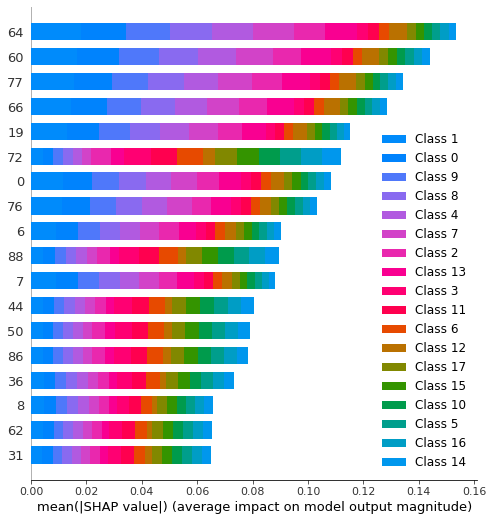

In [58]:
shap.summary_plot(shap_values, features = explained_anomaly, plot_type='bar', max_display=explained_anomaly.shape[1])

In [59]:
anomaly.columns[np.argsort(np.abs(shap_values).mean(0))]
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(explained_anomaly.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,col_name,feature_importance_vals
1,64,1.218977
0,60,1.143276
7,77,1.066099
8,66,1.021898
9,19,0.915489
3,72,0.888852
13,0,0.860651
4,76,0.820817
2,6,0.715769
11,88,0.710475


In [67]:
value_list = []

In [68]:
for i in range(2,19):
    it = feature_importance.iloc[:i,0]
    it = it.to_list()
    explained_train = extracted_train_scaled[it]
    explained_test = extracted_test_scaled[it]
    
    # Q(z|X) -- encoder
    inputs = Input(shape=(len(it),))
    h_q = Dense(512, activation='relu')(inputs)
    h_q = Dense(1024, activation='relu')(inputs)
    # decoder_hidden = Dense(2048, activation='relu')
    mu = Dense(n_z, activation='linear')(h_q)
    log_sigma = Dense(n_z, activation='linear')(h_q)


    def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

        mu, log_sigma = args
        batch_size = tf.shape(mu)[0]
        eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
        return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
    z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
    decoder_hidden = Dense(1024, activation='relu')
    decoder_hidden = Dense(512, activation='relu')
    decoder_out = Dense(len(it), activation='sigmoid')

    h_p = decoder_hidden(z)
    outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
    vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
    encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
    d_in = Input(shape=(n_z,))
    d_h = decoder_hidden(d_in)
    d_out = decoder_out(d_h)
    decoder = Model(d_in, d_out)

    def vae_loss(recon_x, x):
   
    # E[log P(X|z)]
        recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
        kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

        return recon + kl

    vae.compile(optimizer='adam', loss=vae_loss)
    vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    
    explained_error = mse_error(explained_test)

    explained_error_arr= np.array(explained_error)
    explained_error_df = pd.DataFrame(explained_error_arr)

    test_explained_error = explained_error_df.iloc[:,0]
    test_explained_error = test_explained_error.astype(int)

    test_explained_error_head = test_explained_error.head(143)

    test_explained_error_head = test_explained_error_head.to_numpy()
    explained_anomaly = explained_test.iloc[test_explained_error_head]
    de_test_explained = extracted_test_scaled.copy()
    de_test_explained['attack'] = 0
    de_test_explained.loc[test_explained_error_head,'attack']= 1
    y_de_explained = de_test_explained['attack']
    f1 = f1_score(y_test, y_de_explained, average='weighted')

    value_list.append(f1)
    print(value_list)
    print(len(it))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1024/1181 [=========================>....] - ETA: 0s - loss: 1.2698

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 8s 7ms/sample - loss: 1.2476 - val_loss: 1.0497
Epoch 2/100
1181/1181 [==============================] - 0s 359us/sample - loss: 0.9786 - val_loss: 0.8700
Epoch 3/100
1181/1181 [==============================] - 0s 370us/sample - loss: 0.8769 - val_loss: 0.8165
Epoch 4/100
1181/1181 [==============================] - 0s 357us/sample - loss: 0.8639 - val_loss: 0.8107
Epoch 5/100
1181/1181 [==============================] - 0s 362us/sample - loss: 0.8604 - val_loss: 0.8184
Epoch 6/100
1181/1181 [==============================] - 0s 358us/sample - loss: 0.8520 - val_loss: 0.8100
Epoch 7/100
1181/1181 [==============================] - 0s 365us/sample - loss: 0.8498 - val_loss: 0.8106
Epoch 8/100
1181/1181 [==============================] - 0s 366us/sample - loss: 0.8522 - val_loss: 0.8092
Epoch 9/100
1181/1181 [==============================] - 0s 361us/sample - loss: 0.8579 - val_loss: 0.8079
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 363us/sample - loss: 0.8441 - val_loss: 0.8029
Epoch 78/100
1181/1181 [==============================] - 0s 366us/sample - loss: 0.8455 - val_loss: 0.8026
Epoch 79/100
1181/1181 [==============================] - 0s 366us/sample - loss: 0.8436 - val_loss: 0.8031
Epoch 80/100
1181/1181 [==============================] - 0s 360us/sample - loss: 0.8447 - val_loss: 0.8026
Epoch 81/100
1181/1181 [==============================] - 0s 371us/sample - loss: 0.8441 - val_loss: 0.8009
Epoch 82/100
1181/1181 [==============================] - 0s 373us/sample - loss: 0.8432 - val_loss: 0.8035
Epoch 83/100
1181/1181 [==============================] - 0s 361us/sample - loss: 0.8431 - val_loss: 0.8038
Epoch 84/100
1181/1181 [==============================] - 0s 371us/sample - loss: 0.8450 - val_loss: 0.8021
Epoch 85/100
1181/1181 [==============================] - 0s 354us/sample - loss: 0.8451 - val_loss: 0.8034
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 8s 7ms/sample - loss: 1.8264 - val_loss: 1.5532
Epoch 2/100
1181/1181 [==============================] - 0s 373us/sample - loss: 1.4239 - val_loss: 1.2798
Epoch 3/100
1181/1181 [==============================] - 0s 366us/sample - loss: 1.2609 - val_loss: 1.2089
Epoch 4/100
1181/1181 [==============================] - 0s 367us/sample - loss: 1.2222 - val_loss: 1.1946
Epoch 5/100
1181/1181 [==============================] - 0s 365us/sample - loss: 1.2320 - val_loss: 1.1961
Epoch 6/100
1181/1181 [==============================] - 0s 372us/sample - loss: 1.2383 - val_loss: 1.2016
Epoch 7/100
1181/1181 [==============================] - 0s 368us/sample - loss: 1.2273 - val_loss: 1.1961
Epoch 8/100
1181/1181 [==============================] - 0s 372us/sample - loss: 1.2320 - val_loss: 1.1965
Epoch 9/100
1181/1181 [==============================] - 0s 358us/sample - loss: 1.2194 - val_loss: 1.2123
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 365us/sample - loss: 1.2140 - val_loss: 1.1901
Epoch 78/100
1181/1181 [==============================] - 0s 364us/sample - loss: 1.2145 - val_loss: 1.1907
Epoch 79/100
1181/1181 [==============================] - 0s 363us/sample - loss: 1.2132 - val_loss: 1.1924
Epoch 80/100
1181/1181 [==============================] - 0s 370us/sample - loss: 1.2128 - val_loss: 1.1912
Epoch 81/100
1181/1181 [==============================] - 0s 367us/sample - loss: 1.2178 - val_loss: 1.1888
Epoch 82/100
1181/1181 [==============================] - 0s 371us/sample - loss: 1.2150 - val_loss: 1.1878
Epoch 83/100
1181/1181 [==============================] - 0s 376us/sample - loss: 1.2153 - val_loss: 1.1873
Epoch 84/100
1181/1181 [==============================] - 0s 365us/sample - loss: 1.2155 - val_loss: 1.1897
Epoch 85/100
1181/1181 [==============================] - 0s 370us/sample - loss: 1.2145 - val_loss: 1.1901
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 8s 7ms/sample - loss: 2.3910 - val_loss: 2.0466
Epoch 2/100
1181/1181 [==============================] - 0s 358us/sample - loss: 1.8761 - val_loss: 1.6880
Epoch 3/100
1181/1181 [==============================] - 0s 365us/sample - loss: 1.6727 - val_loss: 1.6056
Epoch 4/100
1181/1181 [==============================] - 0s 357us/sample - loss: 1.6453 - val_loss: 1.5982
Epoch 5/100
1181/1181 [==============================] - 0s 372us/sample - loss: 1.6420 - val_loss: 1.5990
Epoch 6/100
1181/1181 [==============================] - 0s 354us/sample - loss: 1.6311 - val_loss: 1.6004
Epoch 7/100
1181/1181 [==============================] - 0s 354us/sample - loss: 1.6405 - val_loss: 1.5940
Epoch 8/100
1181/1181 [==============================] - 0s 359us/sample - loss: 1.6256 - val_loss: 1.5833
Epoch 9/100
1181/1181 [==============================] - 0s 351us/sample - loss: 1.6150 - val_loss: 1.5910
Epoch 10/100
1181/1181 [===========================

Epoch 77/100
1181/1181 [==============================] - 0s 366us/sample - loss: 1.6199 - val_loss: 1.5845
Epoch 78/100
1181/1181 [==============================] - 0s 366us/sample - loss: 1.6161 - val_loss: 1.5778
Epoch 79/100
1181/1181 [==============================] - 0s 358us/sample - loss: 1.6222 - val_loss: 1.5840
Epoch 80/100
1181/1181 [==============================] - 0s 346us/sample - loss: 1.6195 - val_loss: 1.5800
Epoch 81/100
1181/1181 [==============================] - 0s 360us/sample - loss: 1.6262 - val_loss: 1.5794
Epoch 82/100
1181/1181 [==============================] - 0s 366us/sample - loss: 1.6229 - val_loss: 1.5813
Epoch 83/100
1181/1181 [==============================] - 0s 369us/sample - loss: 1.6221 - val_loss: 1.5808
Epoch 84/100
1181/1181 [==============================] - 0s 366us/sample - loss: 1.6183 - val_loss: 1.5859
Epoch 85/100
1181/1181 [==============================] - 0s 354us/sample - loss: 1.6213 - val_loss: 1.5831
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 8s 7ms/sample - loss: 3.0388 - val_loss: 2.6128
Epoch 2/100
1181/1181 [==============================] - 0s 357us/sample - loss: 2.3635 - val_loss: 2.1436
Epoch 3/100
1181/1181 [==============================] - 0s 365us/sample - loss: 2.0646 - val_loss: 2.0000
Epoch 4/100
1181/1181 [==============================] - 0s 352us/sample - loss: 2.0148 - val_loss: 1.9883
Epoch 5/100
1181/1181 [==============================] - 0s 362us/sample - loss: 2.0104 - val_loss: 1.9778
Epoch 6/100
1181/1181 [==============================] - 0s 369us/sample - loss: 2.0307 - val_loss: 1.9861
Epoch 7/100
1181/1181 [==============================] - 0s 368us/sample - loss: 2.0005 - val_loss: 1.9807
Epoch 8/100
1181/1181 [==============================] - 0s 369us/sample - loss: 1.9873 - val_loss: 1.9854
Epoch 9/100
1181/1181 [==============================] - 0s 361us/sample - loss: 2.0046 - val_loss: 1.9968
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 367us/sample - loss: 1.9994 - val_loss: 1.9751
Epoch 78/100
1181/1181 [==============================] - 0s 369us/sample - loss: 2.0048 - val_loss: 1.9687
Epoch 79/100
1181/1181 [==============================] - 0s 362us/sample - loss: 1.9889 - val_loss: 1.9615
Epoch 80/100
1181/1181 [==============================] - 0s 356us/sample - loss: 1.9924 - val_loss: 1.9725
Epoch 81/100
1181/1181 [==============================] - 0s 365us/sample - loss: 1.9922 - val_loss: 1.9686
Epoch 82/100
1181/1181 [==============================] - 0s 371us/sample - loss: 1.9946 - val_loss: 1.9713
Epoch 83/100
1181/1181 [==============================] - 0s 374us/sample - loss: 1.9964 - val_loss: 1.9697
Epoch 84/100
1181/1181 [==============================] - 0s 362us/sample - loss: 2.0120 - val_loss: 1.9786
Epoch 85/100
1181/1181 [==============================] - 0s 355us/sample - loss: 1.9968 - val_loss: 1.9732
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 7ms/sample - loss: 3.7144 - val_loss: 3.2042
Epoch 2/100
1181/1181 [==============================] - 0s 372us/sample - loss: 2.8974 - val_loss: 2.5865
Epoch 3/100
1181/1181 [==============================] - 0s 370us/sample - loss: 2.4963 - val_loss: 2.3916
Epoch 4/100
1181/1181 [==============================] - 0s 368us/sample - loss: 2.4189 - val_loss: 2.3765
Epoch 5/100
1181/1181 [==============================] - 0s 373us/sample - loss: 2.4185 - val_loss: 2.3630
Epoch 6/100
1181/1181 [==============================] - 0s 382us/sample - loss: 2.4243 - val_loss: 2.3629
Epoch 7/100
1181/1181 [==============================] - 0s 373us/sample - loss: 2.4118 - val_loss: 2.3595
Epoch 8/100
1181/1181 [==============================] - 0s 360us/sample - loss: 2.4021 - val_loss: 2.3648
Epoch 9/100
1181/1181 [==============================] - 0s 359us/sample - loss: 2.4072 - val_loss: 2.3639
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 217us/sample - loss: 2.3970 - val_loss: 2.3515
Epoch 78/100
1181/1181 [==============================] - 0s 163us/sample - loss: 2.3913 - val_loss: 2.3317
Epoch 79/100
1181/1181 [==============================] - 0s 151us/sample - loss: 2.3945 - val_loss: 2.3505
Epoch 80/100
1181/1181 [==============================] - 0s 182us/sample - loss: 2.3923 - val_loss: 2.3543
Epoch 81/100
1181/1181 [==============================] - 0s 165us/sample - loss: 2.3876 - val_loss: 2.3462
Epoch 82/100
1181/1181 [==============================] - 0s 185us/sample - loss: 2.3920 - val_loss: 2.3521
Epoch 83/100
1181/1181 [==============================] - 0s 180us/sample - loss: 2.3955 - val_loss: 2.3380
Epoch 84/100
1181/1181 [==============================] - 0s 192us/sample - loss: 2.3889 - val_loss: 2.3589
Epoch 85/100
1181/1181 [==============================] - 0s 203us/sample - loss: 2.3869 - val_loss: 2.3438
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 8s 7ms/sample - loss: 4.3036 - val_loss: 3.7517
Epoch 2/100
1181/1181 [==============================] - 0s 170us/sample - loss: 3.4389 - val_loss: 3.1084
Epoch 3/100
1181/1181 [==============================] - 0s 201us/sample - loss: 3.0509 - val_loss: 2.9565
Epoch 4/100
1181/1181 [==============================] - 0s 151us/sample - loss: 2.9647 - val_loss: 2.9081
Epoch 5/100
1181/1181 [==============================] - 0s 147us/sample - loss: 2.9619 - val_loss: 2.9268
Epoch 6/100
1181/1181 [==============================] - 0s 150us/sample - loss: 2.9463 - val_loss: 2.9253
Epoch 7/100
1181/1181 [==============================] - 0s 164us/sample - loss: 2.9694 - val_loss: 2.9005
Epoch 8/100
1181/1181 [==============================] - 0s 159us/sample - loss: 2.9590 - val_loss: 2.9067
Epoch 9/100
1181/1181 [==============================] - 0s 180us/sample - loss: 2.9408 - val_loss: 2.9459
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 219us/sample - loss: 2.9353 - val_loss: 2.9011
Epoch 78/100
1181/1181 [==============================] - 0s 224us/sample - loss: 2.9373 - val_loss: 2.8915
Epoch 79/100
1181/1181 [==============================] - 0s 181us/sample - loss: 2.9322 - val_loss: 2.8863
Epoch 80/100
1181/1181 [==============================] - 0s 200us/sample - loss: 2.9439 - val_loss: 2.8883
Epoch 81/100
1181/1181 [==============================] - 0s 168us/sample - loss: 2.9434 - val_loss: 2.8916
Epoch 82/100
1181/1181 [==============================] - 0s 200us/sample - loss: 2.9425 - val_loss: 2.8822
Epoch 83/100
1181/1181 [==============================] - 0s 167us/sample - loss: 2.9386 - val_loss: 2.8942
Epoch 84/100
1181/1181 [==============================] - 0s 189us/sample - loss: 2.9504 - val_loss: 2.8921
Epoch 85/100
1181/1181 [==============================] - 0s 229us/sample - loss: 2.9472 - val_loss: 2.8822
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 8s 7ms/sample - loss: 4.9788 - val_loss: 4.3251
Epoch 2/100
1181/1181 [==============================] - 0s 200us/sample - loss: 3.9101 - val_loss: 3.5700
Epoch 3/100
1181/1181 [==============================] - 0s 177us/sample - loss: 3.4351 - val_loss: 3.2961
Epoch 4/100
1181/1181 [==============================] - 0s 197us/sample - loss: 3.3451 - val_loss: 3.2774
Epoch 5/100
1181/1181 [==============================] - 0s 164us/sample - loss: 3.3474 - val_loss: 3.2695
Epoch 6/100
1181/1181 [==============================] - 0s 195us/sample - loss: 3.3622 - val_loss: 3.2819
Epoch 7/100
1181/1181 [==============================] - 0s 209us/sample - loss: 3.3307 - val_loss: 3.2755
Epoch 8/100
1181/1181 [==============================] - 0s 207us/sample - loss: 3.3322 - val_loss: 3.2962
Epoch 9/100
1181/1181 [==============================] - 0s 224us/sample - loss: 3.3387 - val_loss: 3.2705
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 178us/sample - loss: 3.3203 - val_loss: 3.2557
Epoch 78/100
1181/1181 [==============================] - 0s 206us/sample - loss: 3.3141 - val_loss: 3.2669
Epoch 79/100
1181/1181 [==============================] - 0s 207us/sample - loss: 3.3225 - val_loss: 3.2656
Epoch 80/100
1181/1181 [==============================] - 0s 195us/sample - loss: 3.3163 - val_loss: 3.2743
Epoch 81/100
1181/1181 [==============================] - 0s 202us/sample - loss: 3.3180 - val_loss: 3.2554
Epoch 82/100
1181/1181 [==============================] - 0s 216us/sample - loss: 3.3328 - val_loss: 3.2625
Epoch 83/100
1181/1181 [==============================] - 0s 184us/sample - loss: 3.3250 - val_loss: 3.2549
Epoch 84/100
1181/1181 [==============================] - 0s 156us/sample - loss: 3.3177 - val_loss: 3.2593
Epoch 85/100
1181/1181 [==============================] - 0s 197us/sample - loss: 3.3474 - val_loss: 3.2606
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 7ms/sample - loss: 5.5586 - val_loss: 4.8907
Epoch 2/100
1181/1181 [==============================] - 0s 194us/sample - loss: 4.5325 - val_loss: 4.1611
Epoch 3/100
1181/1181 [==============================] - 0s 235us/sample - loss: 4.1070 - val_loss: 3.9867
Epoch 4/100
1181/1181 [==============================] - 0s 220us/sample - loss: 4.0260 - val_loss: 3.9496
Epoch 5/100
1181/1181 [==============================] - 0s 176us/sample - loss: 4.0272 - val_loss: 3.9576
Epoch 6/100
1181/1181 [==============================] - 0s 207us/sample - loss: 4.0223 - val_loss: 3.9656
Epoch 7/100
1181/1181 [==============================] - 0s 233us/sample - loss: 4.0077 - val_loss: 3.9429
Epoch 8/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.0190 - val_loss: 3.9530
Epoch 9/100
1181/1181 [==============================] - 0s 216us/sample - loss: 3.9977 - val_loss: 3.9479
Epoch 10/100
1181/1181 [===========================

Epoch 77/100
1181/1181 [==============================] - 0s 177us/sample - loss: 3.9981 - val_loss: 3.9503
Epoch 78/100
1181/1181 [==============================] - 0s 189us/sample - loss: 3.9956 - val_loss: 3.9146
Epoch 79/100
1181/1181 [==============================] - 0s 196us/sample - loss: 3.9989 - val_loss: 3.9330
Epoch 80/100
1181/1181 [==============================] - 0s 196us/sample - loss: 3.9710 - val_loss: 3.9381
Epoch 81/100
1181/1181 [==============================] - 0s 231us/sample - loss: 3.9891 - val_loss: 3.9327
Epoch 82/100
1181/1181 [==============================] - 0s 187us/sample - loss: 4.0106 - val_loss: 3.9231
Epoch 83/100
1181/1181 [==============================] - 0s 193us/sample - loss: 3.9870 - val_loss: 3.9283
Epoch 84/100
1181/1181 [==============================] - 0s 198us/sample - loss: 4.0016 - val_loss: 3.9316
Epoch 85/100
1181/1181 [==============================] - 0s 151us/sample - loss: 3.9849 - val_loss: 3.9343
Epoch 86/100
1181/1181 [====

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 7ms/sample - loss: 6.1757 - val_loss: 5.4444
Epoch 2/100
1181/1181 [==============================] - 0s 186us/sample - loss: 5.0420 - val_loss: 4.6308
Epoch 3/100
1181/1181 [==============================] - 0s 169us/sample - loss: 4.5515 - val_loss: 4.4019
Epoch 4/100
1181/1181 [==============================] - 0s 163us/sample - loss: 4.4452 - val_loss: 4.3642
Epoch 5/100
1181/1181 [==============================] - 0s 199us/sample - loss: 4.4598 - val_loss: 4.3623
Epoch 6/100
1181/1181 [==============================] - 0s 176us/sample - loss: 4.4284 - val_loss: 4.3770
Epoch 7/100
1181/1181 [==============================] - 0s 178us/sample - loss: 4.4216 - val_loss: 4.3385
Epoch 8/100
1181/1181 [==============================] - 0s 212us/sample - loss: 4.4086 - val_loss: 4.3377
Epoch 9/100
1181/1181 [==============================] - 0s 228us/sample - loss: 4.4143 - val_loss: 4.3212
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 208us/sample - loss: 4.4045 - val_loss: 4.3356
Epoch 78/100
1181/1181 [==============================] - 0s 199us/sample - loss: 4.4013 - val_loss: 4.3335
Epoch 79/100
1181/1181 [==============================] - 0s 248us/sample - loss: 4.4062 - val_loss: 4.3272
Epoch 80/100
1181/1181 [==============================] - 0s 203us/sample - loss: 4.4121 - val_loss: 4.3428
Epoch 81/100
1181/1181 [==============================] - 0s 191us/sample - loss: 4.3932 - val_loss: 4.3513
Epoch 82/100
1181/1181 [==============================] - 0s 203us/sample - loss: 4.3967 - val_loss: 4.3160
Epoch 83/100
1181/1181 [==============================] - 0s 195us/sample - loss: 4.3992 - val_loss: 4.3193
Epoch 84/100
1181/1181 [==============================] - 0s 223us/sample - loss: 4.4338 - val_loss: 4.3143
Epoch 85/100
1181/1181 [==============================] - 0s 238us/sample - loss: 4.4069 - val_loss: 4.3281
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 7ms/sample - loss: 6.8565 - val_loss: 6.0725
Epoch 2/100
1181/1181 [==============================] - 0s 149us/sample - loss: 5.5914 - val_loss: 5.2478
Epoch 3/100
1181/1181 [==============================] - 0s 178us/sample - loss: 5.1293 - val_loss: 4.9992
Epoch 4/100
1181/1181 [==============================] - 0s 228us/sample - loss: 5.0213 - val_loss: 4.9855
Epoch 5/100
1181/1181 [==============================] - 0s 186us/sample - loss: 4.9948 - val_loss: 4.9795
Epoch 6/100
1181/1181 [==============================] - 0s 165us/sample - loss: 4.9775 - val_loss: 4.9673
Epoch 7/100
1181/1181 [==============================] - 0s 228us/sample - loss: 4.9863 - val_loss: 4.9852
Epoch 8/100
1181/1181 [==============================] - 0s 189us/sample - loss: 4.9833 - val_loss: 4.9579
Epoch 9/100
1181/1181 [==============================] - 0s 217us/sample - loss: 4.9826 - val_loss: 4.9485
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 186us/sample - loss: 4.9507 - val_loss: 4.9160
Epoch 78/100
1181/1181 [==============================] - 0s 224us/sample - loss: 4.9543 - val_loss: 4.9215
Epoch 79/100
1181/1181 [==============================] - 0s 183us/sample - loss: 4.9797 - val_loss: 4.9282
Epoch 80/100
1181/1181 [==============================] - 0s 192us/sample - loss: 4.9573 - val_loss: 4.9091
Epoch 81/100
1181/1181 [==============================] - 0s 209us/sample - loss: 4.9526 - val_loss: 4.9334
Epoch 82/100
1181/1181 [==============================] - 0s 215us/sample - loss: 4.9546 - val_loss: 4.9379
Epoch 83/100
1181/1181 [==============================] - 0s 215us/sample - loss: 4.9642 - val_loss: 4.9245
Epoch 84/100
1181/1181 [==============================] - 0s 230us/sample - loss: 4.9400 - val_loss: 4.9360
Epoch 85/100
1181/1181 [==============================] - 0s 218us/sample - loss: 4.9362 - val_loss: 4.9496
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 7ms/sample - loss: 7.5218 - val_loss: 6.6377
Epoch 2/100
1181/1181 [==============================] - 0s 207us/sample - loss: 6.1568 - val_loss: 5.6392
Epoch 3/100
1181/1181 [==============================] - 0s 216us/sample - loss: 5.5529 - val_loss: 5.3588
Epoch 4/100
1181/1181 [==============================] - 0s 195us/sample - loss: 5.3766 - val_loss: 5.2948
Epoch 5/100
1181/1181 [==============================] - 0s 189us/sample - loss: 5.3642 - val_loss: 5.3255
Epoch 6/100
1181/1181 [==============================] - 0s 200us/sample - loss: 5.3640 - val_loss: 5.2978
Epoch 7/100
1181/1181 [==============================] - 0s 219us/sample - loss: 5.3689 - val_loss: 5.2730
Epoch 8/100
1181/1181 [==============================] - 0s 232us/sample - loss: 5.3377 - val_loss: 5.2754
Epoch 9/100
1181/1181 [==============================] - 0s 206us/sample - loss: 5.3594 - val_loss: 5.2557
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 195us/sample - loss: 5.3425 - val_loss: 5.2576
Epoch 78/100
1181/1181 [==============================] - 0s 214us/sample - loss: 5.3107 - val_loss: 5.2377
Epoch 79/100
1181/1181 [==============================] - 0s 194us/sample - loss: 5.3128 - val_loss: 5.2390
Epoch 80/100
1181/1181 [==============================] - 0s 185us/sample - loss: 5.3201 - val_loss: 5.2368
Epoch 81/100
1181/1181 [==============================] - 0s 212us/sample - loss: 5.3198 - val_loss: 5.2318
Epoch 82/100
1181/1181 [==============================] - 0s 225us/sample - loss: 5.3115 - val_loss: 5.2397
Epoch 83/100
1181/1181 [==============================] - 0s 241us/sample - loss: 5.3164 - val_loss: 5.2543
Epoch 84/100
1181/1181 [==============================] - 0s 190us/sample - loss: 5.2991 - val_loss: 5.2552
Epoch 85/100
1181/1181 [==============================] - 0s 199us/sample - loss: 5.3125 - val_loss: 5.2633
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 7ms/sample - loss: 8.1789 - val_loss: 7.2274
Epoch 2/100
1181/1181 [==============================] - 0s 209us/sample - loss: 6.6057 - val_loss: 5.9913
Epoch 3/100
1181/1181 [==============================] - 0s 176us/sample - loss: 5.8659 - val_loss: 5.6588
Epoch 4/100
1181/1181 [==============================] - 0s 176us/sample - loss: 5.7161 - val_loss: 5.5980
Epoch 5/100
1181/1181 [==============================] - 0s 194us/sample - loss: 5.7023 - val_loss: 5.5791
Epoch 6/100
1181/1181 [==============================] - 0s 206us/sample - loss: 5.6903 - val_loss: 5.5896
Epoch 7/100
1181/1181 [==============================] - 0s 187us/sample - loss: 5.6830 - val_loss: 5.5646
Epoch 8/100
1181/1181 [==============================] - 0s 223us/sample - loss: 5.6701 - val_loss: 5.5584
Epoch 9/100
1181/1181 [==============================] - 0s 226us/sample - loss: 5.6678 - val_loss: 5.5405
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 169us/sample - loss: 5.6416 - val_loss: 5.5321
Epoch 78/100
1181/1181 [==============================] - 0s 155us/sample - loss: 5.6360 - val_loss: 5.5320
Epoch 79/100
1181/1181 [==============================] - 0s 129us/sample - loss: 5.6372 - val_loss: 5.5315
Epoch 80/100
1181/1181 [==============================] - 0s 170us/sample - loss: 5.6342 - val_loss: 5.5428
Epoch 81/100
1181/1181 [==============================] - 0s 212us/sample - loss: 5.6251 - val_loss: 5.5264
Epoch 82/100
1181/1181 [==============================] - 0s 185us/sample - loss: 5.6321 - val_loss: 5.5404
Epoch 83/100
1181/1181 [==============================] - 0s 204us/sample - loss: 5.6247 - val_loss: 5.5534
Epoch 84/100
1181/1181 [==============================] - 0s 220us/sample - loss: 5.6368 - val_loss: 5.5451
Epoch 85/100
1181/1181 [==============================] - 0s 224us/sample - loss: 5.6540 - val_loss: 5.5345
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 8ms/sample - loss: 8.7777 - val_loss: 7.6986
Epoch 2/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.0884 - val_loss: 6.4537
Epoch 3/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.3452 - val_loss: 6.0957
Epoch 4/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.1673 - val_loss: 6.0196
Epoch 5/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.1243 - val_loss: 5.9783
Epoch 6/100
1181/1181 [==============================] - 0s 226us/sample - loss: 6.1339 - val_loss: 5.9800
Epoch 7/100
1181/1181 [==============================] - 0s 245us/sample - loss: 6.1202 - val_loss: 5.9838
Epoch 8/100
1181/1181 [==============================] - 0s 226us/sample - loss: 6.1022 - val_loss: 5.9867
Epoch 9/100
1181/1181 [==============================] - 0s 194us/sample - loss: 6.1142 - val_loss: 5.9720
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 232us/sample - loss: 6.0848 - val_loss: 5.9438
Epoch 78/100
1181/1181 [==============================] - 0s 234us/sample - loss: 6.0981 - val_loss: 5.9410
Epoch 79/100
1181/1181 [==============================] - 0s 233us/sample - loss: 6.0897 - val_loss: 5.9527
Epoch 80/100
1181/1181 [==============================] - 0s 222us/sample - loss: 6.0907 - val_loss: 5.9571
Epoch 81/100
1181/1181 [==============================] - 0s 218us/sample - loss: 6.0845 - val_loss: 5.9662
Epoch 82/100
1181/1181 [==============================] - 0s 196us/sample - loss: 6.0821 - val_loss: 5.9676
Epoch 83/100
1181/1181 [==============================] - 0s 145us/sample - loss: 6.0844 - val_loss: 5.9567
Epoch 84/100
1181/1181 [==============================] - 0s 192us/sample - loss: 6.0694 - val_loss: 5.9627
Epoch 85/100
1181/1181 [==============================] - 0s 201us/sample - loss: 6.0985 - val_loss: 5.9537
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 8ms/sample - loss: 9.3961 - val_loss: 8.2887
Epoch 2/100
1181/1181 [==============================] - 0s 189us/sample - loss: 7.5791 - val_loss: 6.8302
Epoch 3/100
1181/1181 [==============================] - 0s 207us/sample - loss: 6.7034 - val_loss: 6.3952
Epoch 4/100
1181/1181 [==============================] - 0s 202us/sample - loss: 6.4825 - val_loss: 6.3525
Epoch 5/100
1181/1181 [==============================] - 0s 204us/sample - loss: 6.4738 - val_loss: 6.3074
Epoch 6/100
1181/1181 [==============================] - 0s 174us/sample - loss: 6.4602 - val_loss: 6.2831
Epoch 7/100
1181/1181 [==============================] - 0s 174us/sample - loss: 6.4433 - val_loss: 6.2806
Epoch 8/100
1181/1181 [==============================] - 0s 239us/sample - loss: 6.4341 - val_loss: 6.2849
Epoch 9/100
1181/1181 [==============================] - 0s 220us/sample - loss: 6.4276 - val_loss: 6.2600
Epoch 10/100
1181/1181 [===========================

1181/1181 [==============================] - 0s 177us/sample - loss: 6.3969 - val_loss: 6.2421
Epoch 78/100
1181/1181 [==============================] - 0s 223us/sample - loss: 6.3986 - val_loss: 6.2644
Epoch 79/100
1181/1181 [==============================] - 0s 219us/sample - loss: 6.3692 - val_loss: 6.2760
Epoch 80/100
1181/1181 [==============================] - 0s 250us/sample - loss: 6.3979 - val_loss: 6.2636
Epoch 81/100
1181/1181 [==============================] - 0s 200us/sample - loss: 6.4099 - val_loss: 6.2393
Epoch 82/100
1181/1181 [==============================] - 0s 171us/sample - loss: 6.3970 - val_loss: 6.2807
Epoch 83/100
1181/1181 [==============================] - 0s 213us/sample - loss: 6.4096 - val_loss: 6.2587
Epoch 84/100
1181/1181 [==============================] - 0s 224us/sample - loss: 6.3927 - val_loss: 6.2476
Epoch 85/100
1181/1181 [==============================] - 0s 211us/sample - loss: 6.4083 - val_loss: 6.2710
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 8ms/sample - loss: 10.1128 - val_loss: 8.8541
Epoch 2/100
1181/1181 [==============================] - 0s 163us/sample - loss: 8.0603 - val_loss: 7.3256
Epoch 3/100
1181/1181 [==============================] - 0s 147us/sample - loss: 7.1593 - val_loss: 6.8448
Epoch 4/100
1181/1181 [==============================] - 0s 202us/sample - loss: 6.9243 - val_loss: 6.7490
Epoch 5/100
1181/1181 [==============================] - 0s 217us/sample - loss: 6.8504 - val_loss: 6.7241
Epoch 6/100
1181/1181 [==============================] - 0s 190us/sample - loss: 6.8621 - val_loss: 6.7509
Epoch 7/100
1181/1181 [==============================] - 0s 202us/sample - loss: 6.8589 - val_loss: 6.7176
Epoch 8/100
1181/1181 [==============================] - 0s 195us/sample - loss: 6.8684 - val_loss: 6.7118
Epoch 9/100
1181/1181 [==============================] - 0s 206us/sample - loss: 6.8464 - val_loss: 6.7193
Epoch 10/100
1181/1181 [==========================

1181/1181 [==============================] - 0s 214us/sample - loss: 6.6402 - val_loss: 6.4708
Epoch 78/100
1181/1181 [==============================] - 0s 186us/sample - loss: 6.6357 - val_loss: 6.4923
Epoch 79/100
1181/1181 [==============================] - 0s 210us/sample - loss: 6.6461 - val_loss: 6.4452
Epoch 80/100
1181/1181 [==============================] - 0s 188us/sample - loss: 6.6579 - val_loss: 6.5190
Epoch 81/100
1181/1181 [==============================] - 0s 240us/sample - loss: 6.5997 - val_loss: 6.4688
Epoch 82/100
1181/1181 [==============================] - 0s 216us/sample - loss: 6.6138 - val_loss: 6.4943
Epoch 83/100
1181/1181 [==============================] - 0s 163us/sample - loss: 6.6576 - val_loss: 6.4570
Epoch 84/100
1181/1181 [==============================] - 0s 217us/sample - loss: 6.6584 - val_loss: 6.4914
Epoch 85/100
1181/1181 [==============================] - 0s 186us/sample - loss: 6.7058 - val_loss: 6.4731
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 8ms/sample - loss: 10.5845 - val_loss: 9.1794
Epoch 2/100
1181/1181 [==============================] - 0s 228us/sample - loss: 8.4368 - val_loss: 7.6199
Epoch 3/100
1181/1181 [==============================] - 0s 232us/sample - loss: 7.4455 - val_loss: 7.0897
Epoch 4/100
1181/1181 [==============================] - 0s 219us/sample - loss: 7.2531 - val_loss: 7.0367
Epoch 5/100
1181/1181 [==============================] - 0s 234us/sample - loss: 7.2160 - val_loss: 7.0203
Epoch 6/100
1181/1181 [==============================] - 0s 244us/sample - loss: 7.2131 - val_loss: 7.0642
Epoch 7/100
1181/1181 [==============================] - 0s 177us/sample - loss: 7.1812 - val_loss: 6.9952
Epoch 8/100
1181/1181 [==============================] - 0s 200us/sample - loss: 7.1971 - val_loss: 7.0598
Epoch 9/100
1181/1181 [==============================] - 0s 207us/sample - loss: 7.2012 - val_loss: 7.0227
Epoch 10/100
1181/1181 [==========================

1181/1181 [==============================] - 0s 189us/sample - loss: 7.0457 - val_loss: 6.8764
Epoch 78/100
1181/1181 [==============================] - 0s 202us/sample - loss: 7.0174 - val_loss: 6.8990
Epoch 79/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.0208 - val_loss: 6.8988
Epoch 80/100
1181/1181 [==============================] - 0s 227us/sample - loss: 7.0594 - val_loss: 6.8760
Epoch 81/100
1181/1181 [==============================] - 0s 247us/sample - loss: 7.0553 - val_loss: 6.8842
Epoch 82/100
1181/1181 [==============================] - 0s 234us/sample - loss: 7.0046 - val_loss: 6.8270
Epoch 83/100
1181/1181 [==============================] - 0s 191us/sample - loss: 7.0412 - val_loss: 6.8759
Epoch 84/100
1181/1181 [==============================] - 0s 188us/sample - loss: 7.0336 - val_loss: 6.8753
Epoch 85/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.0271 - val_loss: 6.8695
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 9s 8ms/sample - loss: 11.3189 - val_loss: 9.8541
Epoch 2/100
1181/1181 [==============================] - 0s 233us/sample - loss: 8.9820 - val_loss: 8.0477
Epoch 3/100
1181/1181 [==============================] - 0s 201us/sample - loss: 7.8370 - val_loss: 7.4703
Epoch 4/100
1181/1181 [==============================] - 0s 201us/sample - loss: 7.5811 - val_loss: 7.3740
Epoch 5/100
1181/1181 [==============================] - 0s 168us/sample - loss: 7.5019 - val_loss: 7.3902
Epoch 6/100
1181/1181 [==============================] - 0s 207us/sample - loss: 7.5066 - val_loss: 7.3039
Epoch 7/100
1181/1181 [==============================] - 0s 201us/sample - loss: 7.4953 - val_loss: 7.3309
Epoch 8/100
1181/1181 [==============================] - 0s 236us/sample - loss: 7.5080 - val_loss: 7.3213
Epoch 9/100
1181/1181 [==============================] - 0s 233us/sample - loss: 7.4751 - val_loss: 7.3430
Epoch 10/100
1181/1181 [==========================

1181/1181 [==============================] - 0s 243us/sample - loss: 7.2437 - val_loss: 7.0603
Epoch 78/100
1181/1181 [==============================] - 0s 210us/sample - loss: 7.2372 - val_loss: 7.0663
Epoch 79/100
1181/1181 [==============================] - 0s 220us/sample - loss: 7.2050 - val_loss: 7.1322
Epoch 80/100
1181/1181 [==============================] - 0s 206us/sample - loss: 7.2261 - val_loss: 6.9928
Epoch 81/100
1181/1181 [==============================] - 0s 182us/sample - loss: 7.2185 - val_loss: 7.0934
Epoch 82/100
1181/1181 [==============================] - 0s 205us/sample - loss: 7.2662 - val_loss: 7.0085
Epoch 83/100
1181/1181 [==============================] - 0s 167us/sample - loss: 7.1867 - val_loss: 7.0551
Epoch 84/100
1181/1181 [==============================] - 0s 165us/sample - loss: 7.1836 - val_loss: 6.9974
Epoch 85/100
1181/1181 [==============================] - 0s 183us/sample - loss: 7.2364 - val_loss: 7.1105
Epoch 86/100
1181/1181 [=================

In [69]:
value_list

[0.7704102969966169,
 0.767660719715139,
 0.7649111424336617,
 0.762161565152184,
 0.7979060698113933,
 0.7979060698113933,
 0.8006556470928708,
 0.7951564925299155,
 0.7896573379669604,
 0.8006556470928708,
 0.7979060698113933,
 0.7896573379669604,
 0.8034052243743487,
 0.7869077606854827,
 0.7924069152484381,
 0.8006556470928708,
 0.7979060698113933]

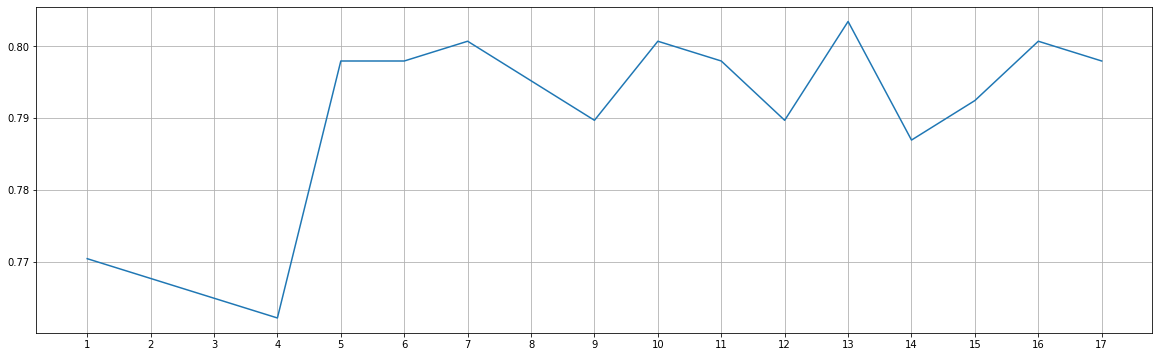

In [70]:
import matplotlib.pyplot as plt3
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(value_list)
plt.xticks(np.arange(len(value_list)), np.arange(1, len(value_list)+1))
plt.grid()
plt.show()

<h3>use shap to explain the third time</h3>

In [80]:
explained_error = mse_error(explained_test)

explained_error_arr= np.array(explained_error)
explained_error_df = pd.DataFrame(explained_error_arr)

test_explained_error = explained_error_df.iloc[:,0]
test_explained_error

0      549.0
1      447.0
2      403.0
3      530.0
4      273.0
       ...  
577    161.0
578    558.0
579    485.0
580    123.0
581    248.0
Name: 0, Length: 582, dtype: float64

In [81]:
test_explained_error = test_explained_error.astype(int)

test_explained_error_head = test_explained_error.head(143)

test_explained_error_head = test_explained_error_head.to_numpy()

In [82]:
explained_anomaly = explained_test.iloc[test_explained_error_head]

In [83]:
de_test_explained = extracted_test_scaled.copy()
de_test_explained['attack'] = 0
de_test_explained.loc[test_explained_error_head,'attack']= 1

In [84]:
y_de_explained = de_test_explained['attack']
y_de_explained

0      0
1      0
2      0
3      0
4      0
      ..
577    1
578    0
579    1
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [85]:
feature_importance.iloc[:14,0]

1     64
0     60
7     77
8     66
9     19
3     72
13     0
4     76
2      6
11    88
12     7
15    44
5     50
6     86
Name: col_name, dtype: int64

In [86]:
it = feature_importance.iloc[:14,0]
it = it.to_list()
explained_train = extracted_train_scaled[it]
explained_test = extracted_test_scaled[it]
    
    # Q(z|X) -- encoder
inputs = Input(shape=(len(it),))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(1024, activation='relu')(inputs)
# decoder_hidden = Dense(2048, activation='relu')
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)


def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

    mu, log_sigma = args
    batch_size = tf.shape(mu)[0]
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
decoder_hidden = Dense(1024, activation='relu')
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(len(it), activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

def vae_loss(recon_x, x):
   
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    
explained_error = mse_error(explained_test)

explained_error_arr= np.array(explained_error)
explained_error_df = pd.DataFrame(explained_error_arr)

test_explained_error = explained_error_df.iloc[:,0]
test_explained_error = test_explained_error.astype(int)

test_explained_error_head = test_explained_error.head(143)

test_explained_error_head = test_explained_error_head.to_numpy()
explained_anomaly = explained_test.iloc[test_explained_error_head]
de_test_explained = extracted_test_scaled.copy()
de_test_explained['attack'] = 0
de_test_explained.loc[test_explained_error_head,'attack']= 1
y_de_explained = de_test_explained['attack']
f1 = f1_score(y_test, y_de_explained, average='weighted')

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1181/1181 [==============================] - 9s 8ms/sample - loss: 8.7206 - val_loss: 7.6656
Epoch 2/100
1181/1181 [==============================] - 0s 223us/sample - loss: 7.0813 - val_loss: 6.4326
Epoch 3/100
1181/1181 [==============================] - 0s 197us/sample - loss: 6.3656 - val_loss: 6.1021
Epoch 4/100
1181/1181 [==============================] - 0s 213us/sample - loss: 6.1902 - val_loss: 5.9967
Epoch 5/100
1181/1181 [==============================] - 0s 220us/sample - loss: 6.1509 - val_loss: 5.9997
Epoch 6/100
1181/1181 [==============================] - 0s 249us/sample - loss: 6.1188 - val_loss: 6.0175
Epoch 7/100
1181/1181 [==============================] - 0s 203us/sample - loss: 6.1211 - val_loss: 5.9752
Epoch 8/100
1181/1181 [==============================] - 0s 203us/sample - loss: 6.1205 - val_loss: 5.9787
Epoch 9/100
1181/1181 [==============================] - 0s 191us/sample - loss: 6.1051 - val_loss:

In [87]:
 def f(extracted_test_scaled):
        return vae.predict(extracted_test_scaled)

In [88]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(f, shap.sample(explained_test, 10)) # choose 500 'typical' data from train
shap_values = explainer.shap_values(explained_anomaly, nsamples='auto')


  0%|          | 0/143 [00:00<?, ?it/s]

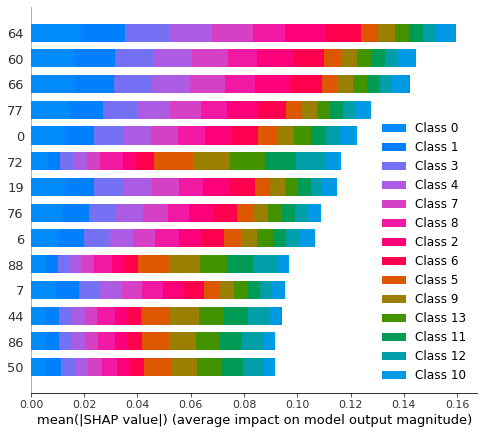

In [89]:
shap.summary_plot(shap_values, features = explained_anomaly, plot_type='bar', max_display=explained_anomaly.shape[1])

In [90]:
anomaly.columns[np.argsort(np.abs(shap_values).mean(0))]
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(explained_anomaly.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,col_name,feature_importance_vals
0,64,1.630550
1,60,1.475251
3,66,1.454000
2,77,1.305404
6,0,1.251203
5,72,1.191008
4,19,1.174411
7,76,1.110536
8,6,1.087714
9,88,0.989705


In [103]:
value_list_3 = []

In [104]:
for i in range(2,15):
    it = feature_importance.iloc[:i,0]
    it = it.to_list()
    explained_train = extracted_train_scaled[it]
    explained_test = extracted_test_scaled[it]
    
    # Q(z|X) -- encoder
    inputs = Input(shape=(len(it),))
    h_q = Dense(512, activation='relu')(inputs)
    h_q = Dense(1024, activation='relu')(inputs)
    # decoder_hidden = Dense(2048, activation='relu')
    mu = Dense(n_z, activation='linear')(h_q)
    log_sigma = Dense(n_z, activation='linear')(h_q)


    def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

        mu, log_sigma = args
        batch_size = tf.shape(mu)[0]
        eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
        return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
    z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
    decoder_hidden = Dense(1024, activation='relu')
    decoder_hidden = Dense(512, activation='relu')
    decoder_out = Dense(len(it), activation='sigmoid')

    h_p = decoder_hidden(z)
    outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
    vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
    encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
    d_in = Input(shape=(n_z,))
    d_h = decoder_hidden(d_in)
    d_out = decoder_out(d_h)
    decoder = Model(d_in, d_out)

    def vae_loss(recon_x, x):
   
    # E[log P(X|z)]
        recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
        kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

        return recon + kl

    vae.compile(optimizer='adam', loss=vae_loss)
    vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    
    explained_error = mse_error(explained_test)

    explained_error_arr= np.array(explained_error)
    explained_error_df = pd.DataFrame(explained_error_arr)

    test_explained_error = explained_error_df.iloc[:,0]
    test_explained_error = test_explained_error.astype(int)

    test_explained_error_head = test_explained_error.head(143)

    test_explained_error_head = test_explained_error_head.to_numpy()
    explained_anomaly = explained_test.iloc[test_explained_error_head]
    de_test_explained = extracted_test_scaled.copy()
    de_test_explained['attack'] = 0
    de_test_explained.loc[test_explained_error_head,'attack']= 1
    y_de_explained = de_test_explained['attack']
    f1 = f1_score(y_test, y_de_explained, average='weighted')

    value_list_3.append(f1)
    print(value_list_3)
    print(len(it))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1181/1181 [==============================] - 11s 9ms/sample - loss: 1.1723 - val_loss: 0.9945
Epoch 2/100
1181/1181 [==============================] - 0s 182us/sample - loss: 0.9367 - val_loss: 0.8474
Epoch 3/100
1181/1181 [==============================] - 0s 195us/sample - loss: 0.8765 - val_loss: 0.8204
Epoch 4/100
1181/1181 [==============================] - 0s 225us/sample - loss: 0.8580 - val_loss: 0.8245
Epoch 5/100
1181/1181 [==============================] - 0s 234us/sample - loss: 0.8615 - val_loss: 0.8131
Epoch 6/100
1181/1181 [==============================] - 0s 247us/sample - loss: 0.8569 - val_loss: 0.8205
Epoch 7/100
1181/1181 [==============================] - 0s 163us/sample - loss: 0.8489 - val_loss: 0.8088
Epoch 8/100
1181/1181 [==============================] - 0s 185us/sample - loss: 0.8522 - val_loss: 0.8113
Epoch 9/100
1181/1181 [==============================] - 0s 195us/sample - loss: 0.8548 - val_loss

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 9ms/sample - loss: 1.8212 - val_loss: 1.5508
Epoch 2/100
1181/1181 [==============================] - 0s 192us/sample - loss: 1.4392 - val_loss: 1.2940
Epoch 3/100
1181/1181 [==============================] - 0s 233us/sample - loss: 1.2908 - val_loss: 1.2249
Epoch 4/100
1181/1181 [==============================] - 0s 213us/sample - loss: 1.2759 - val_loss: 1.2010
Epoch 5/100
1181/1181 [==============================] - 0s 271us/sample - loss: 1.2647 - val_loss: 1.2073
Epoch 6/100
1181/1181 [==============================] - 0s 259us/sample - loss: 1.2695 - val_loss: 1.2213
Epoch 7/100
1181/1181 [==============================] - 0s 232us/sample - loss: 1.2657 - val_loss: 1.2104
Epoch 8/100
1181/1181 [==============================] - 0s 211us/sample - loss: 1.2688 - val_loss: 1.2095
Epoch 9/100
1181/1181 [==============================] - 0s 190us/sample - loss: 1.2546 - val_loss: 1.2001
Epoch 10/100
1181/1181 [==========================

1181/1181 [==============================] - 0s 212us/sample - loss: 1.2512 - val_loss: 1.1959
Epoch 78/100
1181/1181 [==============================] - 0s 194us/sample - loss: 1.2542 - val_loss: 1.1957
Epoch 79/100
1181/1181 [==============================] - 0s 238us/sample - loss: 1.2512 - val_loss: 1.1927
Epoch 80/100
1181/1181 [==============================] - 0s 220us/sample - loss: 1.2517 - val_loss: 1.1973
Epoch 81/100
1181/1181 [==============================] - 0s 232us/sample - loss: 1.2491 - val_loss: 1.1957
Epoch 82/100
1181/1181 [==============================] - 0s 171us/sample - loss: 1.2499 - val_loss: 1.1944
Epoch 83/100
1181/1181 [==============================] - 0s 204us/sample - loss: 1.2526 - val_loss: 1.1968
Epoch 84/100
1181/1181 [==============================] - 0s 211us/sample - loss: 1.2518 - val_loss: 1.1956
Epoch 85/100
1181/1181 [==============================] - 0s 246us/sample - loss: 1.2484 - val_loss: 1.2009
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 9ms/sample - loss: 2.4336 - val_loss: 2.0885
Epoch 2/100
1181/1181 [==============================] - 0s 236us/sample - loss: 1.9073 - val_loss: 1.7194
Epoch 3/100
1181/1181 [==============================] - 0s 220us/sample - loss: 1.6922 - val_loss: 1.6062
Epoch 4/100
1181/1181 [==============================] - 0s 164us/sample - loss: 1.6405 - val_loss: 1.5982
Epoch 5/100
1181/1181 [==============================] - 0s 253us/sample - loss: 1.6289 - val_loss: 1.5898
Epoch 6/100
1181/1181 [==============================] - 0s 238us/sample - loss: 1.6287 - val_loss: 1.5916
Epoch 7/100
1181/1181 [==============================] - 0s 234us/sample - loss: 1.6254 - val_loss: 1.5826
Epoch 8/100
1181/1181 [==============================] - 0s 223us/sample - loss: 1.6348 - val_loss: 1.5973
Epoch 9/100
1181/1181 [==============================] - 0s 194us/sample - loss: 1.6337 - val_loss: 1.5988
Epoch 10/100
1181/1181 [==========================

1181/1181 [==============================] - 0s 244us/sample - loss: 1.6232 - val_loss: 1.5776
Epoch 78/100
1181/1181 [==============================] - 0s 200us/sample - loss: 1.6165 - val_loss: 1.5844
Epoch 79/100
1181/1181 [==============================] - 0s 159us/sample - loss: 1.6182 - val_loss: 1.5823
Epoch 80/100
1181/1181 [==============================] - 0s 159us/sample - loss: 1.6197 - val_loss: 1.5897
Epoch 81/100
1181/1181 [==============================] - 0s 208us/sample - loss: 1.6238 - val_loss: 1.5836
Epoch 82/100
1181/1181 [==============================] - 0s 239us/sample - loss: 1.6224 - val_loss: 1.5854
Epoch 83/100
1181/1181 [==============================] - 0s 189us/sample - loss: 1.6192 - val_loss: 1.5856
Epoch 84/100
1181/1181 [==============================] - 0s 178us/sample - loss: 1.6229 - val_loss: 1.5877
Epoch 85/100
1181/1181 [==============================] - 0s 222us/sample - loss: 1.6249 - val_loss: 1.5832
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 9ms/sample - loss: 3.1547 - val_loss: 2.7633
Epoch 2/100
1181/1181 [==============================] - 0s 239us/sample - loss: 2.5265 - val_loss: 2.3041
Epoch 3/100
1181/1181 [==============================] - 0s 244us/sample - loss: 2.2427 - val_loss: 2.1890
Epoch 4/100
1181/1181 [==============================] - 0s 207us/sample - loss: 2.1811 - val_loss: 2.1480
Epoch 5/100
1181/1181 [==============================] - 0s 245us/sample - loss: 2.1757 - val_loss: 2.1409
Epoch 6/100
1181/1181 [==============================] - 0s 237us/sample - loss: 2.1931 - val_loss: 2.1448
Epoch 7/100
1181/1181 [==============================] - 0s 244us/sample - loss: 2.1789 - val_loss: 2.1495
Epoch 8/100
1181/1181 [==============================] - 0s 251us/sample - loss: 2.1801 - val_loss: 2.1412
Epoch 9/100
1181/1181 [==============================] - 0s 215us/sample - loss: 2.1991 - val_loss: 2.1359
Epoch 10/100
1181/1181 [==========================

1181/1181 [==============================] - 0s 203us/sample - loss: 2.1733 - val_loss: 2.1380
Epoch 78/100
1181/1181 [==============================] - 0s 263us/sample - loss: 2.1673 - val_loss: 2.1369
Epoch 79/100
1181/1181 [==============================] - 0s 229us/sample - loss: 2.1736 - val_loss: 2.1377
Epoch 80/100
1181/1181 [==============================] - 0s 223us/sample - loss: 2.1745 - val_loss: 2.1406
Epoch 81/100
1181/1181 [==============================] - 0s 208us/sample - loss: 2.1702 - val_loss: 2.1310
Epoch 82/100
1181/1181 [==============================] - 0s 211us/sample - loss: 2.1662 - val_loss: 2.1303
Epoch 83/100
1181/1181 [==============================] - 0s 236us/sample - loss: 2.1687 - val_loss: 2.1391
Epoch 84/100
1181/1181 [==============================] - 0s 206us/sample - loss: 2.1666 - val_loss: 2.1271
Epoch 85/100
1181/1181 [==============================] - 0s 215us/sample - loss: 2.1720 - val_loss: 2.1312
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 10ms/sample - loss: 3.7746 - val_loss: 3.2755
Epoch 2/100
1181/1181 [==============================] - 0s 184us/sample - loss: 3.0145 - val_loss: 2.7403
Epoch 3/100
1181/1181 [==============================] - 0s 219us/sample - loss: 2.6781 - val_loss: 2.5672
Epoch 4/100
1181/1181 [==============================] - 0s 163us/sample - loss: 2.6018 - val_loss: 2.5296
Epoch 5/100
1181/1181 [==============================] - 0s 223us/sample - loss: 2.5817 - val_loss: 2.5220
Epoch 6/100
1181/1181 [==============================] - 0s 234us/sample - loss: 2.5830 - val_loss: 2.5128
Epoch 7/100
1181/1181 [==============================] - 0s 207us/sample - loss: 2.5751 - val_loss: 2.5144
Epoch 8/100
1181/1181 [==============================] - 0s 174us/sample - loss: 2.5848 - val_loss: 2.5189
Epoch 9/100
1181/1181 [==============================] - 0s 241us/sample - loss: 2.5814 - val_loss: 2.5250
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 213us/sample - loss: 2.5648 - val_loss: 2.5007
Epoch 78/100
1181/1181 [==============================] - 0s 222us/sample - loss: 2.5670 - val_loss: 2.5118
Epoch 79/100
1181/1181 [==============================] - 0s 252us/sample - loss: 2.5645 - val_loss: 2.5056
Epoch 80/100
1181/1181 [==============================] - 0s 174us/sample - loss: 2.5660 - val_loss: 2.5078
Epoch 81/100
1181/1181 [==============================] - 0s 194us/sample - loss: 2.5638 - val_loss: 2.5090
Epoch 82/100
1181/1181 [==============================] - 0s 190us/sample - loss: 2.5678 - val_loss: 2.5067
Epoch 83/100
1181/1181 [==============================] - 0s 234us/sample - loss: 2.5657 - val_loss: 2.5080
Epoch 84/100
1181/1181 [==============================] - 0s 178us/sample - loss: 2.5628 - val_loss: 2.5085
Epoch 85/100
1181/1181 [==============================] - 0s 240us/sample - loss: 2.5651 - val_loss: 2.5040
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 10ms/sample - loss: 4.4010 - val_loss: 3.8299
Epoch 2/100
1181/1181 [==============================] - 0s 166us/sample - loss: 3.4832 - val_loss: 3.1513
Epoch 3/100
1181/1181 [==============================] - 0s 248us/sample - loss: 3.0529 - val_loss: 2.9360
Epoch 4/100
1181/1181 [==============================] - 0s 240us/sample - loss: 2.9658 - val_loss: 2.9237
Epoch 5/100
1181/1181 [==============================] - 0s 214us/sample - loss: 2.9661 - val_loss: 2.9388
Epoch 6/100
1181/1181 [==============================] - 0s 188us/sample - loss: 2.9547 - val_loss: 2.9463
Epoch 7/100
1181/1181 [==============================] - 0s 247us/sample - loss: 2.9652 - val_loss: 2.9066
Epoch 8/100
1181/1181 [==============================] - 0s 238us/sample - loss: 2.9529 - val_loss: 2.9030
Epoch 9/100
1181/1181 [==============================] - 0s 252us/sample - loss: 2.9484 - val_loss: 2.8851
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 236us/sample - loss: 2.9374 - val_loss: 2.8949
Epoch 78/100
1181/1181 [==============================] - 0s 233us/sample - loss: 2.9418 - val_loss: 2.9106
Epoch 79/100
1181/1181 [==============================] - 0s 251us/sample - loss: 2.9465 - val_loss: 2.8951
Epoch 80/100
1181/1181 [==============================] - 0s 239us/sample - loss: 2.9427 - val_loss: 2.9116
Epoch 81/100
1181/1181 [==============================] - 0s 260us/sample - loss: 2.9402 - val_loss: 2.9027
Epoch 82/100
1181/1181 [==============================] - 0s 175us/sample - loss: 2.9507 - val_loss: 2.8954
Epoch 83/100
1181/1181 [==============================] - 0s 193us/sample - loss: 2.9341 - val_loss: 2.9044
Epoch 84/100
1181/1181 [==============================] - 0s 217us/sample - loss: 2.9498 - val_loss: 2.8866
Epoch 85/100
1181/1181 [==============================] - 0s 240us/sample - loss: 2.9389 - val_loss: 2.9039
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 10ms/sample - loss: 4.8968 - val_loss: 4.2617
Epoch 2/100
1181/1181 [==============================] - 0s 193us/sample - loss: 3.8980 - val_loss: 3.4899
Epoch 3/100
1181/1181 [==============================] - 0s 225us/sample - loss: 3.4303 - val_loss: 3.3171
Epoch 4/100
1181/1181 [==============================] - 0s 244us/sample - loss: 3.3533 - val_loss: 3.2937
Epoch 5/100
1181/1181 [==============================] - 0s 272us/sample - loss: 3.3559 - val_loss: 3.2895
Epoch 6/100
1181/1181 [==============================] - 0s 213us/sample - loss: 3.3544 - val_loss: 3.3022
Epoch 7/100
1181/1181 [==============================] - 0s 187us/sample - loss: 3.3538 - val_loss: 3.2703
Epoch 8/100
1181/1181 [==============================] - 0s 165us/sample - loss: 3.3442 - val_loss: 3.2819
Epoch 9/100
1181/1181 [==============================] - 0s 189us/sample - loss: 3.3214 - val_loss: 3.2802
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 182us/sample - loss: 3.3116 - val_loss: 3.2689
Epoch 78/100
1181/1181 [==============================] - 0s 218us/sample - loss: 3.3264 - val_loss: 3.2717
Epoch 79/100
1181/1181 [==============================] - 0s 174us/sample - loss: 3.3260 - val_loss: 3.2779
Epoch 80/100
1181/1181 [==============================] - 0s 219us/sample - loss: 3.3139 - val_loss: 3.2703
Epoch 81/100
1181/1181 [==============================] - 0s 243us/sample - loss: 3.3255 - val_loss: 3.2528
Epoch 82/100
1181/1181 [==============================] - 0s 260us/sample - loss: 3.3142 - val_loss: 3.2507
Epoch 83/100
1181/1181 [==============================] - 0s 213us/sample - loss: 3.3157 - val_loss: 3.2771
Epoch 84/100
1181/1181 [==============================] - 0s 200us/sample - loss: 3.3203 - val_loss: 3.2775
Epoch 85/100
1181/1181 [==============================] - 0s 183us/sample - loss: 3.3209 - val_loss: 3.2587
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 11s 10ms/sample - loss: 5.6315 - val_loss: 4.9414
Epoch 2/100
1181/1181 [==============================] - 0s 223us/sample - loss: 4.5745 - val_loss: 4.2167
Epoch 3/100
1181/1181 [==============================] - 0s 233us/sample - loss: 4.1093 - val_loss: 3.9919
Epoch 4/100
1181/1181 [==============================] - 0s 215us/sample - loss: 4.0172 - val_loss: 3.9564
Epoch 5/100
1181/1181 [==============================] - 0s 212us/sample - loss: 4.0099 - val_loss: 3.9640
Epoch 6/100
1181/1181 [==============================] - 0s 189us/sample - loss: 4.0041 - val_loss: 3.9442
Epoch 7/100
1181/1181 [==============================] - 0s 203us/sample - loss: 4.0066 - val_loss: 3.9339
Epoch 8/100
1181/1181 [==============================] - 0s 191us/sample - loss: 3.9936 - val_loss: 3.9649
Epoch 9/100
1181/1181 [==============================] - 0s 243us/sample - loss: 3.9965 - val_loss: 3.9433
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 190us/sample - loss: 4.0015 - val_loss: 3.9299
Epoch 78/100
1181/1181 [==============================] - 0s 213us/sample - loss: 3.9881 - val_loss: 3.9252
Epoch 79/100
1181/1181 [==============================] - 0s 218us/sample - loss: 3.9841 - val_loss: 3.9279
Epoch 80/100
1181/1181 [==============================] - 0s 239us/sample - loss: 3.9795 - val_loss: 3.9310
Epoch 81/100
1181/1181 [==============================] - 0s 197us/sample - loss: 3.9875 - val_loss: 3.9131
Epoch 82/100
1181/1181 [==============================] - 0s 181us/sample - loss: 3.9857 - val_loss: 3.9407
Epoch 83/100
1181/1181 [==============================] - 0s 209us/sample - loss: 3.9946 - val_loss: 3.9323
Epoch 84/100
1181/1181 [==============================] - 0s 212us/sample - loss: 3.9841 - val_loss: 3.9197
Epoch 85/100
1181/1181 [==============================] - 0s 253us/sample - loss: 3.9894 - val_loss: 3.9119
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 12s 10ms/sample - loss: 6.2862 - val_loss: 5.5208
Epoch 2/100
1181/1181 [==============================] - 0s 229us/sample - loss: 5.1088 - val_loss: 4.6724
Epoch 3/100
1181/1181 [==============================] - 0s 239us/sample - loss: 4.5746 - val_loss: 4.3911
Epoch 4/100
1181/1181 [==============================] - 0s 254us/sample - loss: 4.4482 - val_loss: 4.3555
Epoch 5/100
1181/1181 [==============================] - 0s 156us/sample - loss: 4.4330 - val_loss: 4.3712
Epoch 6/100
1181/1181 [==============================] - 0s 226us/sample - loss: 4.4309 - val_loss: 4.3480
Epoch 7/100
1181/1181 [==============================] - 0s 169us/sample - loss: 4.4311 - val_loss: 4.3499
Epoch 8/100
1181/1181 [==============================] - 0s 213us/sample - loss: 4.4200 - val_loss: 4.3527
Epoch 9/100
1181/1181 [==============================] - 0s 250us/sample - loss: 4.4182 - val_loss: 4.3441
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 172us/sample - loss: 4.4100 - val_loss: 4.3275
Epoch 78/100
1181/1181 [==============================] - 0s 192us/sample - loss: 4.4274 - val_loss: 4.3244
Epoch 79/100
1181/1181 [==============================] - 0s 252us/sample - loss: 4.4077 - val_loss: 4.3182
Epoch 80/100
1181/1181 [==============================] - 0s 254us/sample - loss: 4.4074 - val_loss: 4.3251
Epoch 81/100
1181/1181 [==============================] - 0s 204us/sample - loss: 4.3916 - val_loss: 4.3078
Epoch 82/100
1181/1181 [==============================] - 0s 230us/sample - loss: 4.4114 - val_loss: 4.3186
Epoch 83/100
1181/1181 [==============================] - 0s 247us/sample - loss: 4.3932 - val_loss: 4.3235
Epoch 84/100
1181/1181 [==============================] - 0s 250us/sample - loss: 4.4058 - val_loss: 4.3280
Epoch 85/100
1181/1181 [==============================] - 0s 253us/sample - loss: 4.4118 - val_loss: 4.3256
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 12s 10ms/sample - loss: 6.8692 - val_loss: 6.0976
Epoch 2/100
1181/1181 [==============================] - 0s 250us/sample - loss: 5.6687 - val_loss: 5.2699
Epoch 3/100
1181/1181 [==============================] - 0s 226us/sample - loss: 5.1298 - val_loss: 5.0059
Epoch 4/100
1181/1181 [==============================] - 0s 168us/sample - loss: 5.0249 - val_loss: 4.9839
Epoch 5/100
1181/1181 [==============================] - 0s 204us/sample - loss: 4.9989 - val_loss: 4.9774
Epoch 6/100
1181/1181 [==============================] - 0s 230us/sample - loss: 4.9954 - val_loss: 4.9682
Epoch 7/100
1181/1181 [==============================] - 0s 221us/sample - loss: 4.9731 - val_loss: 4.9636
Epoch 8/100
1181/1181 [==============================] - 0s 230us/sample - loss: 4.9771 - val_loss: 4.9562
Epoch 9/100
1181/1181 [==============================] - 0s 245us/sample - loss: 4.9640 - val_loss: 4.9552
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 269us/sample - loss: 4.9424 - val_loss: 4.9243
Epoch 78/100
1181/1181 [==============================] - 0s 183us/sample - loss: 4.9413 - val_loss: 4.9110
Epoch 79/100
1181/1181 [==============================] - 0s 180us/sample - loss: 4.9341 - val_loss: 4.9437
Epoch 80/100
1181/1181 [==============================] - 0s 268us/sample - loss: 4.9463 - val_loss: 4.9189
Epoch 81/100
1181/1181 [==============================] - 0s 261us/sample - loss: 4.9505 - val_loss: 4.9283
Epoch 82/100
1181/1181 [==============================] - 0s 254us/sample - loss: 4.9493 - val_loss: 4.9239
Epoch 83/100
1181/1181 [==============================] - 0s 250us/sample - loss: 4.9477 - val_loss: 4.8998
Epoch 84/100
1181/1181 [==============================] - 0s 214us/sample - loss: 4.9514 - val_loss: 4.9516
Epoch 85/100
1181/1181 [==============================] - 0s 189us/sample - loss: 4.9284 - val_loss: 4.9392
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 12s 10ms/sample - loss: 7.5250 - val_loss: 6.6518
Epoch 2/100
1181/1181 [==============================] - 0s 234us/sample - loss: 6.1446 - val_loss: 5.6990
Epoch 3/100
1181/1181 [==============================] - 0s 236us/sample - loss: 5.5198 - val_loss: 5.3581
Epoch 4/100
1181/1181 [==============================] - 0s 217us/sample - loss: 5.4014 - val_loss: 5.3271
Epoch 5/100
1181/1181 [==============================] - 0s 219us/sample - loss: 5.3748 - val_loss: 5.3036
Epoch 6/100
1181/1181 [==============================] - 0s 241us/sample - loss: 5.3568 - val_loss: 5.3034
Epoch 7/100
1181/1181 [==============================] - 0s 221us/sample - loss: 5.3634 - val_loss: 5.2574
Epoch 8/100
1181/1181 [==============================] - 0s 228us/sample - loss: 5.3352 - val_loss: 5.2703
Epoch 9/100
1181/1181 [==============================] - 0s 192us/sample - loss: 5.3313 - val_loss: 5.2837
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 245us/sample - loss: 5.2054 - val_loss: 5.1881
Epoch 78/100
1181/1181 [==============================] - 0s 209us/sample - loss: 5.2462 - val_loss: 5.1713
Epoch 79/100
1181/1181 [==============================] - 0s 275us/sample - loss: 5.2315 - val_loss: 5.1265
Epoch 80/100
1181/1181 [==============================] - 0s 220us/sample - loss: 5.2461 - val_loss: 5.1863
Epoch 81/100
1181/1181 [==============================] - 0s 218us/sample - loss: 5.2294 - val_loss: 5.1464
Epoch 82/100
1181/1181 [==============================] - 0s 227us/sample - loss: 5.2247 - val_loss: 5.1562
Epoch 83/100
1181/1181 [==============================] - 0s 240us/sample - loss: 5.2407 - val_loss: 5.1936
Epoch 84/100
1181/1181 [==============================] - 0s 208us/sample - loss: 5.2503 - val_loss: 5.1567
Epoch 85/100
1181/1181 [==============================] - 0s 220us/sample - loss: 5.2331 - val_loss: 5.1372
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 12s 10ms/sample - loss: 8.1940 - val_loss: 7.2276
Epoch 2/100
1181/1181 [==============================] - 0s 238us/sample - loss: 6.7093 - val_loss: 6.1157
Epoch 3/100
1181/1181 [==============================] - 0s 194us/sample - loss: 5.9970 - val_loss: 5.8022
Epoch 4/100
1181/1181 [==============================] - 0s 213us/sample - loss: 5.8385 - val_loss: 5.7200
Epoch 5/100
1181/1181 [==============================] - 0s 261us/sample - loss: 5.8420 - val_loss: 5.6814
Epoch 6/100
1181/1181 [==============================] - 0s 221us/sample - loss: 5.8088 - val_loss: 5.6669
Epoch 7/100
1181/1181 [==============================] - 0s 230us/sample - loss: 5.8076 - val_loss: 5.6976
Epoch 8/100
1181/1181 [==============================] - 0s 225us/sample - loss: 5.7908 - val_loss: 5.6872
Epoch 9/100
1181/1181 [==============================] - 0s 229us/sample - loss: 5.7822 - val_loss: 5.6681
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 219us/sample - loss: 5.7683 - val_loss: 5.6675
Epoch 78/100
1181/1181 [==============================] - 0s 235us/sample - loss: 5.7751 - val_loss: 5.6701
Epoch 79/100
1181/1181 [==============================] - 0s 217us/sample - loss: 5.7512 - val_loss: 5.6502
Epoch 80/100
1181/1181 [==============================] - 0s 257us/sample - loss: 5.7630 - val_loss: 5.6408
Epoch 81/100
1181/1181 [==============================] - 0s 187us/sample - loss: 5.7505 - val_loss: 5.6395
Epoch 82/100
1181/1181 [==============================] - 0s 243us/sample - loss: 5.7736 - val_loss: 5.6564
Epoch 83/100
1181/1181 [==============================] - 0s 256us/sample - loss: 5.7586 - val_loss: 5.6609
Epoch 84/100
1181/1181 [==============================] - 0s 243us/sample - loss: 5.7658 - val_loss: 5.6591
Epoch 85/100
1181/1181 [==============================] - 0s 255us/sample - loss: 5.7555 - val_loss: 5.6527
Epoch 86/100
1181/1181 [=================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 12s 10ms/sample - loss: 8.7515 - val_loss: 7.6549
Epoch 2/100
1181/1181 [==============================] - 0s 181us/sample - loss: 7.0638 - val_loss: 6.4637
Epoch 3/100
1181/1181 [==============================] - 0s 193us/sample - loss: 6.3486 - val_loss: 6.0738
Epoch 4/100
1181/1181 [==============================] - 0s 202us/sample - loss: 6.1879 - val_loss: 6.0133
Epoch 5/100
1181/1181 [==============================] - 0s 276us/sample - loss: 6.1403 - val_loss: 5.9971
Epoch 6/100
1181/1181 [==============================] - 0s 173us/sample - loss: 6.1146 - val_loss: 6.0038
Epoch 7/100
1181/1181 [==============================] - 0s 240us/sample - loss: 6.1322 - val_loss: 5.9981
Epoch 8/100
1181/1181 [==============================] - 0s 259us/sample - loss: 6.1385 - val_loss: 5.9856
Epoch 9/100
1181/1181 [==============================] - 0s 261us/sample - loss: 6.1071 - val_loss: 5.9751
Epoch 10/100
1181/1181 [=========================

1181/1181 [==============================] - 0s 201us/sample - loss: 6.0760 - val_loss: 5.9683
Epoch 78/100
1181/1181 [==============================] - 0s 229us/sample - loss: 6.0834 - val_loss: 5.9800
Epoch 79/100
1181/1181 [==============================] - 0s 267us/sample - loss: 6.0899 - val_loss: 5.9850
Epoch 80/100
1181/1181 [==============================] - 0s 283us/sample - loss: 6.0849 - val_loss: 5.9376
Epoch 81/100
1181/1181 [==============================] - 0s 243us/sample - loss: 6.0813 - val_loss: 5.9558
Epoch 82/100
1181/1181 [==============================] - 0s 241us/sample - loss: 6.0984 - val_loss: 5.9576
Epoch 83/100
1181/1181 [==============================] - 0s 247us/sample - loss: 6.0848 - val_loss: 5.9668
Epoch 84/100
1181/1181 [==============================] - 0s 212us/sample - loss: 6.0726 - val_loss: 5.9399
Epoch 85/100
1181/1181 [==============================] - 0s 228us/sample - loss: 6.0787 - val_loss: 5.9459
Epoch 86/100
1181/1181 [=================

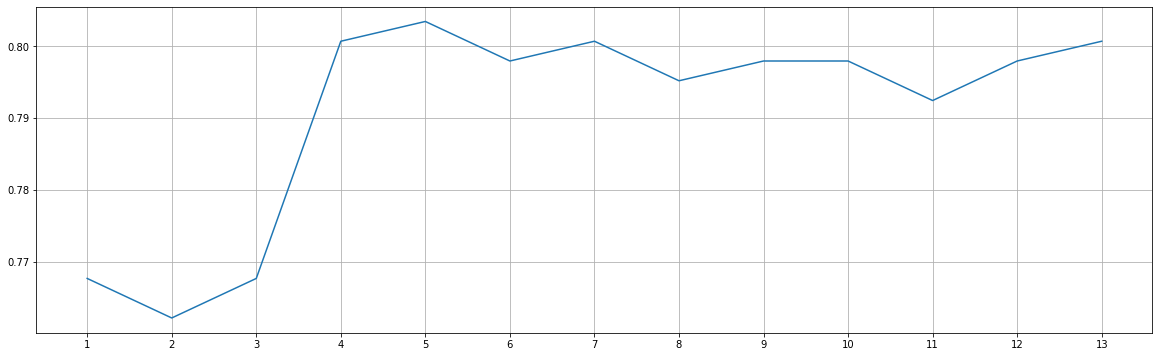

In [105]:
import matplotlib.pyplot as plt3
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(value_list_3)
plt.xticks(np.arange(len(value_list_3)), np.arange(1, len(value_list_3)+1))
plt.grid()
plt.show()

In [106]:
value_list_3

[0.767660719715139,
 0.762161565152184,
 0.767660719715139,
 0.8006556470928708,
 0.8034052243743487,
 0.7979060698113933,
 0.8006556470928708,
 0.7951564925299155,
 0.7979060698113933,
 0.7979060698113933,
 0.7924069152484381,
 0.7979060698113933,
 0.8006556470928708]